<h1 style="text-align: center;">DATA 240 - Fall24 - Final Project</h1>

<h2 style="text-align: center;"> swatML: Soil and Water Assessment Tool with Machine Learning

### <b> 1. Libraries Setup <b>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import geopandas as gpd
from folium.plugins import MarkerCluster
from matplotlib.cm import tab20
from matplotlib.colors import to_hex
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex
from imblearn.over_sampling import RandomOverSampler

This block imports all the necessary Python libraries and modules required for data manipulation, visualization, geospatial analysis, and machine learning. Here's a breakdown of each import:

- **Data Manipulation & Analysis:**
  - `pandas as pd`: For data manipulation and analysis using DataFrame structures.
  - `numpy as np`: For numerical operations and handling arrays.

- **Data Visualization:**
  - `matplotlib.pyplot as plt`: For creating static, interactive, and animated visualizations.
  - `seaborn as sns`: For statistical data visualization, built on top of Matplotlib.

- **Machine Learning & Preprocessing:**
  - `StandardScaler`: For feature scaling to standardize features by removing the mean and scaling to unit variance.
  - `KMeans`: For performing K-Means clustering.
  - `SimpleImputer`: For handling missing data by imputing values.
  - `train_test_split`, `cross_val_score`, `StratifiedKFold`: For splitting data into training and testing sets, evaluating models using cross-validation, and maintaining class distribution in folds.
  - `LogisticRegression`, `SGDClassifier`: For building linear classification models.
  - `RandomForestClassifier`, `GradientBoostingClassifier`, `StackingClassifier`: For building ensemble-based classification models.
  - `DecisionTreeClassifier`, `plot_tree`: For building and visualizing decision trees.
  - `classification_report`, `confusion_matrix`, `accuracy_score`: For evaluating model performance.
  - `RFE`: Recursive Feature Elimination for feature selection.
  - `SMOTE`, `RandomOverSampler`: For handling class imbalance through over-sampling techniques.

- **Geospatial Analysis & Visualization:**
  - `geopandas as gpd`: For working with geospatial data.
  - `folium.plugins.MarkerCluster`: For clustering markers on interactive maps.
  
- **Color & Theme Management:**
  - `tab20`, `get_cmap`: For accessing color maps.
  - `to_hex`: For converting color representations to hexadecimal format.

### <b> 2. Importing Data & Basic Data Exploration <b>

In [ ]:
#merging soil data with weather data
# Load the datasets
df = pd.read_csv('final_merged_data_incremental_v2.csv', low_memory=False)

- The final merged dataset(final_merged_data_incremental_v2) is the outcome of the preprocessing steps.  
- It integrates three key data sources:  
  - **HWSD (Soil Data)**  
  - **Weather Data**  
  - **Crop Data**  

(For a comprehensive explanation of the integration process, refer to the attached DM_weather_preprocesing_v2.ipynb Jupyter Notebook.)

In [ ]:
df.shape

(662961, 59)

In [ ]:
df.head()

MU_GLOBAL   Latitude   Longitude      Date_y  Total_PRCP_y  Mean_PRCP_y  \
0       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
1       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
2       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
3       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
4       3461  48.897758 -124.419424  2022-01-16            31     2.066667   

   Days_with_PRCP_y  Total_SNOW_y  Mean_SNOW_y  Days_with_SNOW_y  ...  ph_min  \
0                 9             0          0.0                 0  ...     4.0   
1                 9             0          0.0                 0  ...     4.0   
2                 9             0          0.0                 0  ...     4.0   
3                 9             0          0.0                 0  ...     4.0   
4                 9             0          0.0                 0  ...     4.0   

   ph_max   N   P   K  temperature   humidity        ph   rainfall      label  
0     5.0  22  59  23    27.322206  51.278688  4.371746  36.503791  mothbeans  
1     5.0   8  45  15    28.095690  60.983538  4.611364  33.841108  mothbeans  
2     5.0  36  44  21    25.125289  51.331894  4.516154  38.486790  mothbeans  
3     5.0  27  59  20    28.009374  52.609500  4.397699  36.012030  mothbeans  
4     5.0  14  58  17    30.536843  59.966647  4.605701  33.489190  mothbeans  

[5 rows x 59 columns]

In [ ]:
df.columns

Index(['MU_GLOBAL', 'Latitude', 'Longitude', 'Date_y', 'Total_PRCP_y',
       'Mean_PRCP_y', 'Days_with_PRCP_y', 'Total_SNOW_y', 'Mean_SNOW_y',
       'Days_with_SNOW_y', 'Mean_SNWD_y', 'Total_WESD_y', 'Total_WESF_y',
       'Total_DAPR_y', 'Total_MDPR_y', 'ID', 'MU_SOURCE1', 'MU_SOURCE2',
       'SHARE', 'SEQ', 'SU_SYM74', 'SU_CODE74', 'SU_SYM85', 'SU_CODE85',
       'SU_SYM90', 'SU_CODE90', 'T_TEXTURE', 'DRAINAGE', 'REF_DEPTH',
       'AWC_CLASS', 'ROOTS', 'T_GRAVEL', 'T_SAND', 'T_SILT', 'T_CLAY',
       'T_USDA_TEX_CLASS', 'T_OC', 'T_PH_H2O', 'T_CEC_SOIL', 'S_GRAVEL',
       'S_SAND', 'S_SILT', 'S_CLAY', 'S_USDA_TEX_CLASS', 'S_OC', 'S_PH_H2O',
       'S_CEC_SOIL', 'precip_min', 'precip_max', 'ph_min', 'ph_max', 'N', 'P',
       'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'],
      dtype='object')

### <b> 3. Feature Engineering to Create Floods Column <b>

#### <b> 3.1 Defining Flood Risk Mapping <b>

Flood Risk Levels and Counts:
 Floods
Medium    496778
High      133336
Low        32847
Name: count, dtype: int64


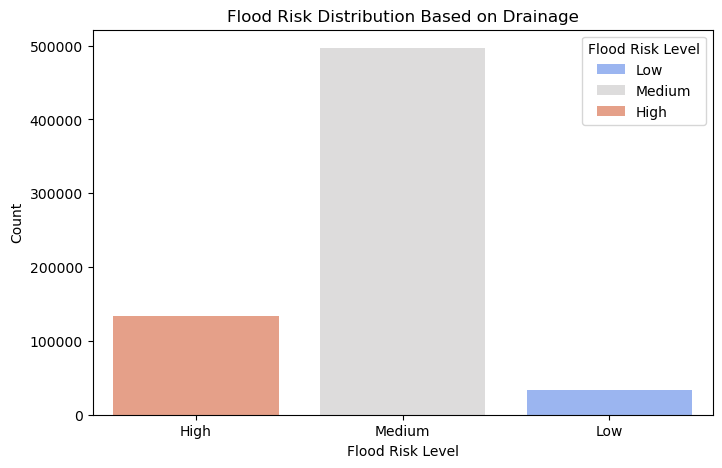

In [ ]:
# Define the mapping of drainage codes to flood risk levels
flood_risk_mapping = {
    1: 'High',   # Very Poor
    2: 'High',   # Poor
    3: 'Medium',   # Imperfectly
    4: 'Medium', # Moderately Well
    5: 'Medium',    # Well
    6: 'Low',    # Somewhat Excessive
    7: 'Low'     # Excessive
}

# Map 'DRAINAGE' values to flood risk levels
df['Floods'] = df['DRAINAGE'].map(flood_risk_mapping)

# Count of each flood risk level
flood_risk_counts = df['Floods'].value_counts()
print("Flood Risk Levels and Counts:\n", flood_risk_counts)

# Plotting the distribution of flood risk levels
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Floods',
    hue='Floods',
    palette='coolwarm',
    order=['High', 'Medium', 'Low'],
    dodge=False
)
plt.title('Flood Risk Distribution Based on Drainage')
plt.xlabel('Flood Risk Level')
plt.ylabel('Count')
plt.legend(title='Flood Risk Level')  # Add legend if needed
plt.show()


#### **Explanation:**
This section involves creating a new target variable, `Floods`, based on the existing `DRAINAGE` feature. The process includes defining a mapping, applying it, and visualizing the distribution.

- **Purpose:**
This dictionary maps numerical `DRAINAGE` codes to categorical flood risk levels:
- **1 & 2:** Represent high flood risk (`High`).
- **3, 4, & 5:** Represent medium flood risk (`Medium`).
- **6 & 7:** Represent low flood risk (`Low`).
- **Comments:**
Each numerical code is annotated with a descriptive label, providing clarity on what each drainage level signifies.

**Mapping `DRAINAGE` to `Floods`:**
```python
df['Floods'] = df['DRAINAGE'].map(flood_risk_mapping)
```
- **`df['DRAINAGE'].map(flood_risk_mapping)`:**
Applies the `flood_risk_mapping` to the `DRAINAGE` column, converting numerical codes to categorical flood risk levels.
- **`df['Floods']`:**
Creates a new column in the DataFrame named `Floods` containing the mapped categorical values.


**Counting Flood Risk Levels:**
```python
flood_risk_counts = df['Floods'].value_counts()
print("Flood Risk Levels and Counts:\n", flood_risk_counts)
```
- **`df['Floods'].value_counts()`:**
Counts the number of occurrences of each flood risk level (`High`, `Medium`, `Low`) in the `Floods` column.


In [ ]:
df.head()

MU_GLOBAL   Latitude   Longitude      Date_y  Total_PRCP_y  Mean_PRCP_y  \
0       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
1       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
2       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
3       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
4       3461  48.897758 -124.419424  2022-01-16            31     2.066667   

   Days_with_PRCP_y  Total_SNOW_y  Mean_SNOW_y  Days_with_SNOW_y  ...  ph_max  \
0                 9             0          0.0                 0  ...     5.0   
1                 9             0          0.0                 0  ...     5.0   
2                 9             0          0.0                 0  ...     5.0   
3                 9             0          0.0                 0  ...     5.0   
4                 9             0          0.0                 0  ...     5.0   

    N   P   K  temperature   humidity        ph   rainfall      label  Floods  
0  22  59  23    27.322206  51.278688  4.371746  36.503791  mothbeans     Low  
1   8  45  15    28.095690  60.983538  4.611364  33.841108  mothbeans     Low  
2  36  44  21    25.125289  51.331894  4.516154  38.486790  mothbeans     Low  
3  27  59  20    28.009374  52.609500  4.397699  36.012030  mothbeans     Low  
4  14  58  17    30.536843  59.966647  4.605701  33.489190  mothbeans     Low  

[5 rows x 60 columns]

**Purpose:**
The goal of this block is to engineer a new target variable, `Floods`, that categorizes soil drainage levels into flood risk categories. This categorization is essential for subsequent classification tasks, enabling machine learning models to predict flood risk based on various soil and weather features.


#### <b> 3.2. Exploratory Data Analysis <b>

In [ ]:
# Count the unique values in the 'label' column
label_counts = df['label'].value_counts()

# Display the unique values and their counts
print("Unique values and their counts in the 'label' column:")
print(label_counts)

Unique values and their counts in the 'label' column:
label
muskmelon      77641
watermelon     49575
lentil         47378
blackgram      46888
mungbean       44150
grapes         33139
jute           30949
coconut        29757
coffee         29535
mothbeans      26378
papaya         25639
cotton         25430
pigeonpeas     24051
maize          22993
orange         22007
chickpea       21042
kidneybeans    20777
pomegranate    20546
rice           19631
apple          19617
banana         17740
mango           8098
Name: count, dtype: int64


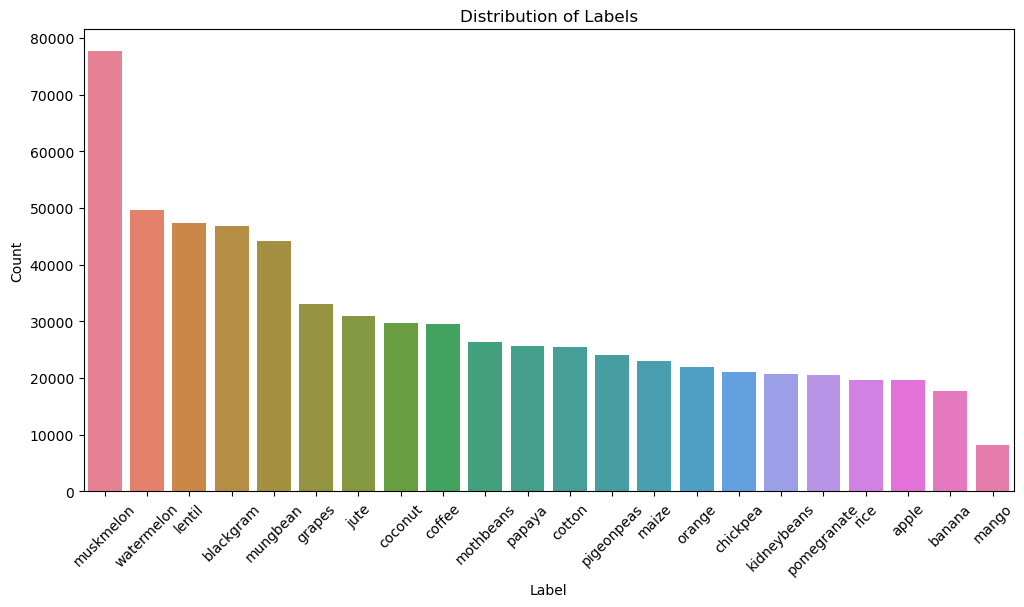

In [ ]:
# Visualize the distribution of the 'label' column with different colors
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(label_counts))  # Generate a unique color palette
sns.barplot(x=label_counts.index, y=label_counts.values, palette=palette)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


**Purpose:**
This block aims to understand the distribution of the `label` column within the dataset. By counting and visualizing the unique labels, one can assess class imbalances, identify dominant classes, and gain insights into the overall structure of the target variable, which is crucial for building effective machine learning models.


The distribution plot shows a significant class imbalance in the dataset. Key observations include:

1. **Dominant Class:** Muskmelon has the highest count, significantly exceeding all other labels.
2. **Moderately Represented Classes:** Watermelon, lentil, blackgram, and mungbean have comparable counts and are the next most frequent classes.
3. **Underrepresented Classes:** Mango and banana are the least frequent labels, potentially requiring techniques like oversampling or SMOTE to address imbalance during model training.
4. **Class Diversity:** The dataset has a wide range of labels, but a few dominate in frequency.

This imbalance may bias the model towards the dominant classes, requiring careful preprocessing.

In [ ]:
df.tail()

MU_GLOBAL   Latitude   Longitude      Date_y  Total_PRCP_y  \
662956      18216  24.400826 -106.916468  2022-03-17            20   
662957      18216  24.400826 -106.916468  2022-03-17            20   
662958      18216  24.400826 -106.916468  2022-03-17            20   
662959      18216  24.400826 -106.916468  2022-03-17            20   
662960      18216  24.400826 -106.916468  2022-03-17            20   

        Mean_PRCP_y  Days_with_PRCP_y  Total_SNOW_y  Mean_SNOW_y  \
662956     1.333333                 1             0          0.0   
662957     1.333333                 1             0          0.0   
662958     1.333333                 1             0          0.0   
662959     1.333333                 1             0          0.0   
662960     1.333333                 1             0          0.0   

        Days_with_SNOW_y  ...  ph_max    N   P   K  temperature   humidity  \
662956                 0  ...     6.5  114   8  52    29.340811  94.551354   
662957                 0  ...     6.5   99   6  46    28.614751  94.222530   
662958                 0  ...     6.5   89  25  50    27.048635  91.346851   
662959                 0  ...     6.5  106  21  52    28.895786  94.789930   
662960                 0  ...     6.5   90  15  52    27.049275  91.382173   

              ph   rainfall      label  Floods  
662956  6.419083  28.229081  muskmelon  Medium  
662957  6.396379  28.985742  muskmelon  Medium  
662958  6.375923  25.081467  muskmelon  Medium  
662959  6.286515  23.036250  muskmelon  Medium  
662960  6.448062  23.657475  muskmelon  Medium  

[5 rows x 60 columns]

#### <b> 3.3. Summary Statistics for Numerical Columns <b>

In [ ]:
summary_stats = df.describe()
summary_stats

MU_GLOBAL       Latitude      Longitude   Total_PRCP_y  \
count  662961.000000  662961.000000  662961.000000  662961.000000   
mean     7001.674574      38.743890    -103.676462      88.585914   
std      4930.288428       7.513117      12.267836      55.712796   
min      3070.000000      24.400826    -124.419424      11.000000   
25%      4741.000000      32.753834    -114.398442      49.000000   
50%      4868.000000      40.393779    -104.194195      71.000000   
75%      5025.000000      45.012220     -95.187827     120.000000   
max     18360.000000      49.373941     -66.973783     308.000000   

         Mean_PRCP_y  Days_with_PRCP_y   Total_SNOW_y    Mean_SNOW_y  \
count  662961.000000     662961.000000  662961.000000  542545.000000   
mean       18.036490          2.839188      15.127431       7.279672   
std        25.757479          1.717591      36.964113      28.958896   
min         0.733333          1.000000       0.000000       0.000000   
25%         4.266667          1.000000       0.000000       0.000000   
50%         7.600000          3.000000       0.000000       0.000000   
75%        18.666667          4.000000       0.000000       1.000000   
max       188.000000         11.000000     444.000000     140.000000   

       Days_with_SNOW_y    Mean_SNWD_y  ...     precip_max         ph_min  \
count     662961.000000  154771.000000  ...  662961.000000  662961.000000   
mean           0.359086      26.569731  ...      98.585914       6.027893   
std            0.772346      46.299997  ...      55.712796       0.658678   
min            0.000000       0.000000  ...      21.000000       3.800000   
25%            0.000000       1.733333  ...      59.000000       5.600000   
50%            0.000000      11.857143  ...      81.000000       5.900000   
75%            0.000000      29.600000  ...     130.000000       6.500000   
max            4.000000     819.533333  ...     318.000000       8.500000   

              ph_max              N              P              K  \
count  662961.000000  662961.000000  662961.000000  662961.000000   
mean        7.027893      54.901540      50.534333      46.748525   
std         0.658678      37.853415      32.633761      47.742383   
min         4.800000       0.000000       5.000000       5.000000   
25%         6.600000      23.000000      25.000000      20.000000   
50%         6.900000      40.000000      48.000000      33.000000   
75%         7.500000      90.000000      67.000000      50.000000   
max         9.500000     140.000000     145.000000     205.000000   

         temperature       humidity             ph       rainfall  
count  662961.000000  662961.000000  662961.000000  662961.000000  
mean       26.009465      74.498227       6.527234      89.068169  
std         4.724748      20.164955       0.625943      55.053843  
min         8.825675      14.258040       4.193189      20.211267  
25%        23.502014      63.583371       6.126020      48.324286  
50%        26.272744      81.624974       6.441328      69.755555  
75%        28.778334      90.566987       6.910375     116.703658  
max        43.675493      99.981876       9.459493     298.560117  

[8 rows x 54 columns]

### Brief Analysis of the Dataset Summary:

1. **General Overview**:
   - The dataset contains **662,961 observations** with various columns related to climate, soil properties, and agricultural data.

2. **Key Statistical Observations**:
   - **Latitude and Longitude**: Wide range indicating a diverse geographic distribution.
   - **Precipitation**:
     - Mean precipitation (`Mean_PRCP_y`) is approximately **18.04 mm**, with a wide range (min: **0.73 mm**, max: **188 mm**).
     - **Total_PRCP_y** shows high variation, ranging from **11 mm** to **308 mm**, with a mean of **88.58 mm**.
   - **Snowfall**:
     - Some areas receive no snowfall (`Days_with_SNOW_y` median: 0, 75th percentile: 1).
     - Max snowfall (`Total_SNOW_y`) reaches **308 mm** in some regions, but the mean is relatively low (**15.13 mm**).
   - **Soil pH**:
     - `ph_min` ranges from **3.8** (acidic) to **6.5**, while `ph_max` ranges from **4.8** to **7.5** (neutral to slightly alkaline).

3. **Agricultural Inputs**:
   - **N (Nitrogen)**, **P (Phosphorus)**, and **K (Potassium)**:
     - High variability in these values, indicating diverse soil nutrient levels.

4. **Climate Features**:
   - **Temperature**: Mean temperature is **26°C**, ranging from **8.8°C** to **28.8°C**.
   - **Humidity**: Average humidity is relatively high (**74.5%**), with some areas as low as **14.3%** and others as high as **90.6%**.
   - **Rainfall**: Shows a broad range, with a mean of **89.07 mm**.


Through this analysis suggests a rich dataset with considerable diversity, suitable for tasks like predictive modeling and clustering, but requiring preprocessing for consistency.

**Purpose:**
Generating summary statistics provides a quick understanding of the distribution, central tendency, and variability of each numerical feature in the dataset. It helps in identifying potential outliers, missing values,understanding the range of values, and gaining insights into the data's overall structure, which is essential for subsequent data preprocessing and modeling steps.


### <b> 4. Handling Missing Values and Relevant Imputation <b>

#### <b> 4.1. Missing Value Handling With Imputation <b>

In [ ]:
# a) Missing Values - Checking and handling missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Values Report:\n", missing_report)

Missing Values Report:
                   Missing Values  Percentage
MU_GLOBAL                      0    0.000000
Latitude                       0    0.000000
Longitude                      0    0.000000
Date_y                         0    0.000000
Total_PRCP_y                   0    0.000000
Mean_PRCP_y                    0    0.000000
Days_with_PRCP_y               0    0.000000
Total_SNOW_y                   0    0.000000
Mean_SNOW_y               120416   18.163361
Days_with_SNOW_y               0    0.000000
Mean_SNWD_y               508190   76.654585
Total_WESD_y                   0    0.000000
Total_WESF_y                   0    0.000000
Total_DAPR_y                   0    0.000000
Total_MDPR_y                   0    0.000000
ID                             0    0.000000
MU_SOURCE1                     0    0.000000
MU_SOURCE2                662961  100.000000
SHARE                          0    0.000000
SEQ                            0    0.000000
SU_SYM74                  10952

### Missing Values Analysis:

1. **Key Issues**:
   - **Mean_SNOW_y** (18%) and **Mean_SNWD_y** (76%) have significant missing values, affecting snowfall-related analysis.
   - Columns like **MU_SOURCE2**, **SU_SYM85**, and **ROOTS** have 100% missing data and can be dropped.

2. **Actionable Steps**:
   - **Drop** columns with 100% missing values.
   - **Impute** missing values in snowfall and soil-related columns using location or category-based averages/medians.

3. **Impact**:
   - Retain complete features like **temperature**, **humidity**, and **rainfall** for reliable analysis.
   - Focus on essential features while minimizing distortion from imputed data.

In [ ]:
class BaseImputer:
    def __init__(self, dataset):
        self.dataset = dataset

    def impute(self):
        pass


class NumericalImputer(BaseImputer):
    def impute(self):
        imputer = SimpleImputer(strategy='median')
        numerical_columns = self.dataset.select_dtypes(include=['float64', 'int64']).columns
        for col in numerical_columns:
            if self.dataset[col].isnull().any():
                # Fit-transform only on non-empty columns
                self.dataset[col] = imputer.fit_transform(self.dataset[[col]]).ravel()


class PercentageImputer(BaseImputer):
    def impute(self):
        percentage_columns = ['SHARE']  # Add other percentage-based columns here
        for col in percentage_columns:
            if col in self.dataset.columns and self.dataset[col].isnull().any():
                self.dataset[col] = self.dataset[col].fillna(self.dataset[col].mean())


class CategoricalImputer(BaseImputer):
    def impute(self):
        categorical_columns = self.dataset.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            if self.dataset[col].isnull().any():
                self.dataset[col] = self.dataset[col].fillna(self.dataset[col].mode().iloc[0])


class HighMissingImputer(BaseImputer):
    def impute(self):
        high_missing_columns = ['Mean_SNWD_y', 'SU_SYM90', 'SU_CODE90']
        for col in high_missing_columns:
            if col in self.dataset.columns and self.dataset[col].isnull().any():
                self.dataset[col] = self.dataset[col].fillna('Missing')


class CompletelyMissingHandler(BaseImputer):
    def impute(self):
        completely_missing = ['MU_SOURCE2', 'SU_SYM85', 'SU_CODE85', 'ROOTS']
        # Drop columns with all missing values
        self.dataset.drop(columns=[col for col in completely_missing if col in self.dataset.columns], inplace=True)


# Main imputation process
def impute_missing_values(df):
    # Drop completely missing columns first
    CompletelyMissingHandler(df).impute()   # First, drop completely missing columns

    imputers = [
        NumericalImputer(df),     # Then, handle numerical columns
        PercentageImputer(df),    # Then, handle percentage-based columns
        CategoricalImputer(df),   # Then, handle categorical columns
        HighMissingImputer(df)    # Finally, handle columns with high missing data
    ]

    for imputer in imputers:
        imputer.impute()

    return df

# Apply imputation
df = impute_missing_values(df)

# Verify results
missing_after = df.isnull().sum()
print("Columns with missing values after imputation:")
print(missing_after[missing_after > 0])

Columns with missing values after imputation:
Series([], dtype: int64)


This code systematically handles missing values by categorizing columns and applying tailored imputation strategies:

1. **`BaseImputer` Class**: Parent class providing a framework for specific imputation methods.
2. **Specialized Imputers**:
   - **NumericalImputer**: Fills missing numerical values with the column median.
   - **PercentageImputer**: Fills percentage-based columns (e.g., `'SHARE'`) with the mean.
   - **CategoricalImputer**: Fills categorical columns with the most frequent value (mode).
   - **HighMissingImputer**: Replaces missing entries in specified high-missing columns with `'Missing'`.
   - **CompletelyMissingHandler**: Drops columns where all values are missing.
3. **`impute_missing_values` Function**:
   - Sequentially applies the imputers, starting with dropping fully missing columns.
   - Ensures all missing data is handled appropriately.

This modular approach ensures efficient, tailored handling of missing data for robust analysis and modeling.


### **Advantages of This Approach**
1. **Modular Design:** Clear separation of concerns, allowing easy modification or extension of individual imputers.
2. **Custom Handling:** Different imputation strategies are applied based on column types and specific needs.
3. **Efficiency:** Ensures missing data is addressed systematically and comprehensively.
4. **Transparency:** Explicitly documents handling strategies, making the process reproducible and interpretable.

This imputation block is ideal for preparing datasets with diverse data types and varying degrees of missingness for robust downstream analysis or modeling.

In [ ]:
print("\nImputed Dataset:")
df.head()


Imputed Dataset:


MU_GLOBAL   Latitude   Longitude      Date_y  Total_PRCP_y  Mean_PRCP_y  \
0       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
1       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
2       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
3       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
4       3461  48.897758 -124.419424  2022-01-16            31     2.066667   

   Days_with_PRCP_y  Total_SNOW_y  Mean_SNOW_y  Days_with_SNOW_y  ...  ph_max  \
0                 9             0          0.0                 0  ...     5.0   
1                 9             0          0.0                 0  ...     5.0   
2                 9             0          0.0                 0  ...     5.0   
3                 9             0          0.0                 0  ...     5.0   
4                 9             0          0.0                 0  ...     5.0   

    N   P   K  temperature   humidity        ph   rainfall      label Floods  
0  22  59  23    27.322206  51.278688  4.371746  36.503791  mothbeans    Low  
1   8  45  15    28.095690  60.983538  4.611364  33.841108  mothbeans    Low  
2  36  44  21    25.125289  51.331894  4.516154  38.486790  mothbeans    Low  
3  27  59  20    28.009374  52.609500  4.397699  36.012030  mothbeans    Low  
4  14  58  17    30.536843  59.966647  4.605701  33.489190  mothbeans    Low  

[5 rows x 56 columns]

In [ ]:
#  Missing Values - Checking and handling missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Values Report:\n", missing_report)

Missing Values Report:
                   Missing Values  Percentage
MU_GLOBAL                      0         0.0
Latitude                       0         0.0
Longitude                      0         0.0
Date_y                         0         0.0
Total_PRCP_y                   0         0.0
Mean_PRCP_y                    0         0.0
Days_with_PRCP_y               0         0.0
Total_SNOW_y                   0         0.0
Mean_SNOW_y                    0         0.0
Days_with_SNOW_y               0         0.0
Mean_SNWD_y                    0         0.0
Total_WESD_y                   0         0.0
Total_WESF_y                   0         0.0
Total_DAPR_y                   0         0.0
Total_MDPR_y                   0         0.0
ID                             0         0.0
MU_SOURCE1                     0         0.0
SHARE                          0         0.0
SEQ                            0         0.0
SU_SYM74                       0         0.0
SU_CODE74                      

In [ ]:
df.tail()

MU_GLOBAL   Latitude   Longitude      Date_y  Total_PRCP_y  \
662956      18216  24.400826 -106.916468  2022-03-17            20   
662957      18216  24.400826 -106.916468  2022-03-17            20   
662958      18216  24.400826 -106.916468  2022-03-17            20   
662959      18216  24.400826 -106.916468  2022-03-17            20   
662960      18216  24.400826 -106.916468  2022-03-17            20   

        Mean_PRCP_y  Days_with_PRCP_y  Total_SNOW_y  Mean_SNOW_y  \
662956     1.333333                 1             0          0.0   
662957     1.333333                 1             0          0.0   
662958     1.333333                 1             0          0.0   
662959     1.333333                 1             0          0.0   
662960     1.333333                 1             0          0.0   

        Days_with_SNOW_y  ...  ph_max    N   P   K  temperature   humidity  \
662956                 0  ...     6.5  114   8  52    29.340811  94.551354   
662957                 0  ...     6.5   99   6  46    28.614751  94.222530   
662958                 0  ...     6.5   89  25  50    27.048635  91.346851   
662959                 0  ...     6.5  106  21  52    28.895786  94.789930   
662960                 0  ...     6.5   90  15  52    27.049275  91.382173   

              ph   rainfall      label  Floods  
662956  6.419083  28.229081  muskmelon  Medium  
662957  6.396379  28.985742  muskmelon  Medium  
662958  6.375923  25.081467  muskmelon  Medium  
662959  6.286515  23.036250  muskmelon  Medium  
662960  6.448062  23.657475  muskmelon  Medium  

[5 rows x 56 columns]

#### <b> 4.2. Data Type Consistency Checks <b>

In [ ]:
df.dtypes

MU_GLOBAL             int64
Latitude            float64
Longitude           float64
Date_y               object
Total_PRCP_y          int64
Mean_PRCP_y         float64
Days_with_PRCP_y      int64
Total_SNOW_y          int64
Mean_SNOW_y         float64
Days_with_SNOW_y      int64
Mean_SNWD_y         float64
Total_WESD_y          int64
Total_WESF_y          int64
Total_DAPR_y          int64
Total_MDPR_y          int64
ID                  float64
MU_SOURCE1           object
SHARE               float64
SEQ                 float64
SU_SYM74             object
SU_CODE74           float64
SU_SYM90             object
SU_CODE90           float64
T_TEXTURE           float64
DRAINAGE            float64
REF_DEPTH           float64
AWC_CLASS           float64
T_GRAVEL            float64
T_SAND              float64
T_SILT              float64
T_CLAY              float64
T_USDA_TEX_CLASS    float64
T_OC                float64
T_PH_H2O            float64
T_CEC_SOIL          float64
S_GRAVEL            

In [ ]:
# b) Data Types - Converting mixed type columns (detected during load) to appropriate types
numerical_columns = ['S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY', 'S_OC', 'S_PH_H2O', 'S_CEC_SOIL']
df['S_GRAVEL'] = pd.to_numeric(df['S_GRAVEL'], errors='coerce')
df['S_SAND'] = pd.to_numeric(df['S_SAND'], errors='coerce')
df['S_SILT'] = pd.to_numeric(df['S_SILT'], errors='coerce')
df['S_CLAY'] = pd.to_numeric(df['S_CLAY'], errors='coerce')

#### <b> 4.3 handling Outliers <b>

In [ ]:
# c) Outliers - Using IQR method to identify and handle outliers
def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in numerical_columns:
    handle_outliers(col)

### Outliers Handling Using the IQR Method

1. **Approach**:
   - Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column.
   - Compute the IQR as \( \text{IQR} = Q3 - Q1 \).
   - Determine lower and upper bounds:
     - Lower Bound = \( Q1 - 1.5 \times \text{IQR} \)
     - Upper Bound = \( Q3 + 1.5 \times \text{IQR} \)
   - Replace values below the lower bound with the lower bound.
   - Replace values above the upper bound with the upper bound.

2. **Implementation**:
   - The `handle_outliers` function is applied to each numerical column in the dataset to cap extreme values within bounds.

3. **Outcome**:
   - Outliers are managed by capping them to acceptable ranges, reducing the impact of extreme values on analysis and modeling.


In [ ]:
df.head()

MU_GLOBAL   Latitude   Longitude      Date_y  Total_PRCP_y  Mean_PRCP_y  \
0       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
1       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
2       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
3       3461  48.897758 -124.419424  2022-01-16            31     2.066667   
4       3461  48.897758 -124.419424  2022-01-16            31     2.066667   

   Days_with_PRCP_y  Total_SNOW_y  Mean_SNOW_y  Days_with_SNOW_y  ...  ph_max  \
0                 9             0          0.0                 0  ...     5.0   
1                 9             0          0.0                 0  ...     5.0   
2                 9             0          0.0                 0  ...     5.0   
3                 9             0          0.0                 0  ...     5.0   
4                 9             0          0.0                 0  ...     5.0   

    N   P   K  temperature   humidity        ph   rainfall      label Floods  
0  22  59  23    27.322206  51.278688  4.371746  36.503791  mothbeans    Low  
1   8  45  15    28.095690  60.983538  4.611364  33.841108  mothbeans    Low  
2  36  44  21    25.125289  51.331894  4.516154  38.486790  mothbeans    Low  
3  27  59  20    28.009374  52.609500  4.397699  36.012030  mothbeans    Low  
4  14  58  17    30.536843  59.966647  4.605701  33.489190  mothbeans    Low  

[5 rows x 56 columns]

In [ ]:
# Check data types of each column
column_data_types = df.dtypes

# Count unique values in each column
column_unique_values = df.nunique()

# Create a DataFrame to display data types and unique value counts together
column_summary = pd.DataFrame({
    'Data Type': column_data_types,
    'Unique Values': column_unique_values
})

column_summary

Data Type  Unique Values
MU_GLOBAL            int64            547
Latitude           float64           1010
Longitude          float64           1010
Date_y              object             65
Total_PRCP_y         int64            176
Mean_PRCP_y        float64            262
Days_with_PRCP_y     int64             11
Total_SNOW_y         int64             29
Mean_SNOW_y        float64             34
Days_with_SNOW_y     int64              5
Mean_SNWD_y        float64             24
Total_WESD_y         int64             12
Total_WESF_y         int64             14
Total_DAPR_y         int64             17
Total_MDPR_y         int64             31
ID                 float64           1335
MU_SOURCE1          object            548
SHARE              float64             45
SEQ                float64              8
SU_SYM74            object             79
SU_CODE74          float64             79
SU_SYM90            object             23
SU_CODE90          float64             23
T_TEXTURE          float64              3
DRAINAGE           float64              6
REF_DEPTH          float64              3
AWC_CLASS          float64              6
T_GRAVEL           float64             25
T_SAND             float64             63
T_SILT             float64             46
T_CLAY             float64             41
T_USDA_TEX_CLASS   float64             11
T_OC               float64             99
T_PH_H2O           float64             42
T_CEC_SOIL         float64             37
S_GRAVEL           float64             22
S_SAND             float64             42
S_SILT             float64             29
S_CLAY             float64             38
S_USDA_TEX_CLASS   float64             10
S_OC               float64             55
S_PH_H2O           float64             33
S_CEC_SOIL         float64             29
precip_min           int64            176
precip_max           int64            176
ph_min             float64             42
ph_max             float64             42
N                    int64            137
P                    int64            117
K                    int64             73
temperature        float64           2181
humidity           float64           2181
ph                 float64           2181
rainfall           float64           2181
label               object             22
Floods              object              3

#### <b> 4.4 Visualizing Numerical Features <b>

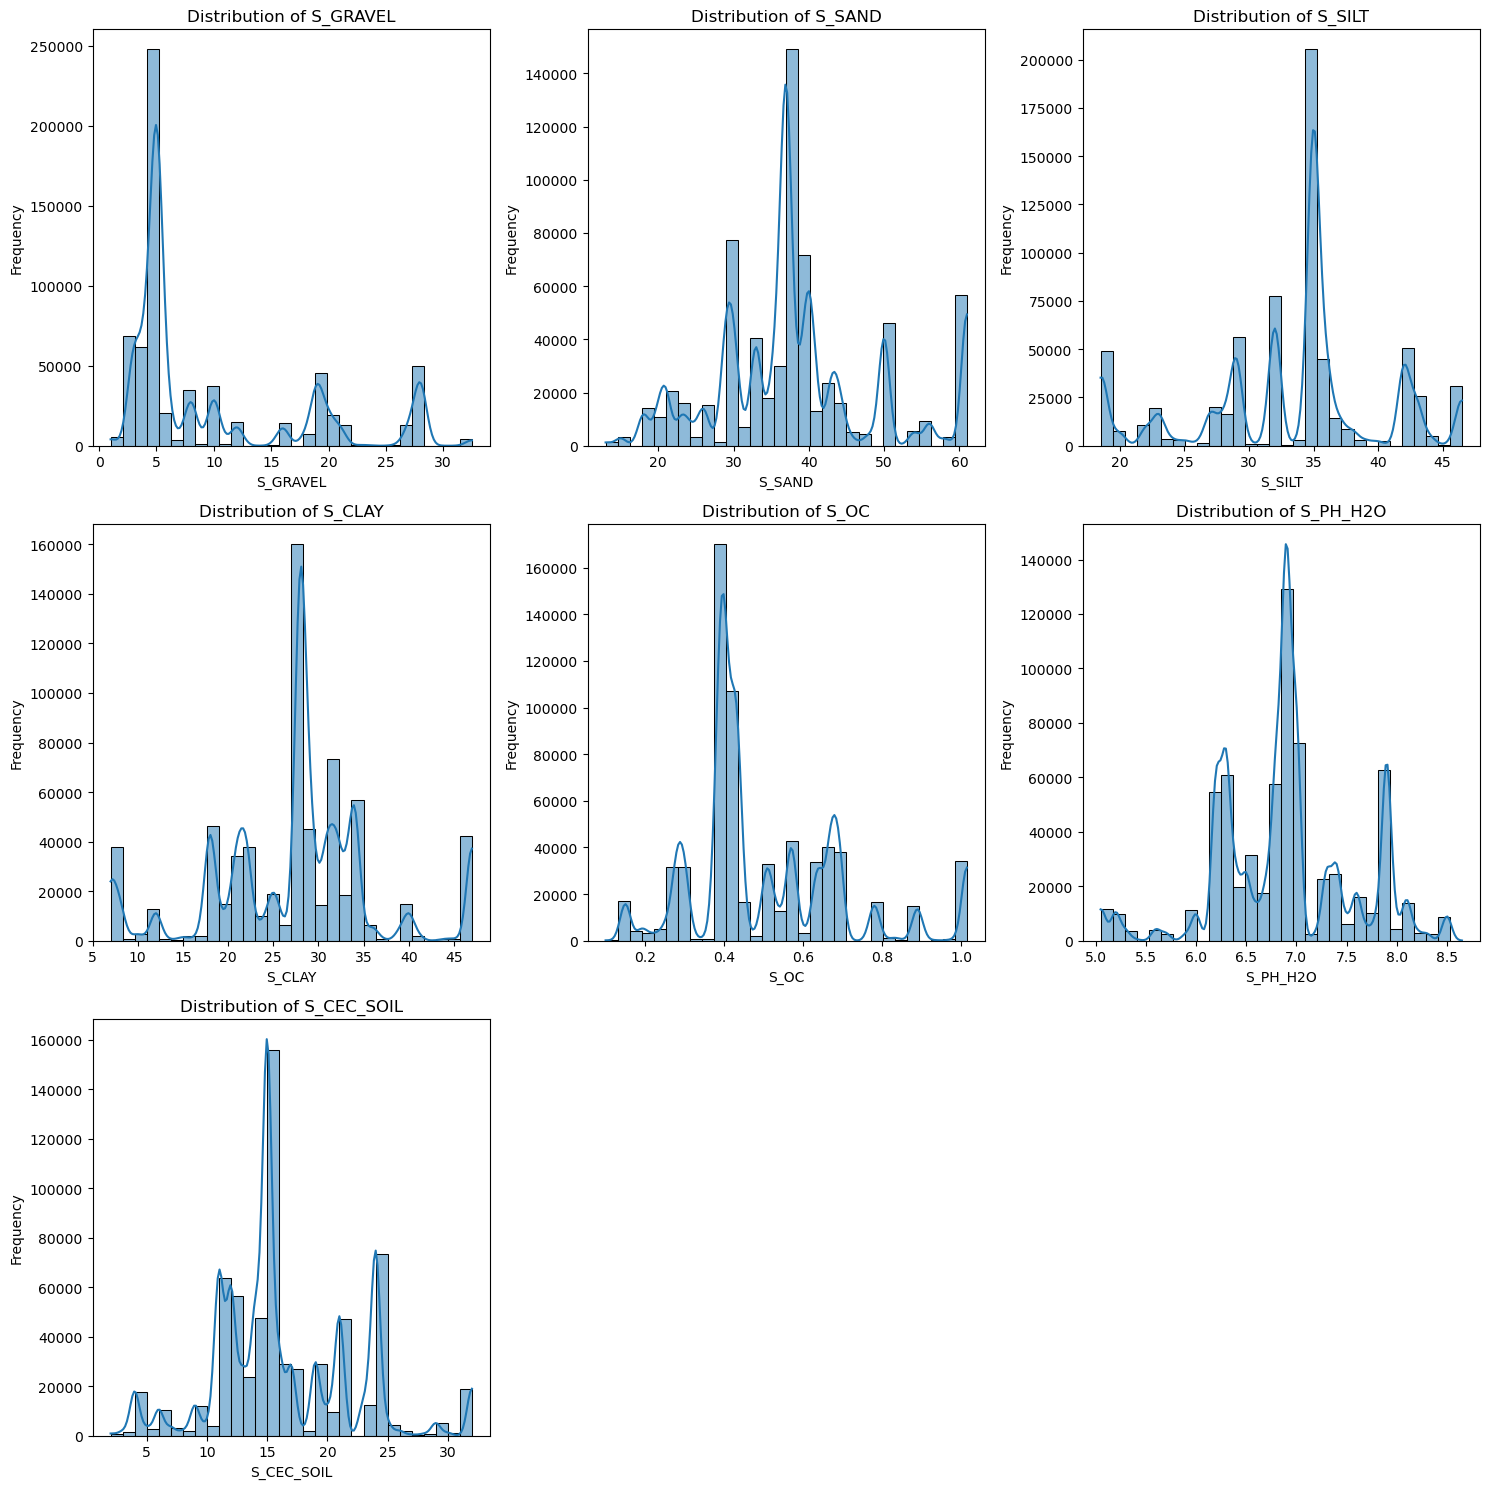

In [ ]:
# b) Histograms for each numerical feature

# List of numerical columns
numerical_columns = ['S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY', 'S_OC', 'S_PH_H2O', 'S_CEC_SOIL']

# Number of columns and rows for the subplot grid
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Hide extra subplots (if any) that are not needed
for i in range(len(numerical_columns), len(axs)):
    axs[i].axis('off')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

### Analysis of Histograms for Numerical Features:

1. **S_GRAVEL**: The distribution is highly skewed to the left, with most values concentrated at lower levels, indicating sparse areas with higher gravel content.

2. **S_SAND**: The distribution is slightly right-skewed, with a prominent peak around 40%, suggesting sandy soil is common, with fewer regions having higher sand proportions.

3. **S_SILT**: The distribution is symmetrical, peaking around 35%, indicating balanced silt content in the dataset.

4. **S_CLAY**: The distribution is slightly skewed to the right, with a peak around 25%. Most soil samples seem to contain moderate clay content.

5. **S_OC (Soil Organic Carbon)**: The distribution shows a sharp peak near 0.4%, indicating low organic carbon is prevalent, with fewer outliers.

6. **S_PH_H2O**: The pH distribution peaks around neutral (6.5-7), suggesting the dataset primarily covers neutral soil types with minimal acidic or alkaline extremes.

7. **S_CEC_SOIL**: The distribution is symmetrical with a peak around 15, indicating moderate cation exchange capacity in most samples, which aligns with soils suitable for agriculture.

### General Observations:
- Most features show expected soil characteristic distributions, with no extreme anomalies except minor skewness.
- Features like **S_GRAVEL** and **S_SAND** highlight distinct soil profiles, while pH and organic content distributions provide insight into soil fertility and usability.

#### <b> 4.5. Correlation Matrix <b>

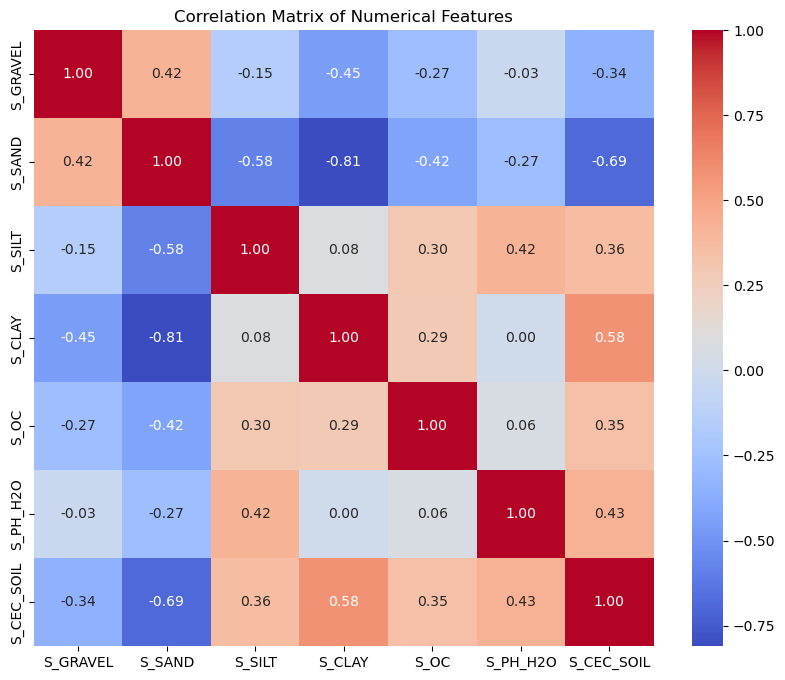

In [ ]:
# c) Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Correlation Matrix Analysis:

1. **Strong Negative Correlation**:
   - **S_SAND and S_CLAY** (-0.81): Indicates a strong inverse relationship, which aligns with soil science, as an increase in sand content often leads to a decrease in clay content.
   - **S_SAND and S_CEC_SOIL** (-0.69): Suggests that soils high in sand tend to have lower cation exchange capacity, affecting nutrient retention.

2. **Moderate to Strong Positive Correlation**:
   - **S_CLAY and S_CEC_SOIL** (0.58): Highlights that clay-rich soils often have higher cation exchange capacity, making them better at retaining nutrients.
   - **S_SILT and S_OC** (0.30): Suggests silty soils may retain more organic matter compared to sandy soils.

3. **Weak Correlation**:
   - **S_PH_H2O with other features**: Generally weak correlations, indicating soil pH is influenced by factors other than just texture or organic content.
   - **S_GRAVEL and other features**: Relatively low correlations, suggesting gravel content is not strongly tied to other soil properties.

### Insights:
- The heatmap reveals expected patterns in soil composition, where sand, clay, and cation exchange capacity interact significantly.
- These correlations could guide feature selection for modeling tasks involving soil properties or agricultural applications.

### <b> 5. EDA II: Underlying Structure and Unexpected Findings <b>

#### <b> 5.1. Distribution Plots <b>

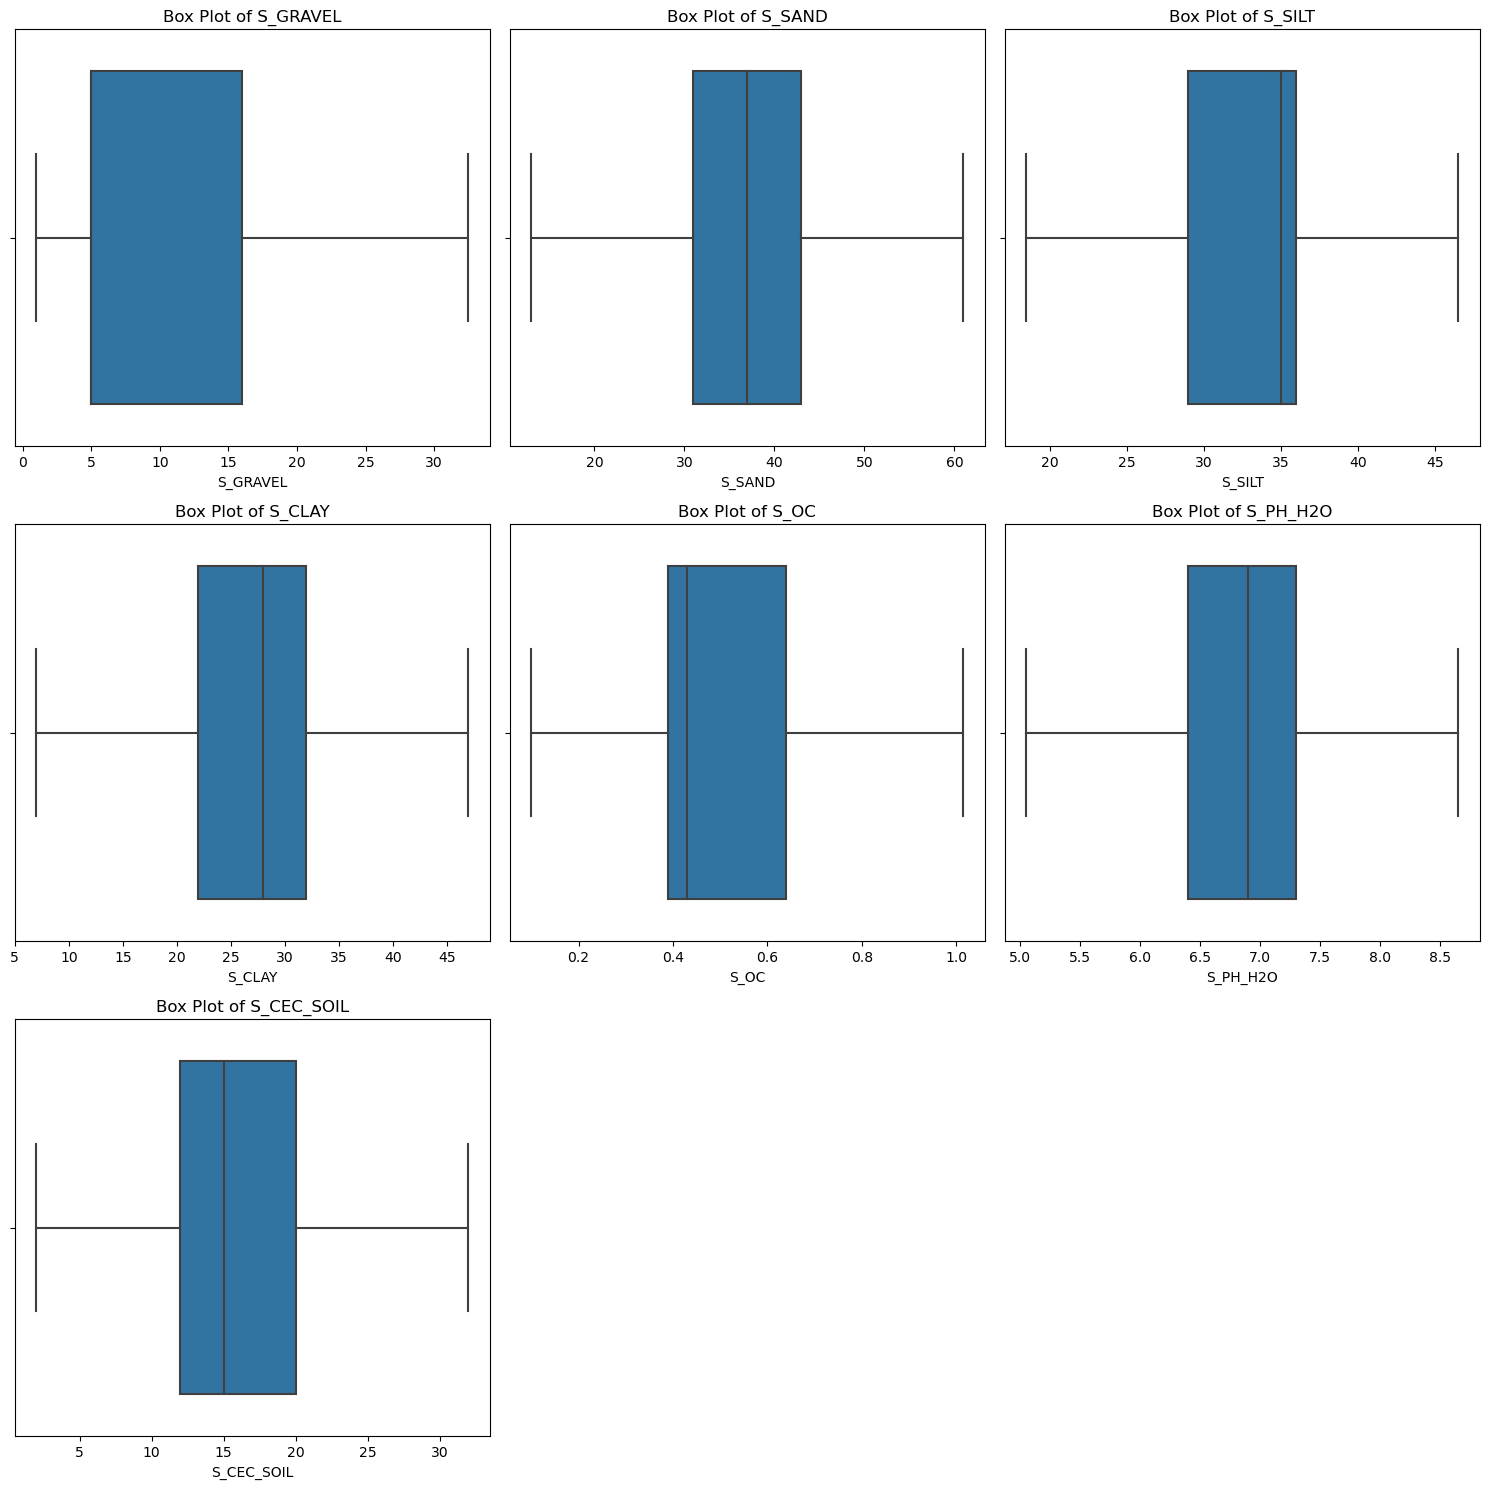

In [ ]:
# Number of columns and rows for the subplot grid
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_xlabel(col)

# Hide extra subplots (if any) that are not needed
for i in range(len(numerical_columns), len(axs)):
    axs[i].axis('off')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

### Box Plot Analysis:

1. **S_GRAVEL, S_SAND, S_SILT, S_CLAY**:
   - These soil texture components exhibit a wide range of values.
   - No visible extreme outliers after applying the IQR-based outlier handling.
   - The distributions are centered around expected soil composition ranges.

2. **S_OC (Soil Organic Carbon)**:
   - The values are concentrated in a narrower range, with minimal variability.
   - No visible extreme values after preprocessing.

3. **S_PH_H2O (Soil pH)**:
   - Shows a well-distributed range, typically between 5.5 and 7.5, which is standard for most soils.
   - Outliers have been capped effectively.

4. **S_CEC_SOIL (Cation Exchange Capacity)**:
   - Displays variability, aligning with soil fertility characteristics.
   - Post-IQR adjustment, the data appears clean without extreme deviations.

### Insights:
- The box plots confirm that the IQR method effectively handled extreme outliers.
- The features now exhibit clean, interpretable distributions suitable for modeling or further analysis.

In [ ]:
# Check unique values in the 'DRAINAGE' column to understand drainage types
drainage_counts = df['DRAINAGE'].value_counts()
print("Drainage Types and Counts:\n", drainage_counts)

Drainage Types and Counts:
 DRAINAGE
4.0    394741
2.0    128660
3.0     96331
6.0     32847
5.0      5706
1.0      4676
Name: count, dtype: int64


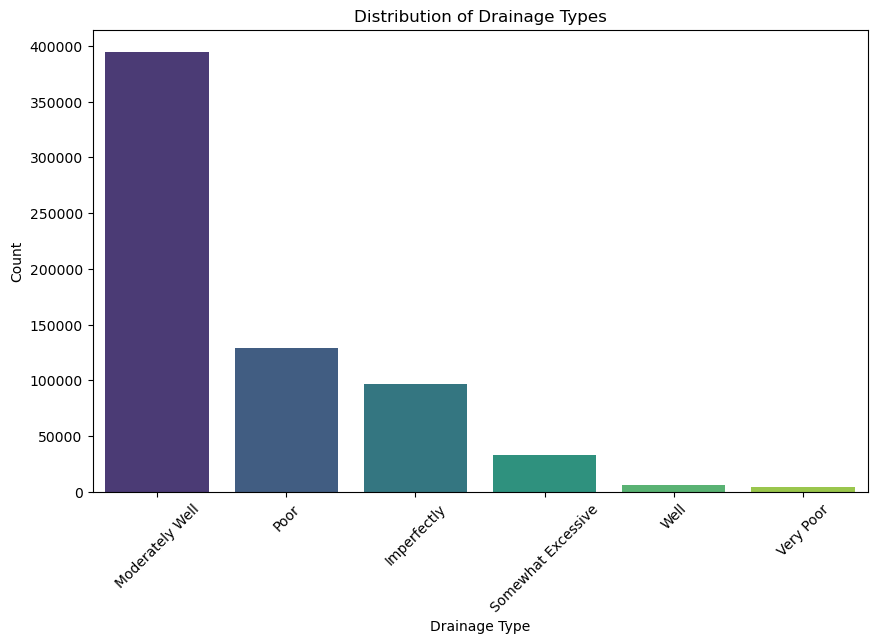

In [ ]:
# Map the codes to their corresponding descriptions
drainage_mapping = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Imperfectly',
    4: 'Moderately Well',
    5: 'Well',
    6: 'Somewhat Excessive',
    7: 'Excessive'
}

# Map the drainage codes in the dataset to their descriptions
df['Drainage_Description'] = df['DRAINAGE'].map(drainage_mapping)

# Count the occurrences of each drainage description
drainage_description_counts = df['Drainage_Description'].value_counts()

# Plotting the distribution of drainage types
plt.figure(figsize=(10, 6))
sns.barplot(
    x=drainage_description_counts.index,
    y=drainage_description_counts.values,
    palette='viridis'
)
plt.title('Distribution of Drainage Types')
plt.xlabel('Drainage Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Drainage Distribution Analysis:

1. **Key Insights**:
   - The majority of the dataset falls under the "Moderately Well" drainage type, indicating it is the most prevalent condition.
   - "Poor" and "Imperfectly" drainage types have significant counts but are far less frequent than "Moderately Well."
   - Rare categories include "Somewhat Excessive," "Well," and "Very Poor."


2. **Visualization Impact**:
   - The bar chart clearly conveys the dominance of "Moderately Well" and highlights the sparsity of rare types, aiding quick comprehension of drainage-type prevalence.

#### <b> 5.2. Plotting High Risk Flood Areas (GeoDataframe Creation)<b>

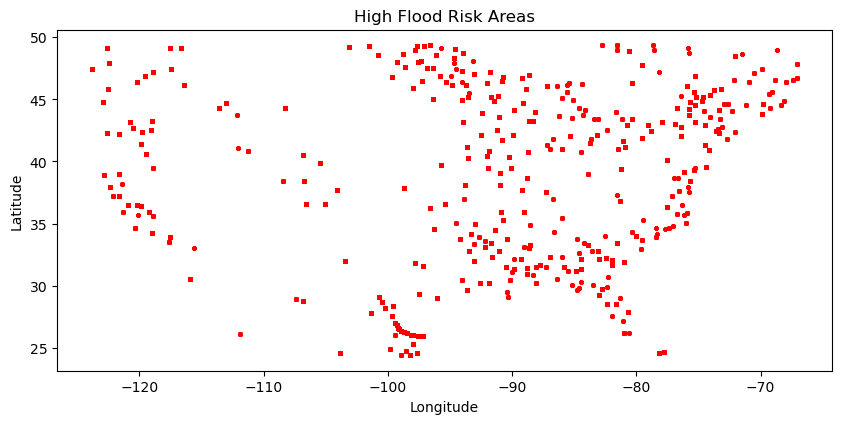

In [ ]:
# Create GeoDataFrame assuming 'Latitude' and 'Longitude' are present
# Replace 'Latitude' and 'Longitude' with actual column names in the dataset
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plot areas with high flood risk
gdf[gdf['Floods'] == 'High'].plot(marker='o', color='red', markersize=5, figsize=(10, 10))
plt.title('High Flood Risk Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Analysis of High Flood Risk Areas:

1. **Geographical Spread**:
   - The red points represent areas with a high flood risk, scattered across the map of the United States.
   - High flood risk regions seem to align with known flood-prone areas in the real world, such as:
     - The Gulf Coast and southeastern regions, where hurricanes and tropical storms are frequent.
     - The Mississippi River Basin, a well-documented area for flooding due to river overflow.
     - Western coastal areas, which may experience flash flooding and mudslides.

2. **Real-World Alignment**:
   - **Southeast and Gulf Coast**: These areas experience annual storm surges and heavy rainfall due to tropical cyclones.
   - **Midwestern Regions**: The central U.S. often faces riverine flooding due to snowmelt and heavy rainfall.
   - **Urban Areas**: Urban centers visible in densely plotted areas may face increased flood risks due to inadequate drainage systems and urban sprawl.

3. **Potential Applications**:
   - This analysis can guide flood management efforts, such as identifying vulnerable areas for emergency response, flood insurance adjustments, and infrastructure investments.

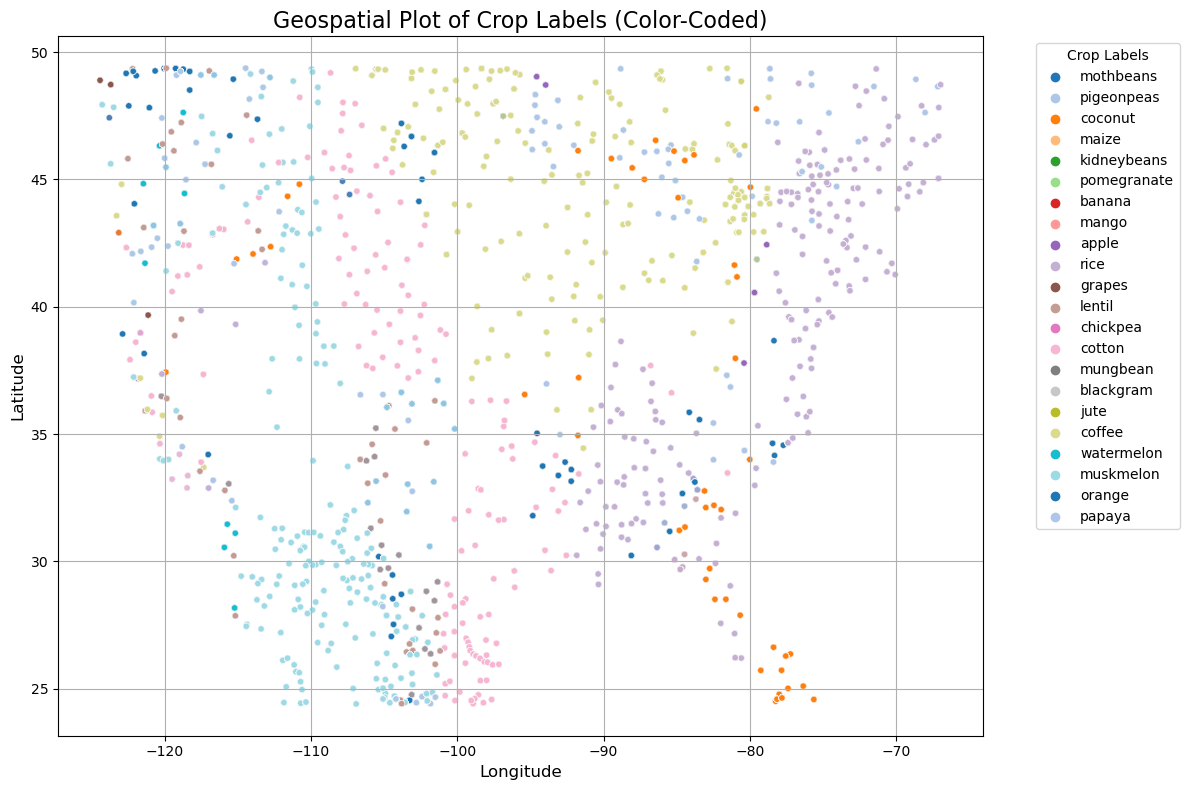

In [ ]:
# Create a GeoDataFrame assuming 'Latitude' and 'Longitude' columns exist
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plot the data, color-coded by the 'label' column
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=gdf.geometry.x,
    y=gdf.geometry.y,
    hue=gdf['label'],  # Color points by 'label'
    palette='tab20',  # Choose a diverse color palette
    s=20,             # Marker size
    alpha=0.8         # Transparency for better readability
)

# Customize the plot
plt.title('Geospatial Plot of Crop Labels (Color-Coded)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Crop Labels', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Analysis of the Geospatial Plot of Crop Labels:

1. **Geographical Spread**:
   - The plot shows the distribution of different crop labels across various geographical regions.
   - Distinct crop types are color-coded, illustrating patterns in their spatial distribution.

2. **Real-World Alignment**:
   - **Rice and Maize**: Crops like rice and maize, which are staple crops, appear widely distributed, reflecting their adaptability to various climatic conditions and soil types.
   - **Coconut and Banana**: These crops are concentrated in southern regions, aligning with real-world conditions where tropical climates favor their growth.
   - **Watermelon and Papaya**: These are clustered in areas with warm climates, consistent with their cultivation in temperate and tropical zones.
   - **Chickpea and Lentil**: Found in drier regions, reflecting their preference for semi-arid climates.

3. **Insights**:
   - The plot provides a clear visualization of crop specialization in different regions, which can aid in agricultural planning and resource allocation.
   - Understanding these spatial patterns helps policymakers address crop-specific needs for irrigation, fertilizers, and pest control.

4. **Applications**:
   - This analysis can support sustainable agricultural practices by identifying crop-climate alignment.
   - It can guide efforts to optimize crop distribution based on soil and climate suitability, enhancing yield and resource efficiency.

#### <b> 5.3. Analyzing Relevant Soil Properties <b>

In [ ]:
# Relevant soil properties to analyze with drainage
soil_properties = ['S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY', 'S_OC', 'S_PH_H2O', 'S_CEC_SOIL']

# Map 'DRAINAGE' values to descriptions for easier interpretation
drainage_mapping = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Imperfectly',
    4: 'Moderately Well',
    5: 'Well',
    6: 'Somewhat Excessive',
    7: 'Excessive'
}
df['Drainage_Description'] = df['DRAINAGE'].map(drainage_mapping)

# Group by drainage levels and calculate mean for each soil property
drainage_soil_summary = df.groupby('Drainage_Description')[soil_properties].mean()
print("Mean Soil Properties by Drainage Level:")
drainage_soil_summary

Mean Soil Properties by Drainage Level:


S_GRAVEL     S_SAND     S_SILT     S_CLAY      S_OC  \
Drainage_Description                                                         
Imperfectly            7.119255  37.727419  34.950878  27.319077  0.448468   
Moderately Well       11.372961  37.696718  34.123343  27.586580  0.534617   
Poor                   4.516843  33.064884  33.514472  32.032473  0.507666   
Somewhat Excessive    18.641824  61.000000  20.829528   7.427406  0.238446   
Very Poor              1.298546  30.542344  27.001925  39.932421  0.776684   
Well                  18.078339  61.000000  18.691640  11.132843  0.365268   

                      S_PH_H2O  S_CEC_SOIL  
Drainage_Description                        
Imperfectly           6.937811   15.342382  
Moderately Well       6.927114   16.719474  
Poor                  6.869675   17.088388  
Somewhat Excessive    6.394301    8.615125  
Very Poor             5.858469   27.191403  
Well                  7.058561    7.854539

### Analysis of Mean Soil Properties by Drainage Level:

1. **Drainage and Soil Composition**:
   - **Gravel and Sand**:
     - "Somewhat Excessive" and "Well" drained areas have the highest gravel and sand content (~18-61%), indicative of their fast drainage capabilities.
     - "Very Poor" and "Poor" drained areas have minimal gravel and sand, contributing to slower water movement.
   - **Clay Content**:
     - "Very Poor" drainage has the highest clay percentage (~40%), which inhibits water infiltration and drainage.
     - "Somewhat Excessive" drainage has the least clay (~7%), allowing faster water percolation.

2. **Organic Carbon (S_OC)**:
   - "Very Poor" drainage areas have the highest organic carbon (~0.78%), suggesting potential waterlogging and organic matter accumulation.
   - "Somewhat Excessive" and "Well" drained areas have lower organic carbon (~0.24-0.36%), indicating faster decomposition due to better aeration.

3. **pH (S_PH_H2O)**:
   - "Well" drained areas exhibit slightly alkaline pH (~7.05), which supports a wider range of crops.
   - "Very Poor" drainage areas have acidic pH (~5.85), likely due to water stagnation and accumulation of acidic compounds.

4. **Cation Exchange Capacity (S_CEC_SOIL)**:
   - "Very Poor" drainage has the highest CEC (~27.19), indicating higher nutrient retention but also slow drainage.
   - "Somewhat Excessive" and "Well" drained areas have the lowest CEC (~7.85-8.61), aligning with sandy soils that drain quickly but retain fewer nutrients.

5. **Overall Observations**:
   - High clay and organic carbon content correlate with poor drainage.
   - Sandy and gravelly soils are better suited for crops requiring well-drained conditions, while clay-rich soils may need improved drainage systems for effective cultivation.

6. - This analysis can guide crop selection and soil management strategies:
     - Crops like rice may thrive in poorly drained areas.
     - Sandy, well-drained soils are ideal for crops like peanuts and certain fruits.
   - The data supports drainage improvement interventions in poorly drained regions to enhance productivity.

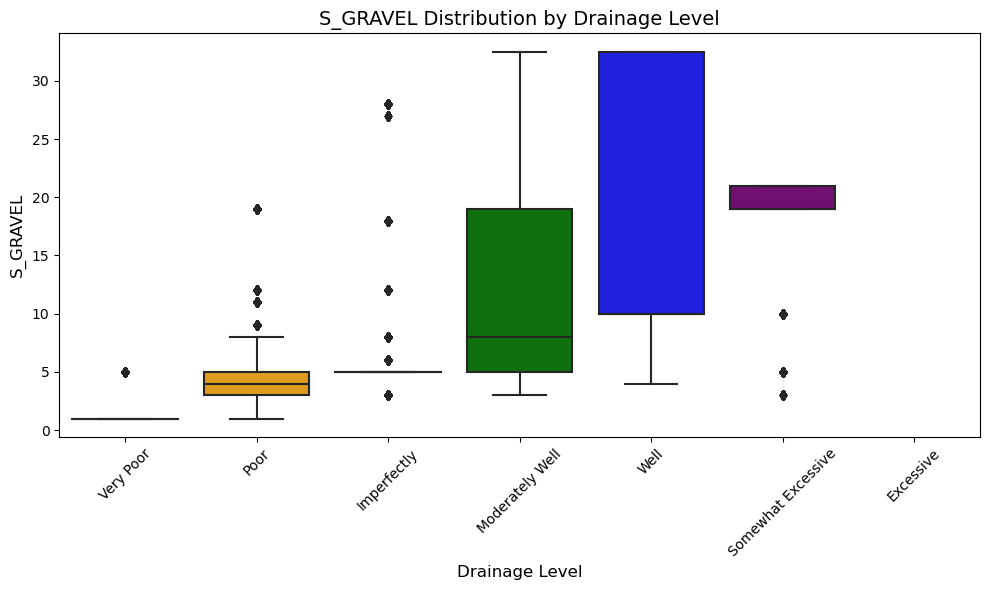

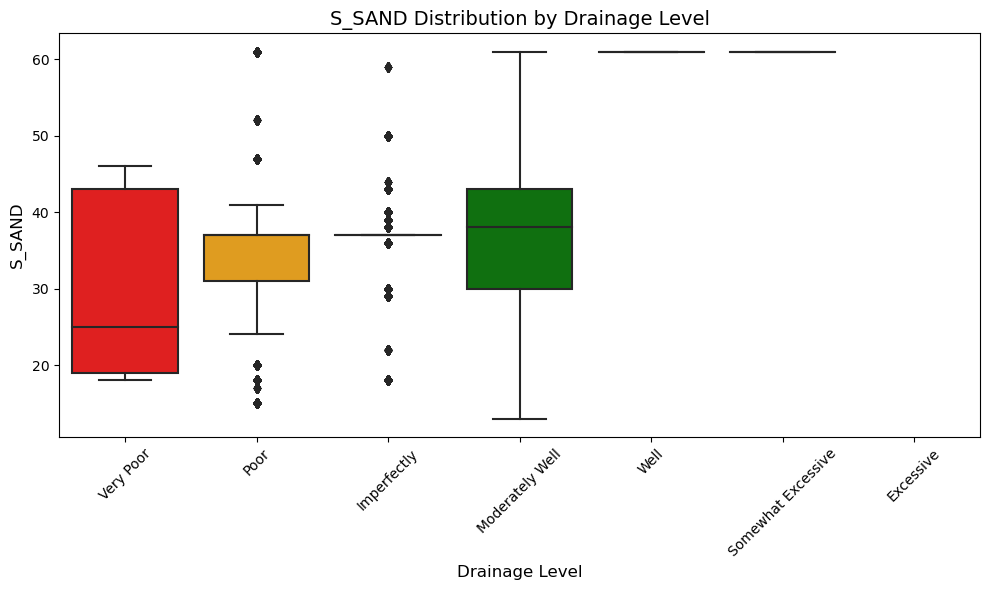

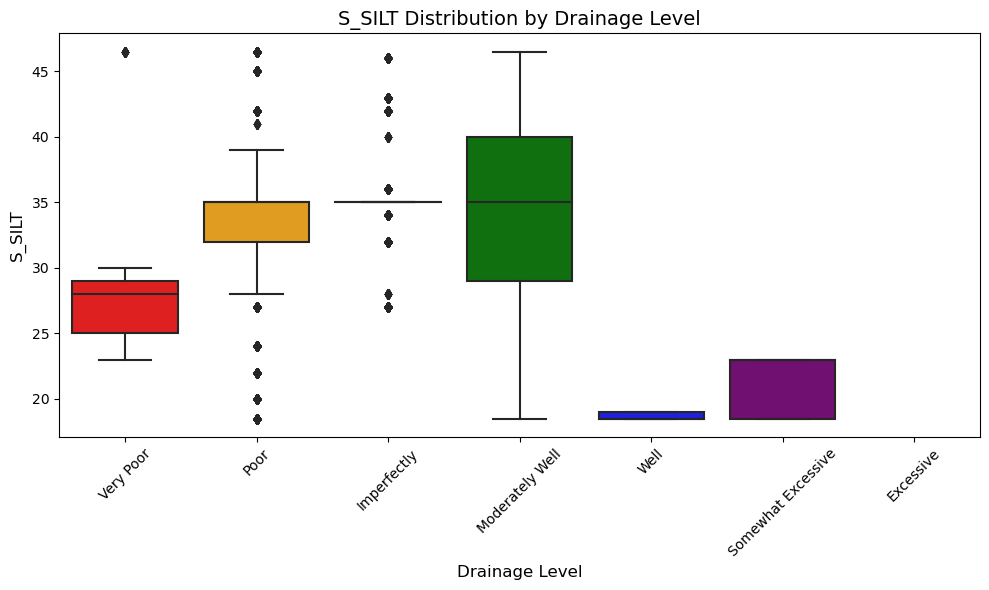

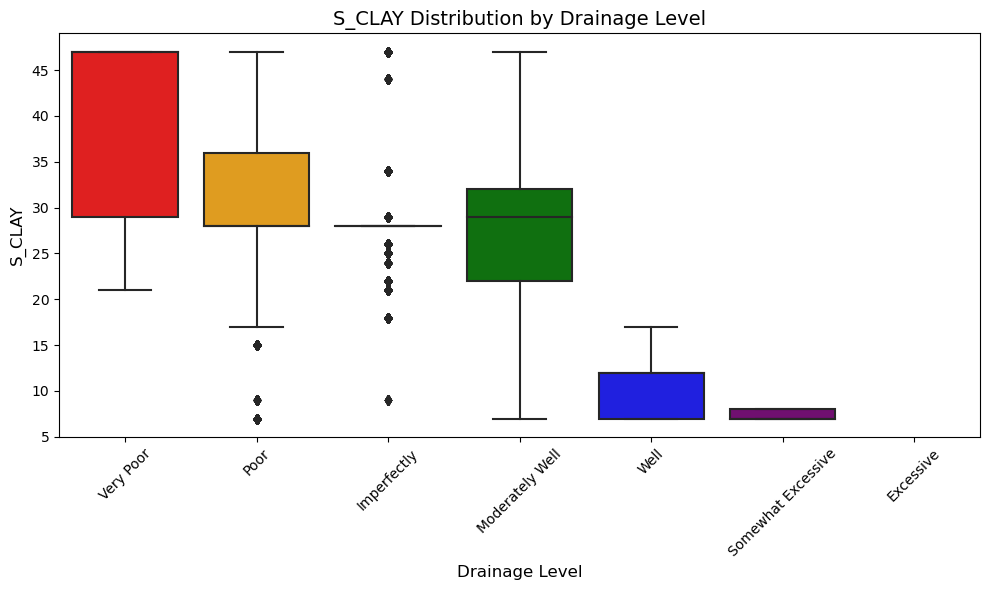

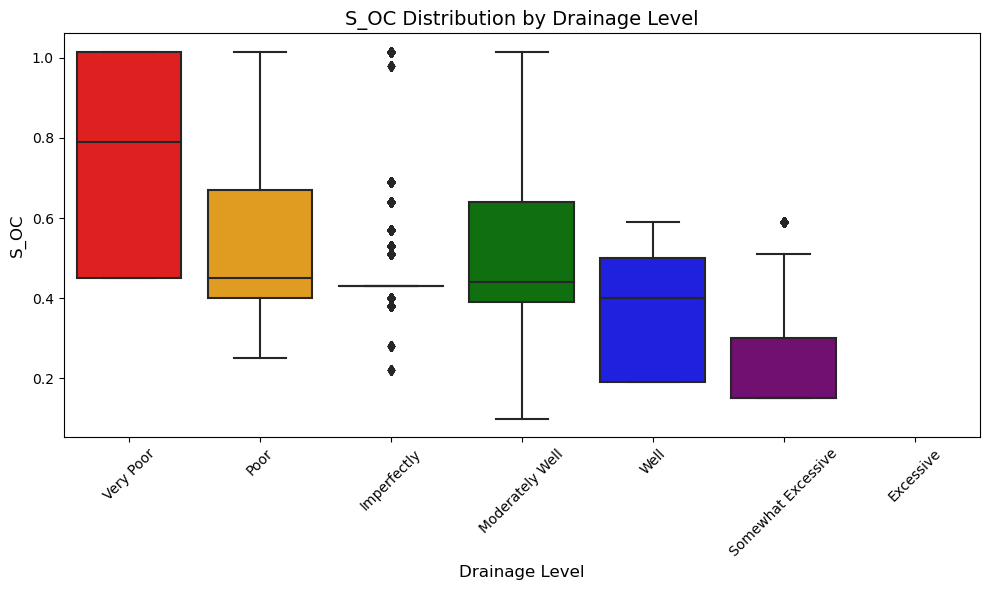

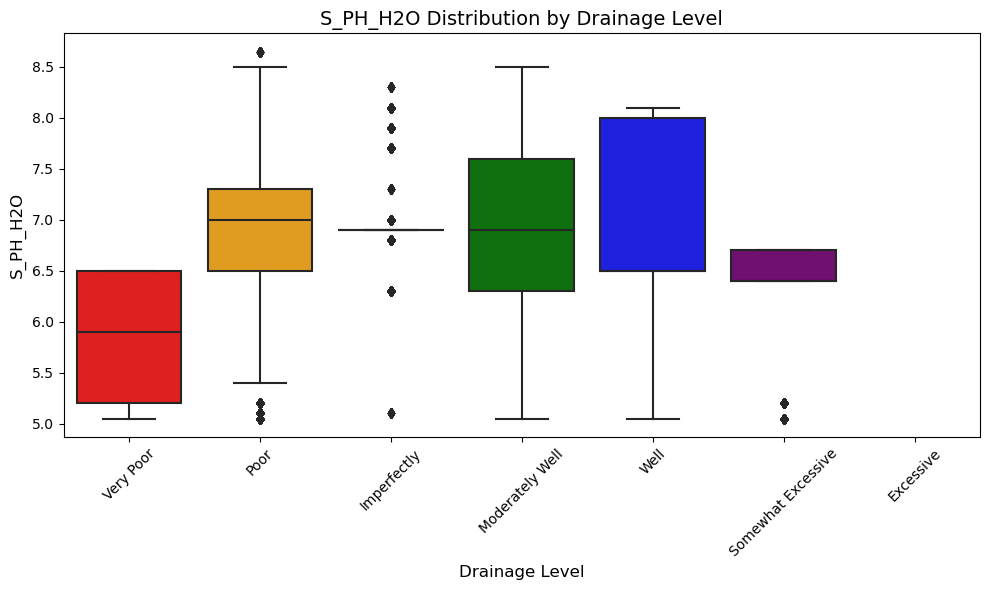

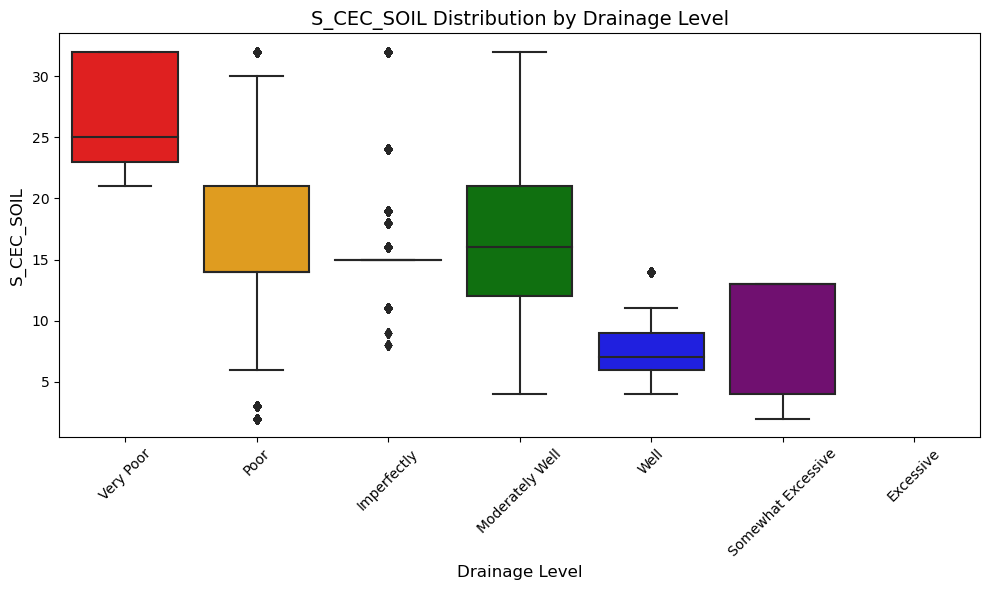

In [ ]:
# Define a custom color palette for drainage levels
palette = {
    'Very Poor': 'red',
    'Poor': 'orange',
    'Imperfectly': 'yellow',
    'Moderately Well': 'green',
    'Well': 'blue',
    'Somewhat Excessive': 'purple',
    'Excessive': 'brown'
}

# Plotting each soil property by drainage level using box plots
for property in soil_properties:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        x='Drainage_Description',
        y=property,
        order=['Very Poor', 'Poor', 'Imperfectly',
               'Moderately Well', 'Well',
               'Somewhat Excessive', 'Excessive'],
        palette=palette
    )
    plt.title(f'{property} Distribution by Drainage Level', fontsize=14)
    plt.xlabel('Drainage Level', fontsize=12)
    plt.ylabel(property, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


### Analysis of the Box Plot for S_PH_H2O by Drainage Level:

1. **Overall Trends**:
   - The pH distribution varies significantly across drainage levels, indicating that soil drainage characteristics influence pH levels.

2. **Very Poor Drainage**:
   - Median pH is around 6.0, with a tendency toward acidic conditions.
   - Narrow interquartile range (IQR) suggests less variability in soil pH, likely due to water stagnation and limited aeration.

3. **Poor Drainage**:
   - Slightly higher median pH (~6.5), with a broader IQR compared to "Very Poor."
   - Outliers exist on both acidic and alkaline sides, indicating mixed drainage and soil conditions.

4. **Imperfectly and Moderately Well Drainage**:
   - Moderately well-drained soils exhibit higher pH (~6.9) and a wider range, indicating better aeration and potential alkalinity from dissolved minerals.
   - Imperfectly drained soils fall between poorly and moderately well-drained categories, reflecting transitional characteristics.

5. **Well Drainage**:
   - Highest median pH (~7.1), indicative of neutral to slightly alkaline conditions.
   - A broad range of values suggests diverse soil chemistry and better water and nutrient exchange.

6. **Somewhat Excessive Drainage**:
   - Median pH is the lowest (~6.4) among well-drained categories, suggesting that excessive drainage might leach out minerals, leading to slight acidity.


This plot helps identify soil management strategies tailored to drainage levels and pH preferences of different crops.

In [ ]:
# Correlation analysis between drainage and soil properties
# For correlation, we need to convert drainage levels to numerical scale (1-7)
df['Drainage_Numeric'] = df['DRAINAGE']
correlations = df[soil_properties + ['Drainage_Numeric']].corr()['Drainage_Numeric'].drop('Drainage_Numeric')
print("Correlation between Drainage and Soil Properties:")
correlations

Correlation between Drainage and Soil Properties:


S_GRAVEL      0.442354
S_SAND        0.435372
S_SILT       -0.224649
S_CLAY       -0.474219
S_OC         -0.141042
S_PH_H2O     -0.040428
S_CEC_SOIL   -0.223522
Name: Drainage_Numeric, dtype: float64

### Correlation Analysis between Drainage and Soil Properties:

1. **Positive Correlations**:
   - **S_GRAVEL (0.442)** and **S_SAND (0.435)**:
     - Soils with better drainage tend to have higher gravel and sand content, which aligns with the real-world scenario where sandy soils are more permeable and promote drainage.
   
2. **Negative Correlations**:
   - **S_CLAY (-0.474)**:
     - A strong negative correlation indicates that clay-rich soils have poor drainage due to their compact nature, which restricts water movement.
   - **S_SILT (-0.225)**:
     - Silt content also negatively correlates with drainage, but to a lesser extent. Silt soils often retain water, making them less permeable.

3. **Weak Negative Correlations**:
   - **S_OC (-0.141)**:
     - Organic carbon shows a slight negative correlation with drainage, possibly because organic matter tends to retain moisture and is found more in poorly drained soils.
   - **S_CEC_SOIL (-0.224)**:
     - Cation exchange capacity (CEC) negatively correlates, as clay soils with high CEC are often poorly drained.
   - **S_PH_H2O (-0.040)**:
     - Soil pH has a negligible negative correlation, implying that pH is not strongly influenced by drainage.

### Implications:
- **Better Drainage (e.g., sandy and gravelly soils)**: Suitable for crops requiring well-drained conditions, but may need soil amendments to retain moisture and nutrients.
- **Poor Drainage (e.g., clayey soils)**: Likely to need aeration or drainage improvement measures to support crops that cannot tolerate waterlogged conditions.
- These insights are critical for precision agriculture, as they guide crop selection and soil management based on drainage characteristics.

In [ ]:
# Group by crop labels and calculate mean for each soil property
label_soil_summary = df.groupby('label')[soil_properties].mean()
print("Mean Soil Properties by Crop Label:")
label_soil_summary

Mean Soil Properties by Crop Label:


S_GRAVEL     S_SAND     S_SILT     S_CLAY      S_OC  S_PH_H2O  \
label                                                                         
apple         9.218688  38.694245  32.735765  27.768976  0.476947  6.561064   
banana        8.873675  38.812909  32.489487  27.844307  0.475328  6.605056   
blackgram     9.657791  35.284806  36.032076  27.485369  0.524155  7.476075   
chickpea     10.641241  37.026233  34.605147  26.929617  0.491756  7.418468   
coconut       8.690594  38.608395  31.951423  28.522835  0.457296  6.474643   
coffee        9.839242  36.924970  33.695480  27.926020  0.509866  7.070249   
cotton       10.330456  37.200747  34.285254  27.211011  0.500153  7.203445   
grapes       11.473204  40.385890  32.092187  26.441263  0.497371  6.565385   
jute          9.580471  37.092442  33.119245  28.455556  0.499384  7.004314   
kidneybeans   8.916326  38.900178  32.471748  27.865236  0.460684  6.325689   
lentil        8.955855  36.812993  35.014986  27.225379  0.509604  7.164131   
maize        10.670226  38.872396  32.569934  27.360936  0.505212  6.718051   
mango         9.537046  39.254878  31.977525  27.510249  0.493072  6.564176   
mothbeans    10.673933  39.233452  33.337592  25.870157  0.488151  6.988314   
mungbean      9.479547  36.962446  34.294847  27.638596  0.527106  7.009388   
muskmelon     9.942015  40.671282  31.021960  26.439652  0.491461  6.656247   
orange       10.198232  37.509065  34.911801  26.507475  0.507663  7.245199   
papaya       10.729943  37.227544  33.655661  27.372791  0.545413  7.078697   
pigeonpeas    9.690449  39.713900  31.520207  27.234917  0.506239  6.255709   
pomegranate   9.565950  37.470554  33.713545  27.953422  0.510882  6.867196   
rice          8.895293  37.930111  33.060134  27.712139  0.484921  6.785744   
watermelon    9.406798  37.767948  33.258467  27.947716  0.526214  6.817765   

             S_CEC_SOIL  
label                    
apple         15.396595  
banana        15.574126  
blackgram     18.242152  
chickpea      17.115816  
coconut       14.985751  
coffee        16.914576  
cotton        17.158474  
grapes        15.673406  
jute          16.803645  
kidneybeans   15.111084  
lentil        16.968656  
maize         16.095203  
mango         15.325019  
mothbeans     14.774168  
mungbean      16.732367  
muskmelon     15.517459  
orange        16.262189  
papaya        16.623503  
pigeonpeas    14.282525  
pomegranate   16.121143  
rice          15.488106  
watermelon    16.299425

### Analysis and Real-World Correlations of Mean Soil Properties by Crop Label:

1. **S_GRAVEL and S_SAND (Soil Texture)**:
   - **Higher gravel and sand content (e.g., grapes, maize, mothbeans)**:
     - These crops thrive in well-drained soils, as sandy soils prevent waterlogging, promoting root aeration. For example, **grapes** require excellent drainage for healthy root development and disease prevention.
   - **Lower sand content (e.g., blackgram, rice)**:
     - Crops like **rice** are typically grown in heavier soils with lower sand and higher clay or silt content, as they need to retain water for extended periods during cultivation.

2. **S_SILT and S_CLAY**:
   - **Higher clay content (e.g., rice, jute, lentil)**:
     - Crops like **rice** and **jute** thrive in clayey soils due to their ability to retain water, which is vital for their growth.
   - **Lower clay content (e.g., muskmelon, grapes)**:
     - Muskmelon and grapes prefer lighter soils, which allow for better drainage and aeration to support their root systems.

3. **S_OC (Soil Organic Carbon)**:
   - Crops like **papaya (0.545)** and **blackgram (0.524)** show higher organic carbon content, which reflects their need for nutrient-rich soils to support high yields.
   - Crops such as **pigeonpeas (0.506)** and **lentil (0.509)** also thrive in organic-rich soils, as these nutrients improve plant growth and nitrogen fixation.

4. **S_PH_H2O (Soil pH)**:
   - **Neutral to slightly acidic pH (6.5-7.0)**:
     - Most crops fall within this range, as neutral pH enhances nutrient availability. For example:
       - **Banana and mango (~6.6)**: These tropical crops prefer slightly acidic soils.
       - **Chickpea (7.41) and lentil (7.16)**: These legumes thrive in alkaline to neutral soils, aiding their nitrogen fixation.
   - **Acidic soils (<6.5)**:
     - Crops like **kidneybeans (6.32)** and **pigeonpeas (6.25)** are tolerant of slightly acidic soils, making them suitable for regions with higher rainfall or leaching.

5. **S_CEC_SOIL (Cation Exchange Capacity)**:
   - **Higher CEC (e.g., very poor-draining crops like jute, lentil, watermelon)**:
     - Indicates the soil's capacity to retain and supply nutrients to crops. Crops with higher nutrient demand (e.g., **watermelon**, **papaya**) correlate with higher CEC values.
   - **Lower CEC (e.g., pigeonpeas, mothbeans)**:
     - These crops are more drought-tolerant and are adapted to low-nutrient soils.

### Real-World Correlations:
1. **Crop Adaptation to Soil Texture**:
   - Sandy soils with high gravel content are often found in arid regions, supporting drought-tolerant crops like **grapes**, **cotton**, and **maize**.
   - Heavier clay soils are associated with water retention, making them suitable for crops like **rice** in regions with high rainfall.

2. **Soil pH Preferences**:
   - The pH data aligns with regional crop suitability. For instance:
     - **Acidic soils (pH < 6.5)** in tropical and subtropical regions support crops like **banana**, **mango**, and **coconut**.
     - **Neutral to alkaline soils (pH ~7)** in semi-arid regions favor crops like **lentil** and **chickpea**.

3. **Soil Nutrient Demand and Organic Carbon**:
   - High organic carbon (S_OC) in soils aligns with intensive agriculture systems where crops like **papaya** and **watermelon** are grown for commercial purposes due to their higher nutrient requirements.

These insights are critical for optimizing agricultural practices, soil management, and crop selection to maximize yield and sustainability.

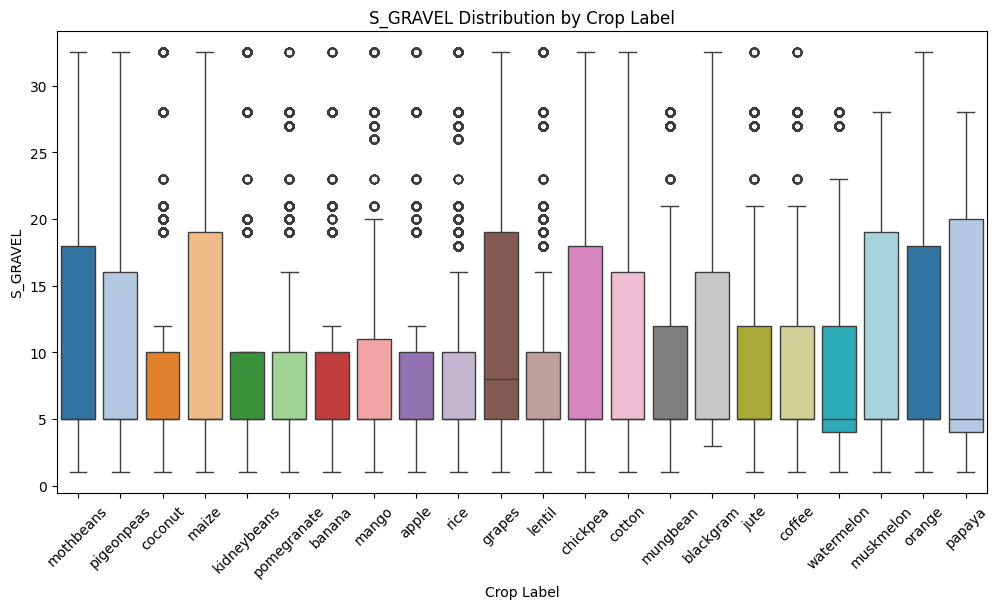

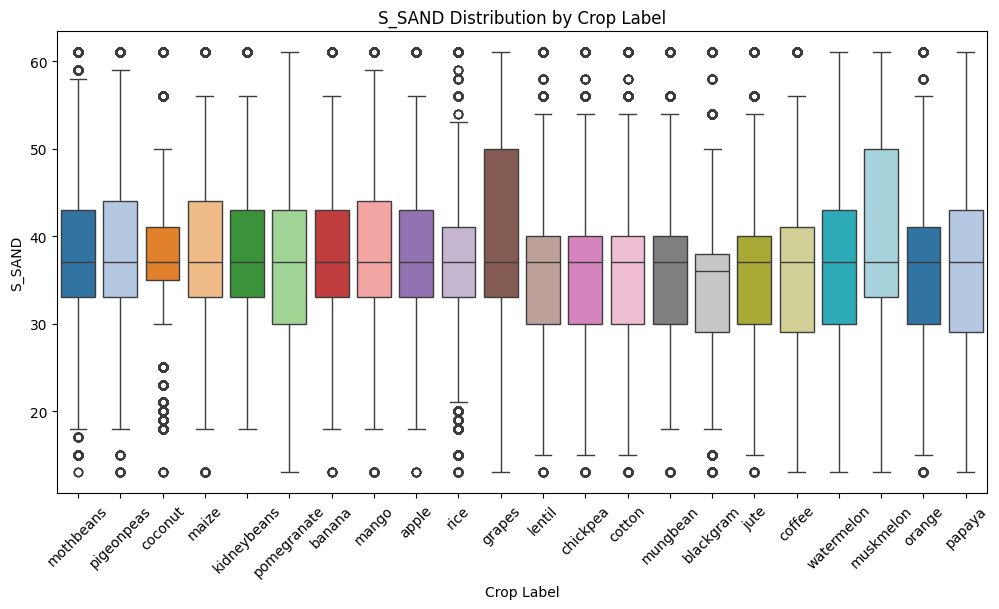

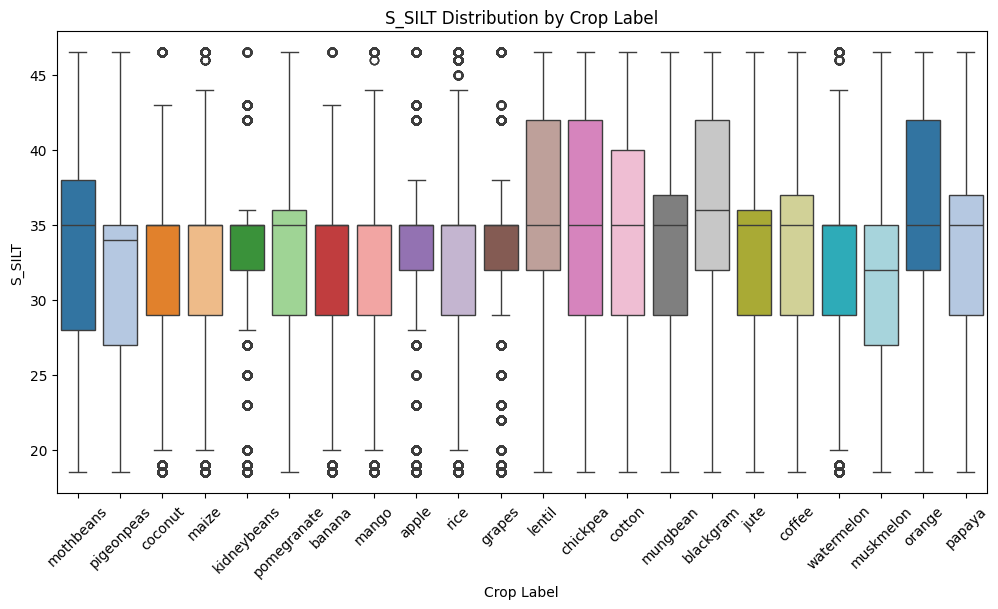

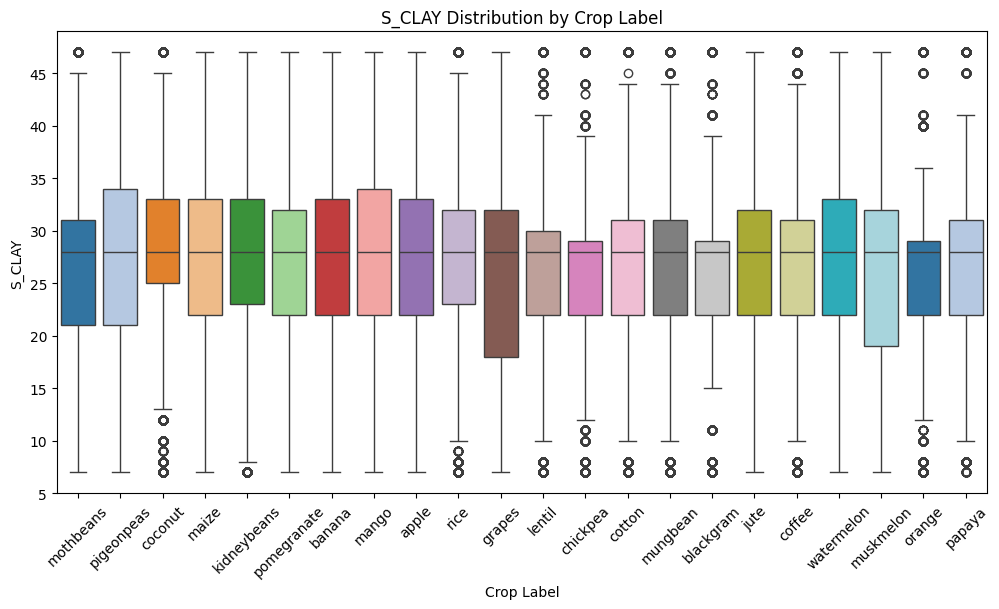

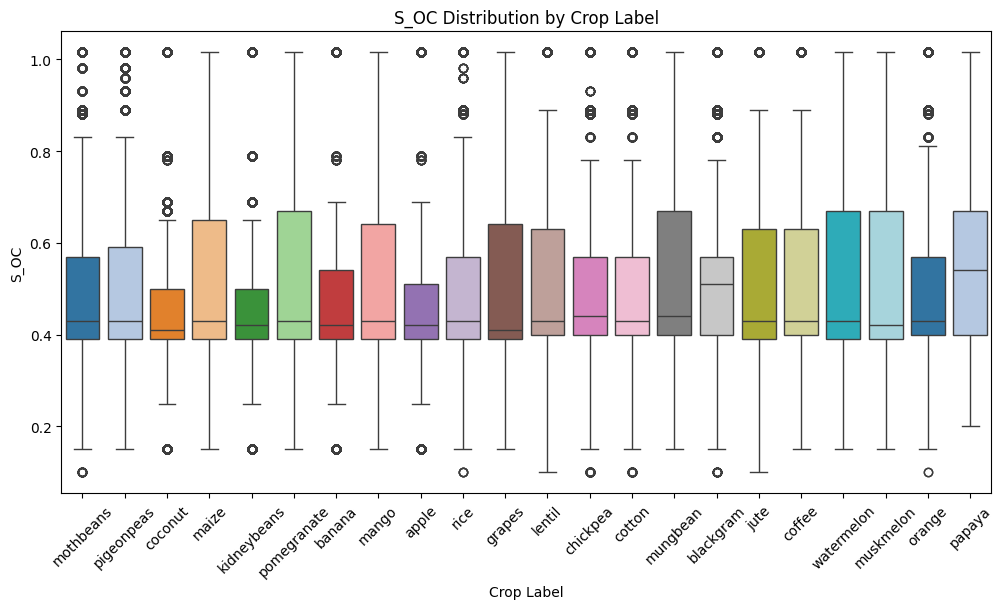

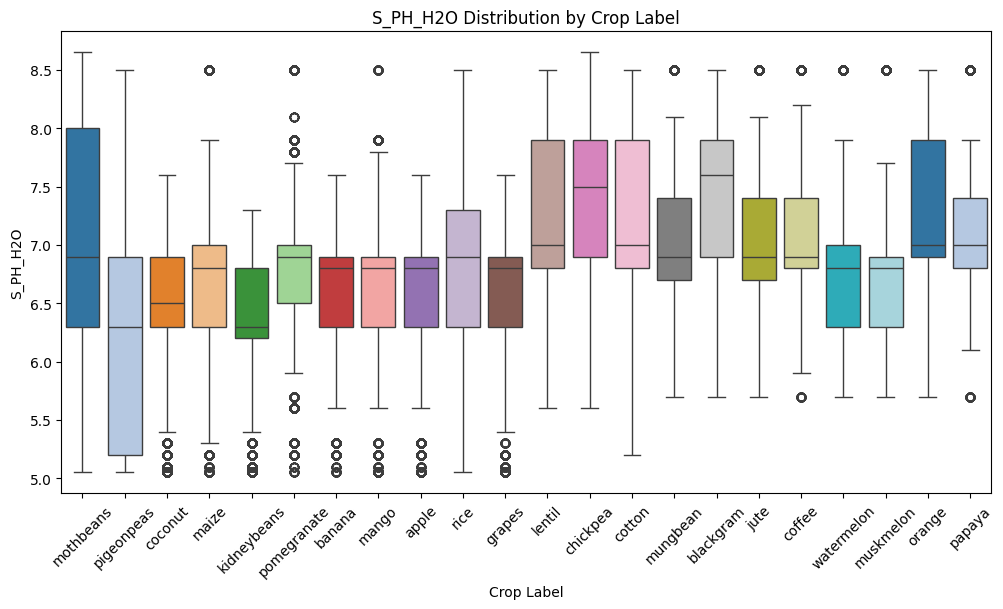

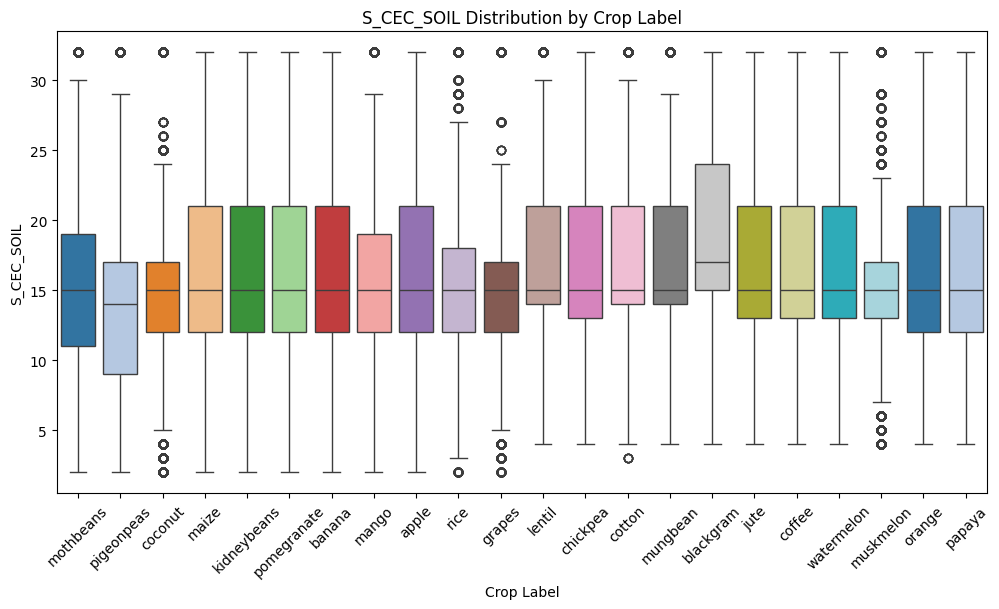

In [ ]:
# Get the unique crop labels
unique_labels = df['label'].unique()

# Generate a color palette with a distinct color for each label
palette = sns.color_palette("tab20", len(unique_labels))  # Using 'tab20' for a variety of colors
palette_dict = dict(zip(unique_labels, palette))

# Plotting each soil property by crop label using box plots with different colors
for property in soil_properties:
    plt.figure(figsize=(12, 6))
    boxplot = sns.boxplot(data=df, x='label', y=property, hue='label', dodge=False,
                          palette=palette_dict, showfliers=True)  # Display outliers
    plt.title(f'{property} Distribution by Crop Label')
    plt.xlabel('Crop Label')
    plt.ylabel(property)
    plt.xticks(rotation=45)  # Rotate labels for readability

    plt.show()

### <b> 6. Interpreting Outputs and Making Sense <b>

The output table summarizes the **mean values** of key soil properties for each crop label (`label`). Here's a breakdown of the information, an interpretation, and an assessment of its reliability:

---

### 6.1. **Key Points in the Output**
- **Columns**:
  - **`S_GRAVEL`, `S_SAND`, `S_SILT`, `S_CLAY`**:
    - These represent the percentages of gravel, sand, silt, and clay in the subsoil, describing the soil's texture.
  - **`S_OC`**:
    - Total organic carbon in the subsoil, indicating fertility potential.
  - **`S_PH_H2O`**:
    - The pH value of the subsoil in a water solution, describing soil acidity or alkalinity.
  - **`S_CEC_SOIL`**:
    - Cation exchange capacity of the soil, measuring its ability to retain nutrients.

- **Rows (`label`)**:
  - Each row corresponds to a crop label, summarizing the average soil properties for the locations where that crop grows.

---

### 6.2. **Interpreting the Data**

#### 6.2.1. **Soil Texture** (`S_GRAVEL`, `S_SAND`, `S_SILT`, `S_CLAY`):
   - The distribution of sand, silt, and clay determines the soil type (e.g., sandy, loamy, or clayey soil):
     - **Rice** has moderate sand content (~38%), higher silt (~33%), and moderate clay (~28%), consistent with its preference for silty loam soils.
     - **Muskmelon** and **grapes** have higher sand content (~40%), which aligns with their preference for sandy soils that drain well.
     - **Blackgram** has lower sand (~35%) and higher silt (~36%), suggesting a loamy soil preference.

#### 6.2.2. **Organic Carbon (`S_OC`)**:
   - Higher organic carbon often indicates fertile soil:
     - **Papaya** (0.545) and **mungbean** (0.527) are grown in fertile soils.
     - **Coconut** and **kidneybeans** have lower organic carbon (~0.46), reflecting a preference for less fertile soils or reliance on added fertilizers.

#### 6.2.3. **pH (`S_PH_H2O`)**:
   - pH levels provide insights into soil acidity:
     - Most crops prefer neutral or slightly acidic soils (pH ~6.5–7.5).
     - **Kidneybeans** and **pigeonpeas** prefer slightly acidic soils (pH ~6.3).
     - **Blackgram** and **chickpea** prefer alkaline soils (pH ~7.4–7.5).

#### 6.2.4. **Cation Exchange Capacity (`S_CEC_SOIL`)**:
   - A higher CEC indicates the soil can retain more nutrients:
     - **Blackgram** has the highest CEC (18.24), meaning it thrives in nutrient-rich soils.
     - **Pigeonpeas** has the lowest CEC (14.28), indicating adaptability to less fertile soils.

---

### **6.3. Does the Data Make Sense?**

#### 6.3.1. **Alignment with Known Crop Requirements**
- The soil properties for most crops align well with their known requirements:
  - **Rice** grows well in silty, moderately fertile soils with near-neutral pH.
  - **Muskmelon** and **grapes** grow in sandy soils that drain well.
  - **Papaya** and **mungbean** prefer fertile soils with high organic carbon.

#### 6.3.2. **Spread and Patterns**
- The ranges for key properties (e.g., sand, silt, pH) are consistent with typical agricultural soils.
- Variability in the values reflects real-world diversity in soil conditions.

#### 6.3.3. **Reliability of the Data**
- **Strengths**:
  - The means reflect plausible soil conditions for each crop, supporting their reliability.
  - Relationships between properties (e.g., sand and drainage) align with known soil science principles.
- **Potential Weaknesses**:
  - If the dataset has limited geographic coverage, it may not capture the full range of soil conditions for each crop.
  - If some crops have fewer data points, their means may not be statistically reliable.

---

### **6.4. How to Assess Reliability**
#### 6.4.1. **Check Data Coverage**:
   - Ensure that each crop has enough data points. For example:
     ```python
     print(df['label'].value_counts())
     ```
     This will show the count of rows for each crop. If some crops have very few data points, their means may not be representative.

#### 6.4.2. **Correlation Analysis**:
   - Check if the soil properties are correlated with expected outcomes. For example, higher `S_OC` and `S_CEC_SOIL` should align with crops that are nutrient-demanding.

#### 6.4.3. **Domain Knowledge Validation**:
   - Compare the summary with known agronomic requirements for each crop. For example:
     - **Rice** prefers silty clay soils with near-neutral pH.
     - **Cotton** grows well in sandy loam soils with good drainage.

### <b> 7. Visualizations Relevant Data and Relationships <b>

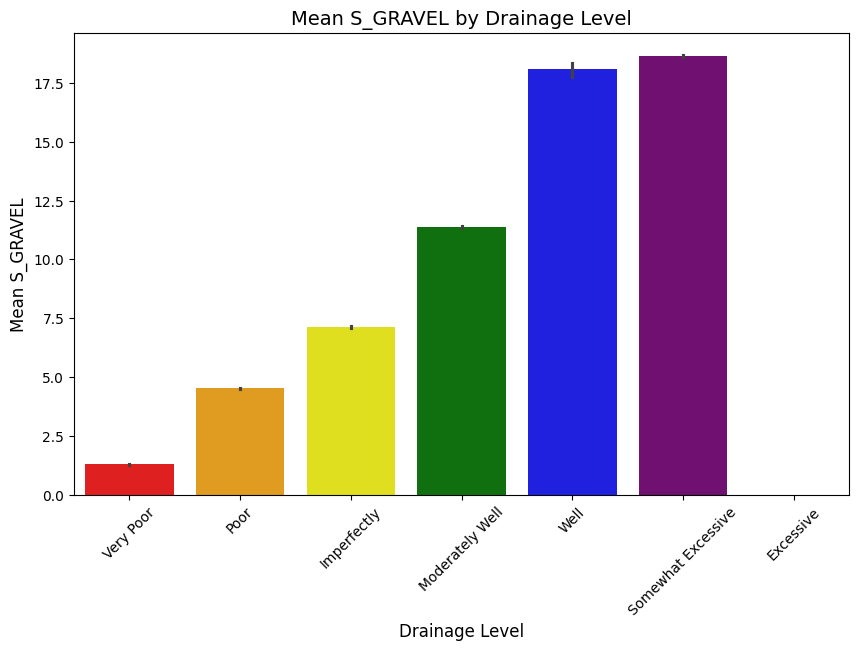

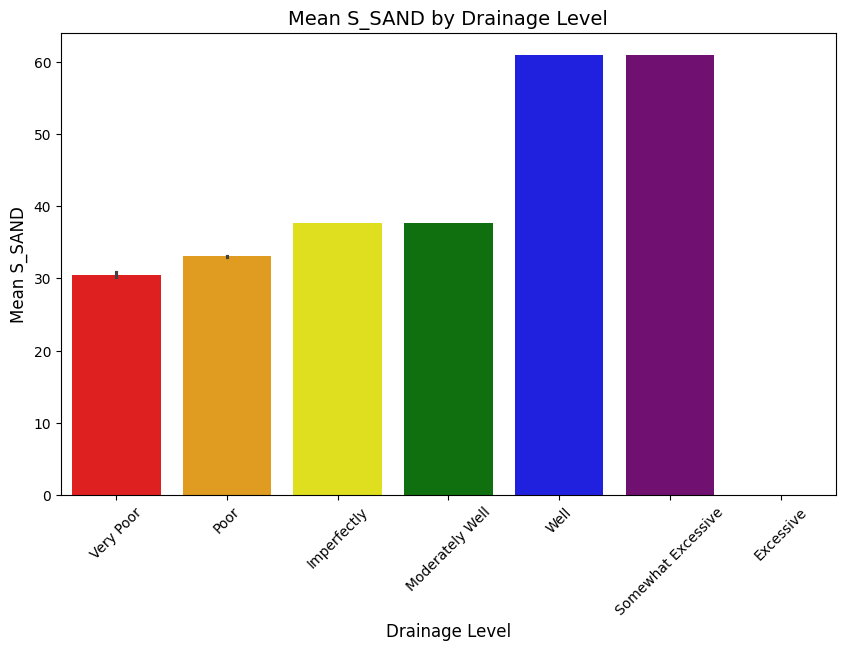

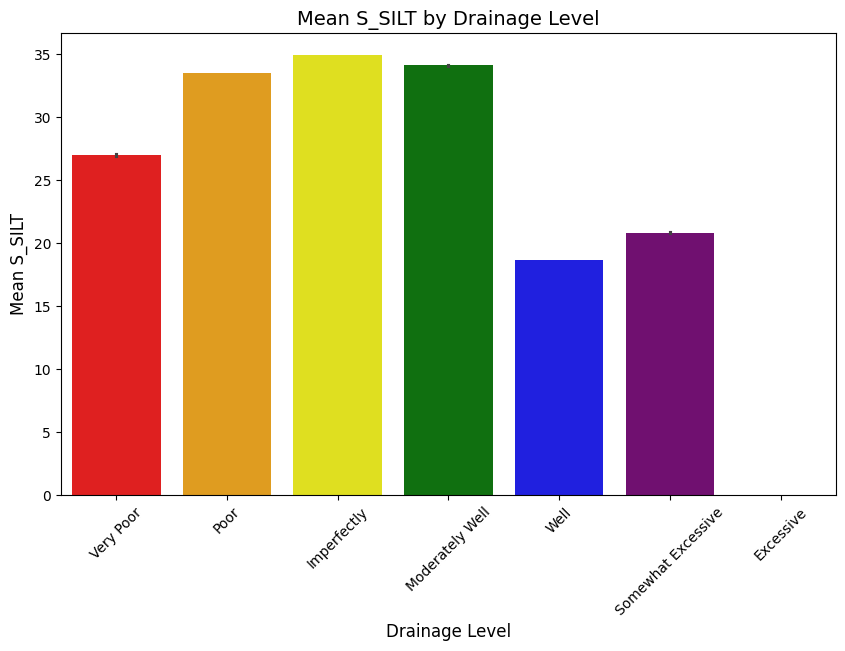

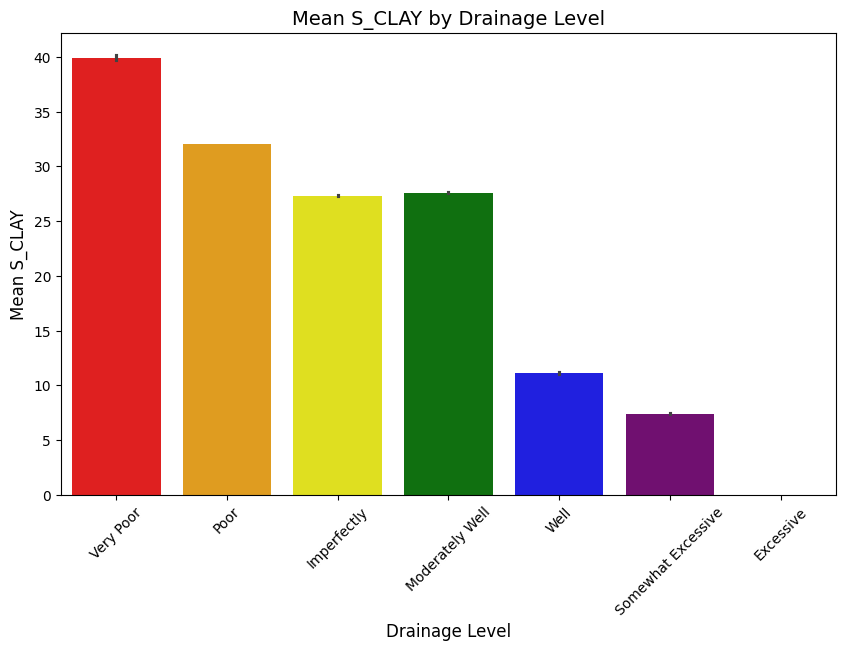

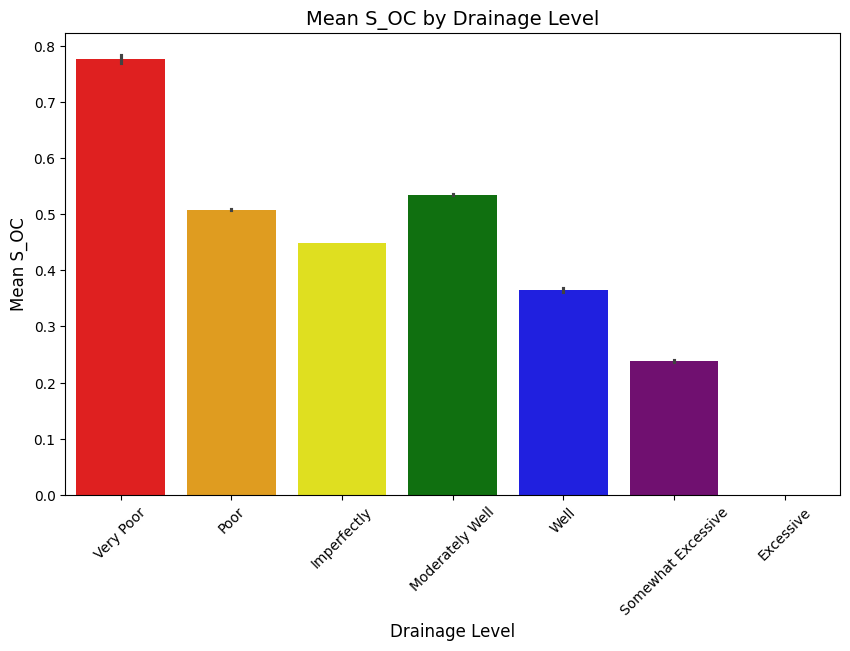

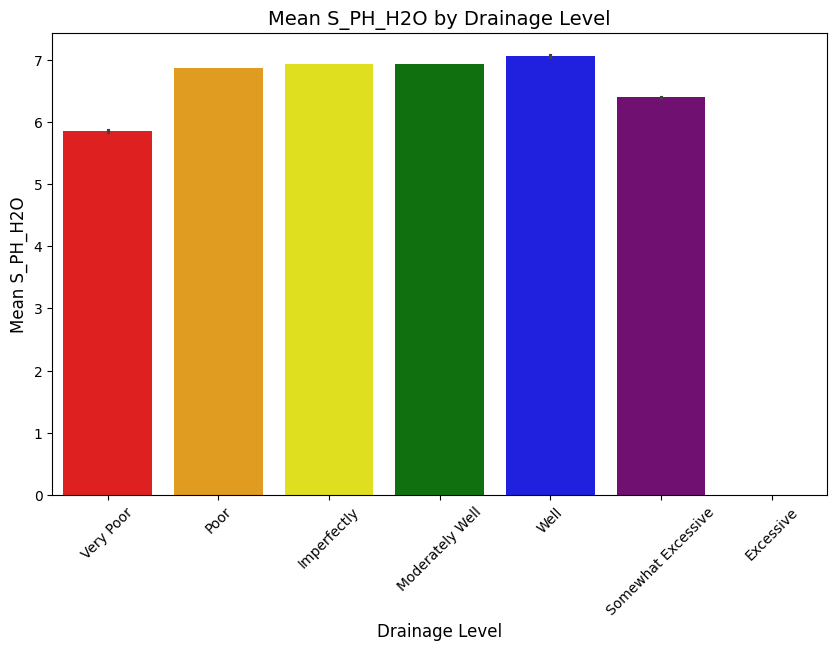

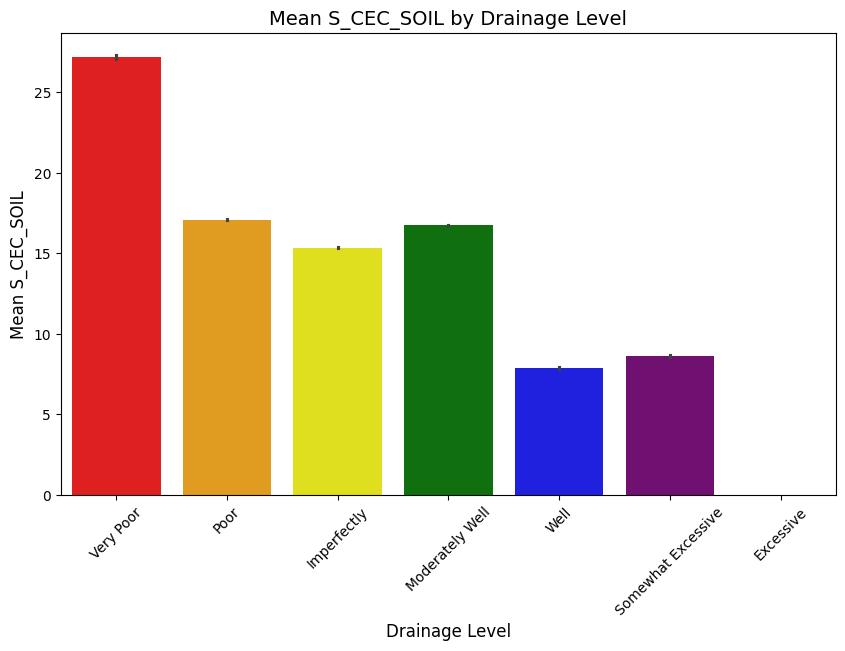

In [ ]:
# Define a custom color palette for drainage levels
palette = {
    'Very Poor': 'red',
    'Poor': 'orange',
    'Imperfectly': 'yellow',
    'Moderately Well': 'green',
    'Well': 'blue',
    'Somewhat Excessive': 'purple',
    'Excessive': 'brown'
}

# Bar Plot: Mean values of each soil property for different drainage levels
for property in soil_properties:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x='Drainage_Description',
        y=property,
        estimator='mean',
        order=['Very Poor', 'Poor', 'Imperfectly',
               'Moderately Well', 'Well',
               'Somewhat Excessive', 'Excessive'],
        hue='Drainage_Description',  # Assign hue to use palette correctly
        dodge=False,                 # Avoid splitting bars
        palette=palette,             # Use the custom palette
        legend=False                 # Disable redundant legend
    )
    plt.title(f'Mean {property} by Drainage Level', fontsize=14)
    plt.xlabel('Drainage Level', fontsize=12)
    plt.ylabel(f'Mean {property}', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.show()

### Analysis: Mean Soil pH (S_PH_H2O) by Drainage Level

1. **General Observations**:
   - **Very Poorly Drained Areas**: Show the lowest mean soil pH (~5.8), indicating more acidic conditions. This aligns with areas where water stagnates, leading to anaerobic conditions and organic acid buildup.
   - **Well-Drained Areas**: Exhibit slightly higher pH (~7.0), reflecting neutral to mildly alkaline soils typical of areas with good aeration and nutrient availability.
   - **Somewhat Excessive Drainage**: Displays a moderate decrease in pH (~6.4), likely due to leaching of base cations, leaving the soil slightly acidic.
   - **Moderately Well and Poor Drainage**: Maintain consistent pH (~6.8–6.9), which suggests a balanced environment where drainage and soil chemical buffering are optimal.

2. **Real-World Correlation**:
   - **Impact of Drainage on Soil pH**: Poorly drained soils often lead to acidic environments due to reduced oxygen and increased organic matter decomposition. Conversely, excessive drainage can lead to nutrient leaching, reducing soil alkalinity.
   - **Suitability for Crops**:
     - **Acidic Soils (Very Poor)**: Favor crops like rice that thrive in waterlogged, low-pH conditions.
     - **Neutral Soils (Well-Drained)**: Suitable for crops like grapes and chickpeas that require well-drained, nutrient-rich soils.

This visualization highlights the importance of understanding drainage in soil management for crop-specific optimization and overall agricultural productivity.

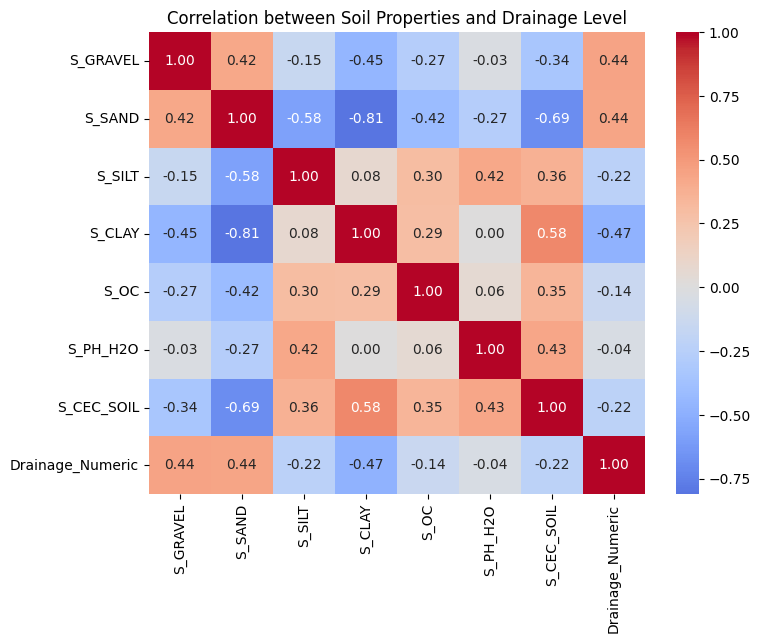

In [ ]:
# 3. Heatmap: Correlation between drainage levels and soil properties
# Convert Drainage_Description to a numerical scale for correlation
df['Drainage_Numeric'] = df['DRAINAGE']
correlation_matrix = df[soil_properties + ['Drainage_Numeric']].corr()

# Plot the heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation between Soil Properties and Drainage Level')
plt.show()

### Analysis: Correlation Between Soil Properties and Drainage Level

1. **Key Observations**:
   - **Positive Correlations**:
     - **S_GRAVEL and Drainage**: Strong positive correlation (0.44) suggests that soils with higher gravel content tend to have better drainage. Gravel improves water infiltration and reduces water retention.
     - **S_SAND and Drainage**: Positive correlation (0.44) indicates that sandy soils are better drained due to larger particle size, allowing water to percolate easily.
   - **Negative Correlations**:
     - **S_CLAY and Drainage**: Strong negative correlation (-0.47) implies that soils with higher clay content have poor drainage. Clay's fine particles retain water, leading to waterlogging.
     - **S_CEC_SOIL (Cation Exchange Capacity)**: Moderate negative correlation (-0.22) reflects that higher nutrient-holding capacity (common in clay-rich soils) is associated with poor drainage.
   - **Weak Correlation**:
     - **S_PH_H2O (Soil pH)**: Weak correlation (-0.04) with drainage suggests that pH is relatively independent of drainage conditions.
     - **S_OC (Soil Organic Carbon)**: Weak negative correlation (-0.14) indicates that organic-rich soils slightly lean toward poorer drainage, likely due to higher water retention in organic matter.

2. **Real-World Implications**:
   - **Sandy and Gravelly Soils**: Suitable for crops requiring well-drained conditions like maize and chickpeas.
   - **Clay-Rich Soils**: Ideal for water-tolerant crops like rice, which thrive in poorly drained, waterlogged conditions.
   - **Soil Amendments**: For poorly drained soils, incorporating organic matter or sand can improve aeration and drainage, supporting a wider variety of crops.

This matrix provides valuable insights for soil and crop management strategies, particularly in tailoring soil properties to enhance drainage or retain moisture as needed for specific agricultural practices.

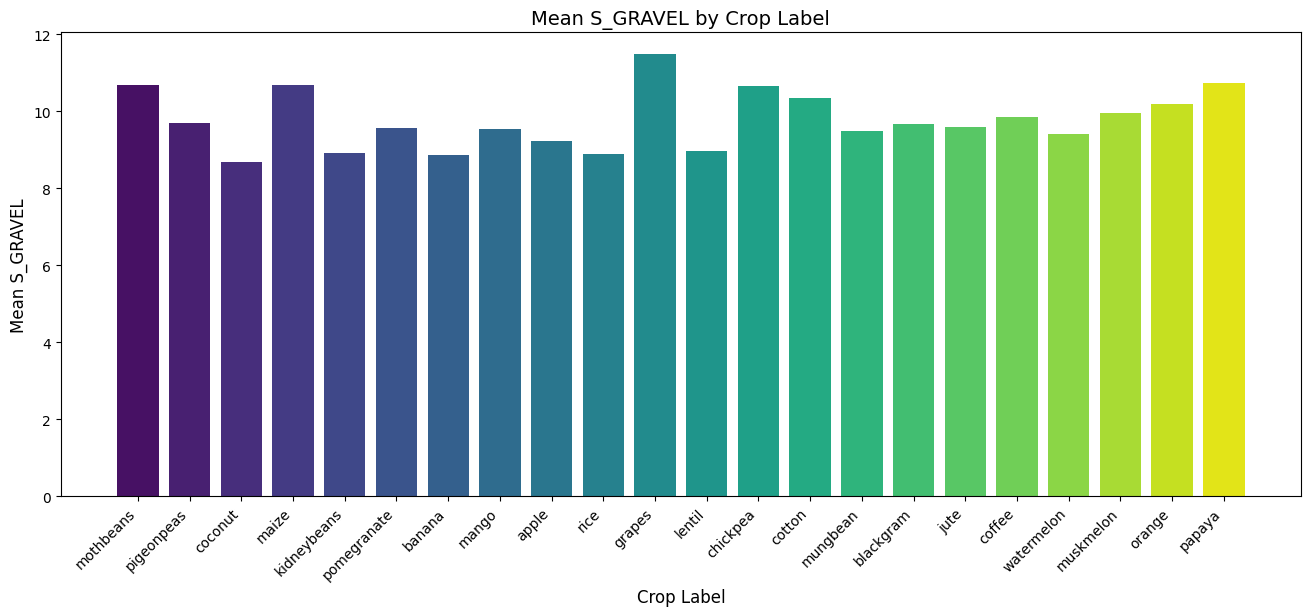

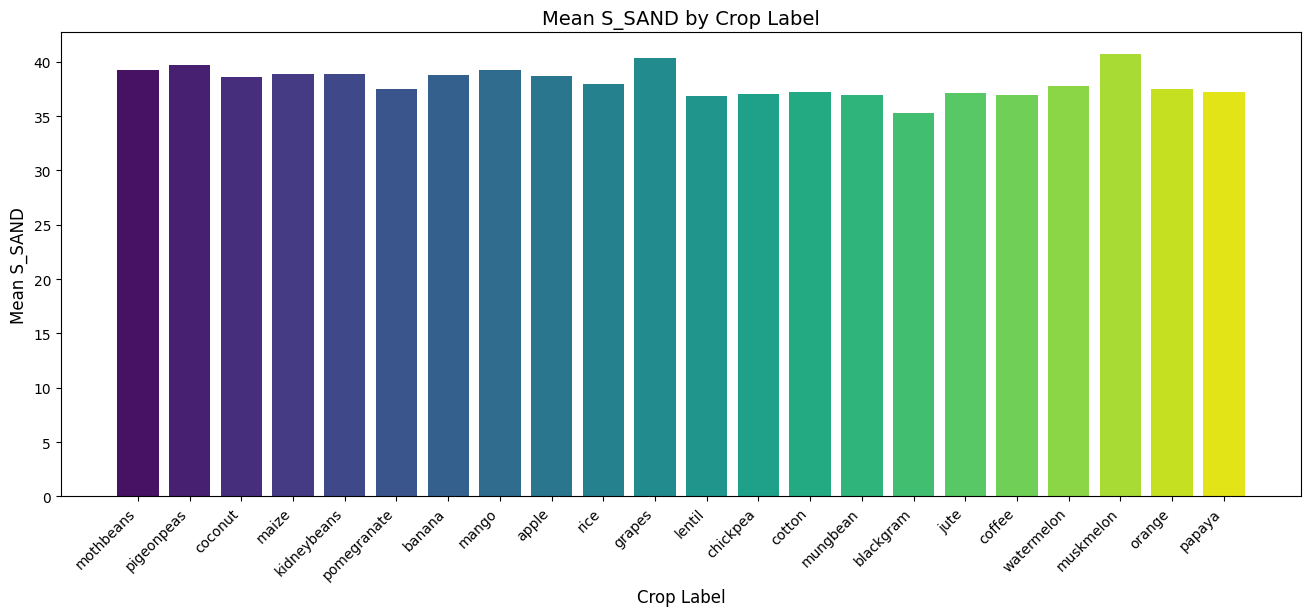

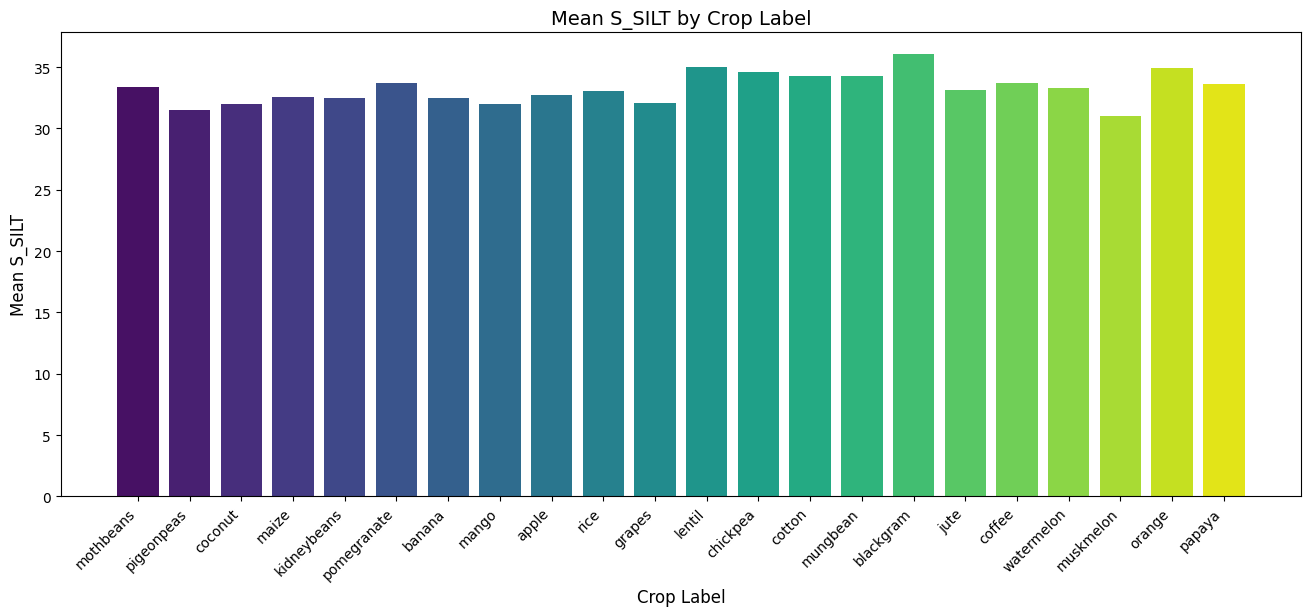

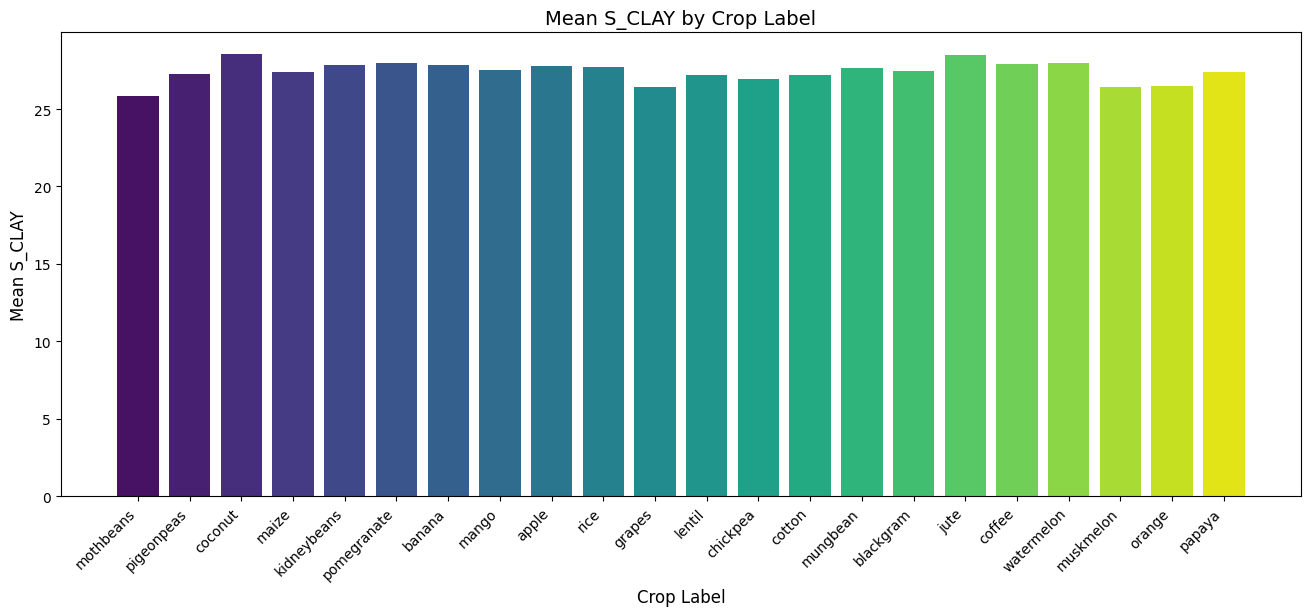

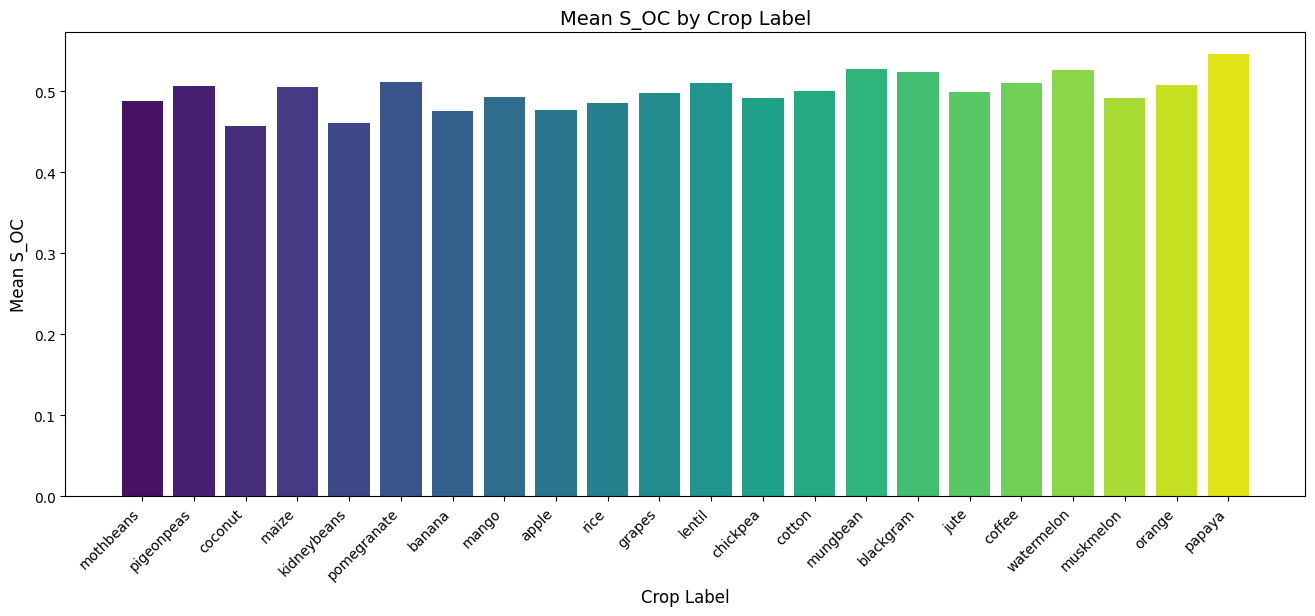

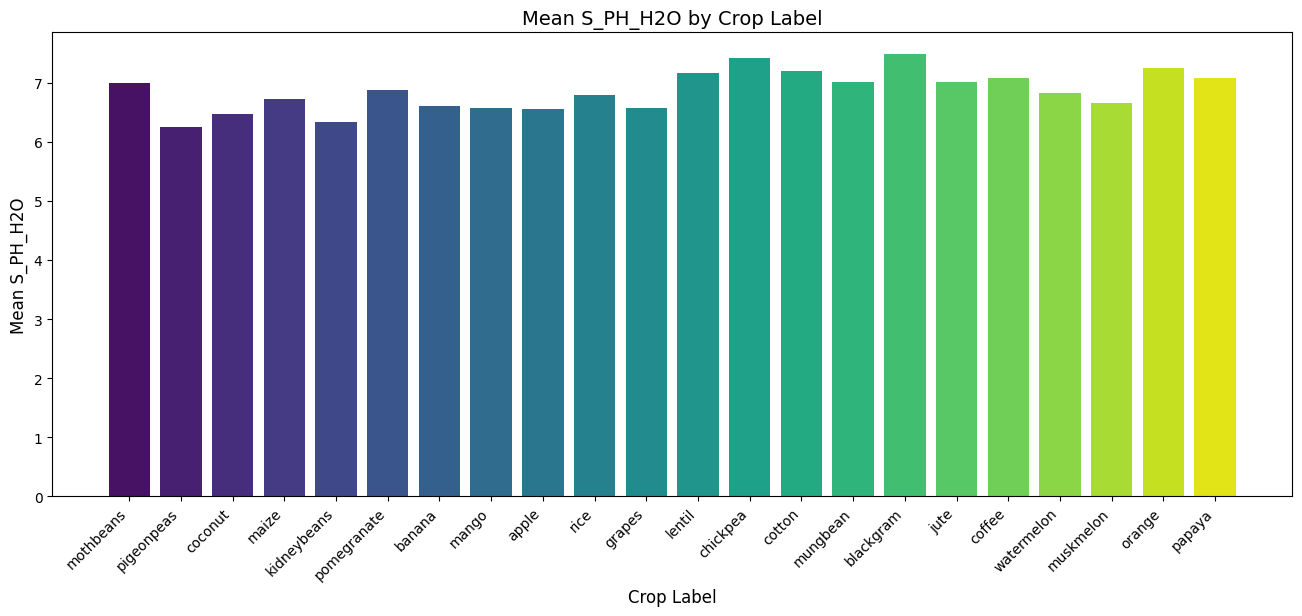

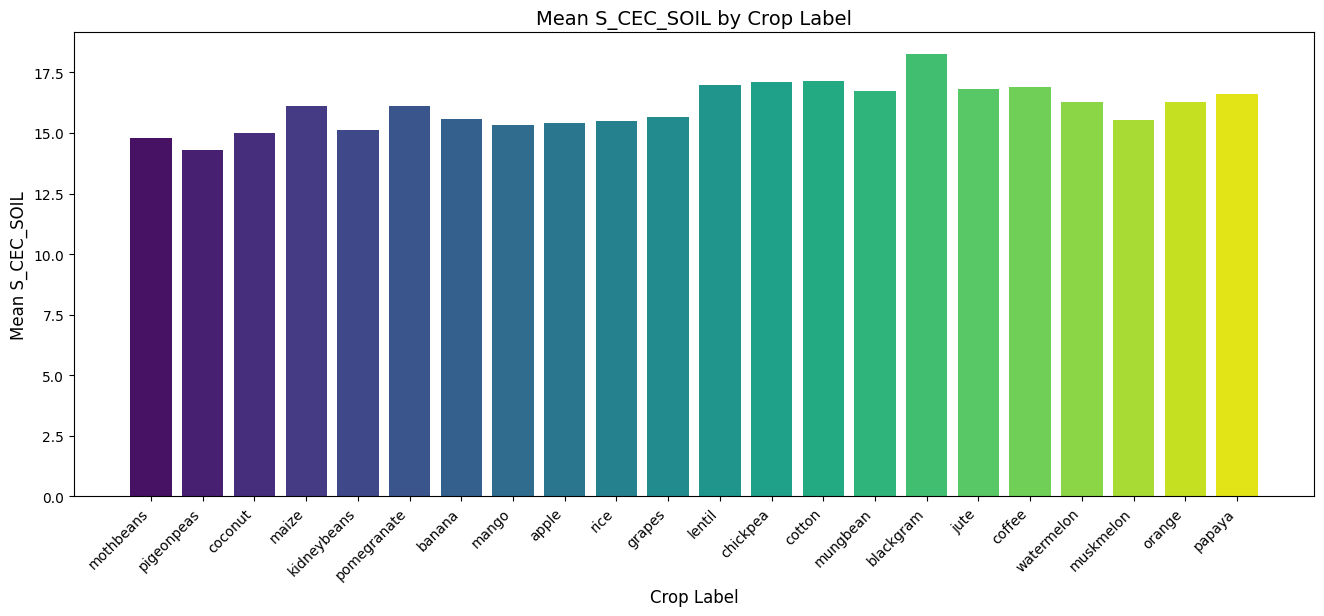

In [ ]:
# 1. Bar Plot: Mean values of each soil property for different crop labels
# Generate a color palette with distinct colors for each label
unique_labels = df['label'].unique()
palette = sns.color_palette("viridis", len(unique_labels))
color_mapping = dict(zip(unique_labels, palette))  # Map colors to labels

# Bar Plot: Mean values of each soil property for different crop labels
for property in soil_properties:
    plt.figure(figsize=(16, 8))  # Increase figure size for better label spacing
    # Compute mean values for each label, ensuring all labels are represented
    means = (
        df.groupby('label')[property]
        .mean()
        .reindex(unique_labels, fill_value=0)  # Fill missing labels with 0
        .reset_index()
    )

    # Create bar plot manually with Matplotlib
    colors = [color_mapping[label] for label in means['label']]
    plt.bar(means['label'], means[property], color=colors)

    # Add labels and titles
    plt.title(f'Mean {property} by Crop Label', fontsize=14)
    plt.xlabel('Crop Label', fontsize=12)
    plt.ylabel(f'Mean {property}', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align labels for visibility

    # Ensure all labels are visible by expanding margins
    plt.subplots_adjust(bottom=0.3)  # Adjust bottom margin for long labels
    plt.show()


### Brief Analysis: Mean S_SILT by Crop Label

1. **High S_SILT Crops**: Papaya and orange show the highest silt content, indicating a preference for well-aerated, moisture-retentive soils.  
2. **Low S_SILT Crops**: Mothbeans and pigeonpeas favor lower silt content, thriving in coarser, well-drained soils.  
3. **Real-World Insight**: Silty soils are ideal for moisture-loving crops, while drought-resistant crops grow better in sandy or loamy soils.

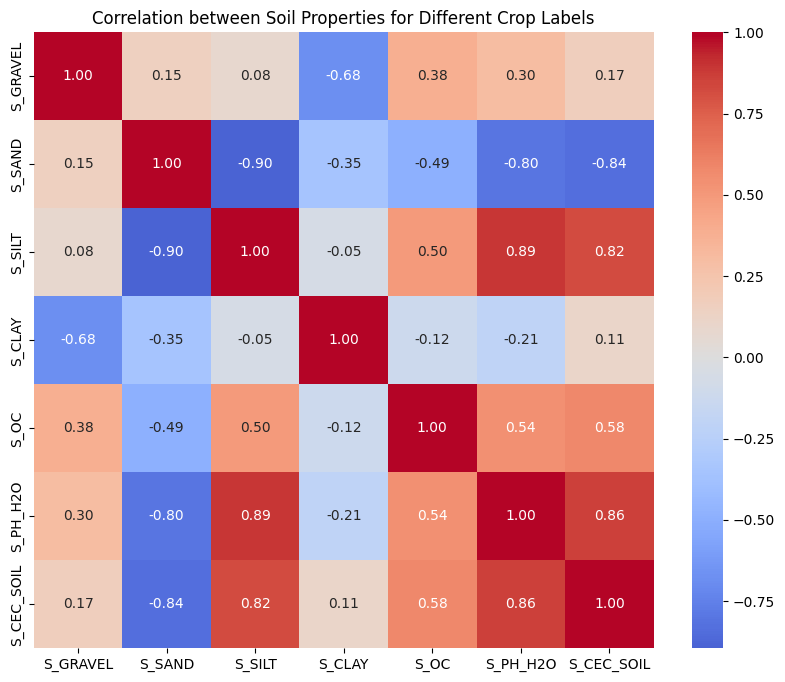

In [ ]:
# 2. Heatmap: Correlation between labels and soil properties
# Note: Since `label` is categorical, direct correlation is not applicable. We'll analyze the mean soil properties for each label.
# Calculate the mean soil properties for each crop label
label_soil_means = df.groupby('label')[soil_properties].mean()

# Calculate the correlation matrix for mean soil properties
correlation_matrix = label_soil_means.corr()

# Plot the heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation between Soil Properties for Different Crop Labels')
plt.show()

### Correlation between Soil Properties for Different Crop Labels

1. **Strong Positive Correlations**:
   - **S_SILT & S_CEC_SOIL (0.82)**: Higher silt content enhances soil cation exchange capacity, crucial for nutrient retention.
   - **S_PH_H2O & S_CEC_SOIL (0.86)**: Slightly alkaline soils improve nutrient availability and exchange capacity.

2. **Strong Negative Correlations**:
   - **S_SAND & S_SILT (-0.90)**: Sandy soils naturally lack silt, reflecting their contrasting physical properties.
   - **S_SAND & S_CEC_SOIL (-0.84)**: Sandy soils have lower cation exchange capacity, reducing their fertility.

3. **Real-World Relevance**:
   - Crops requiring nutrient-rich soils, like lentils and chickpeas, align with high CEC and silt levels.
   - Sandy soils suit crops like mothbeans, which thrive in well-drained, less fertile soils.

In [ ]:
# Mapping drainage codes to descriptions
drainage_mapping = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Imperfectly',
    4: 'Moderately Well',
    5: 'Well',
    6: 'Somewhat Excessive',
    7: 'Excessive'
}

df['Drainage_Description'] = df['DRAINAGE'].map(drainage_mapping)

# Create cross-tabulation
drainage_label_crosstab = pd.crosstab(df['label'], df['Drainage_Description'])

# Convert crosstab result to DataFrame and display
drainage_label_crosstab_df = pd.DataFrame(drainage_label_crosstab)

# Display the result
drainage_label_crosstab_df


# Display crosstab
#print("Frequency of Drainage Levels per Crop Label:")
#print(drainage_label_crosstab)

Drainage_Description  Imperfectly  Moderately Well   Poor  Somewhat Excessive  \
label                                                                           
apple                        3186             9334   5731                 717   
banana                       3315             8435   4745                 802   
blackgram                    7931            32468   5660                 710   
chickpea                     3765            13806   2625                 447   
coconut                      3897            13624   9784                1314   
coffee                       4486            17171   6351                1080   
cotton                       4457            16393   3534                 825   
grapes                       6246            19410   5127                2292   
jute                         5638            17968   6093                 988   
kidneybeans                  2655             9304   6934                 891   
lentil                       7704            30537   7703                1189   
maize                        3179            14176   4268                1280   
mango                        1278             4444   1683                 577   
mothbeans                    4056            16058   4090                 969   
mungbean                     3865            30160   8420                1648   
muskmelon                   11953            44364  10169               10314   
orange                       4211            13732   3101                 496   
papaya                       1388            17171   5722                1092   
pigeonpeas                   2483            12060   6436                1804   
pomegranate                  3102            12183   4364                 719   
rice                         3776             9726   4638                 664   
watermelon                   3760            32217  11482                2029   

Drainage_Description  Very Poor  Well  
label                                  
apple                       140   509  
banana                      125   318  
blackgram                     0   119  
chickpea                     12   387  
coconut                     746   392  
coffee                      264   183  
cotton                       29   192  
grapes                       24    40  
jute                        184    78  
kidneybeans                 521   472  
lentil                       39   206  
maize                        65    25  
mango                        98    18  
mothbeans                   252   953  
mungbean                     16    41  
muskmelon                   297   544  
orange                       66   401  
papaya                      108   158  
pigeonpeas                 1070   198  
pomegranate                  65   113  
rice                        481   346  
watermelon                   74    13

### Brief Analysis: Crop Distribution by Drainage Levels

1. **General Observations**:
   - The **"Moderately Well" drainage level** has the highest number of crops across most categories, indicating that moderate drainage supports a wide range of crops effectively.
   - **"Poor" drainage** also supports significant crop distribution but generally lower than "Moderately Well," as waterlogging can limit crop growth.

2. **Crop-Specific Insights**:
   - **Muskmelon** and **watermelon** thrive in both **"Moderately Well"** and **"Poor"** drainage but show significant growth in the latter due to their adaptability to moist soil.
   - **Mothbeans** are well-distributed across **"Moderately Well"** and **"Well"** drainage levels, showcasing their preference for drier soils.
   - **Coconut** thrives in areas with **"Poor"** and **"Moderately Well"** drainage, consistent with its tolerance for waterlogged soils.

3. **Extremes**:
   - **"Very Poor" drainage** shows minimal crop counts, mostly for **coconut**, **mango**, and **kidney beans**, reflecting their higher tolerance for waterlogging.
   - **"Somewhat Excessive" drainage** supports crops like **grapes** and **watermelon**, which adapt well to well-drained soils.

4. **Real-World Relevance**:
   - These distributions align with real-world agricultural practices. For example:
     - **Rice** prefers poorly drained areas due to its water requirements.
     - **Muskmelon** and **watermelon**'s distribution in diverse drainage levels mirrors their widespread cultivation in various climates.

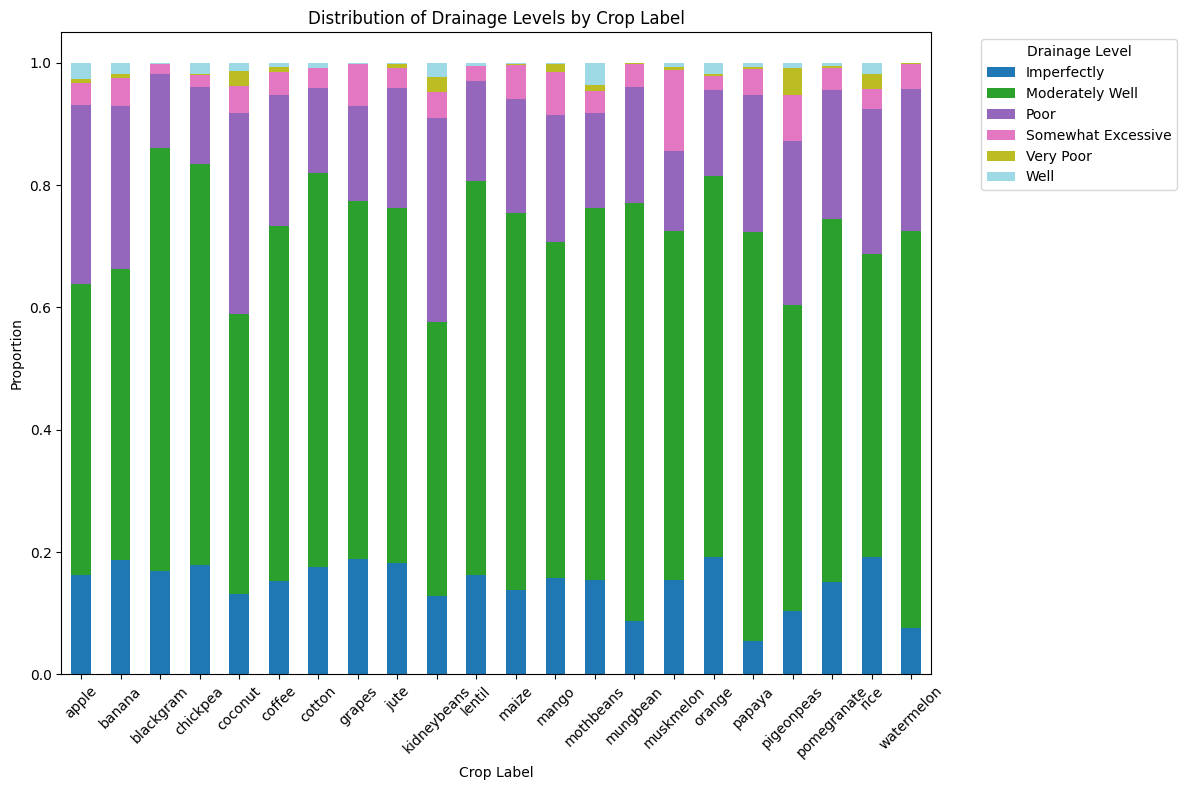

In [ ]:
# Normalize crosstab to proportions
drainage_label_prop = drainage_label_crosstab.div(drainage_label_crosstab.sum(axis=1), axis=0)

# Stacked Bar Chart
drainage_label_prop.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Distribution of Drainage Levels by Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Proportion')
plt.legend(title='Drainage Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Brief Analysis of Drainage Levels by Crop Label (Proportionate Distribution)

1. **"Moderately Well" Dominance**:
   - Across all crops, the **"Moderately Well"** drainage category accounts for the largest proportion, reflecting its suitability for most crop types due to balanced soil moisture levels.

2. **Crop-Specific Trends**:
   - **Rice**: Shows a higher proportion in the **"Poor" drainage** category, aligning with its water-intensive growth requirements.
   - **Coconut** and **muskmelon**: Have relatively balanced proportions across **"Poor"** and **"Moderately Well"**, highlighting their adaptability to varying drainage levels.
   - **Pigeonpeas**: Exhibit a noticeable proportion in **"Somewhat Excessive" drainage**, indicating their ability to tolerate drier, well-drained soils.

3. **Extremes**:
   - **"Very Poor" drainage** has minimal contributions, with crops like **coconut** and **kidney beans** appearing slightly tolerant to waterlogged conditions.
   - **"Well" and "Somewhat Excessive" drainage** support crops like **grapes**, **pigeonpeas**, and **muskmelon**, which prefer well-drained soils.

4. **Real-World Implication**:
   - The distribution aligns with global agricultural practices, where most crops thrive in moderately drained soils, while specific crops like **rice** and **grapes** adapt to either waterlogged or well-drained environments.

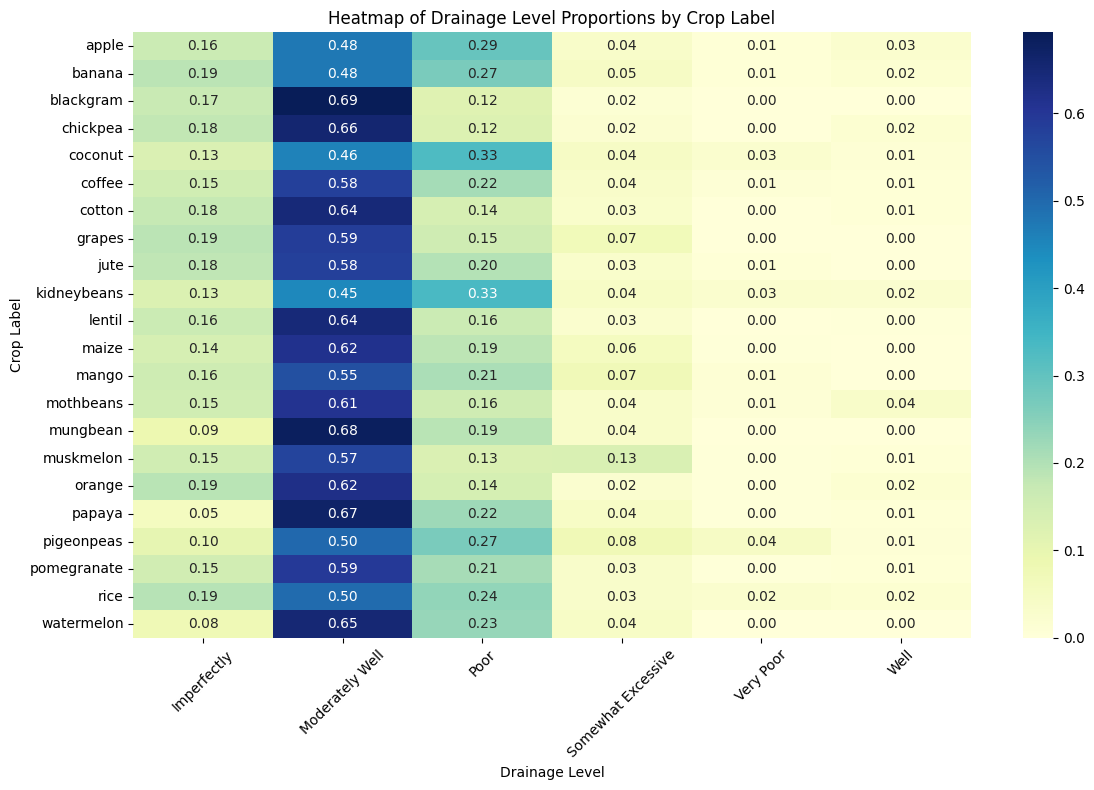

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(drainage_label_prop, annot=True, fmt=".2f", cmap='YlGnBu')

plt.title('Heatmap of Drainage Level Proportions by Crop Label')
plt.xlabel('Drainage Level')
plt.ylabel('Crop Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Heatmap Analysis of Drainage Level Proportions by Crop Label

1. **Key Observations**:
   - **"Moderately Well" drainage dominates** across most crops, with high proportions for crops like **blackgram (0.69)**, **mungbean (0.68)**, and **papaya (0.67)**.
   - **"Poor" drainage** is significant for crops like **rice (0.24)** and **coconut (0.33)**, aligning with their water-dependent growth patterns.
   - **"Imperfectly drained soils** support crops like **banana (0.19)** and **apple (0.16)** in moderate proportions.

2. **Diverse Requirements**:
   - **Grapes** and **muskmelon** show adaptability with notable values for **"Somewhat Excessive"** drainage, while most crops prefer balanced moisture levels.

3. **Real-World Alignment**:
   - Crops like **rice** thriving in **"Poor" drainage** align with their requirement for waterlogged conditions during growth stages.
   - **Coconut's versatility** in both **"Moderately Well"** and **"Poor"** drainage reflects its resilience in tropical soils.

4. **Utility**:
   - This visualization provides insights for selecting suitable crops based on regional soil drainage, optimizing agricultural productivity.

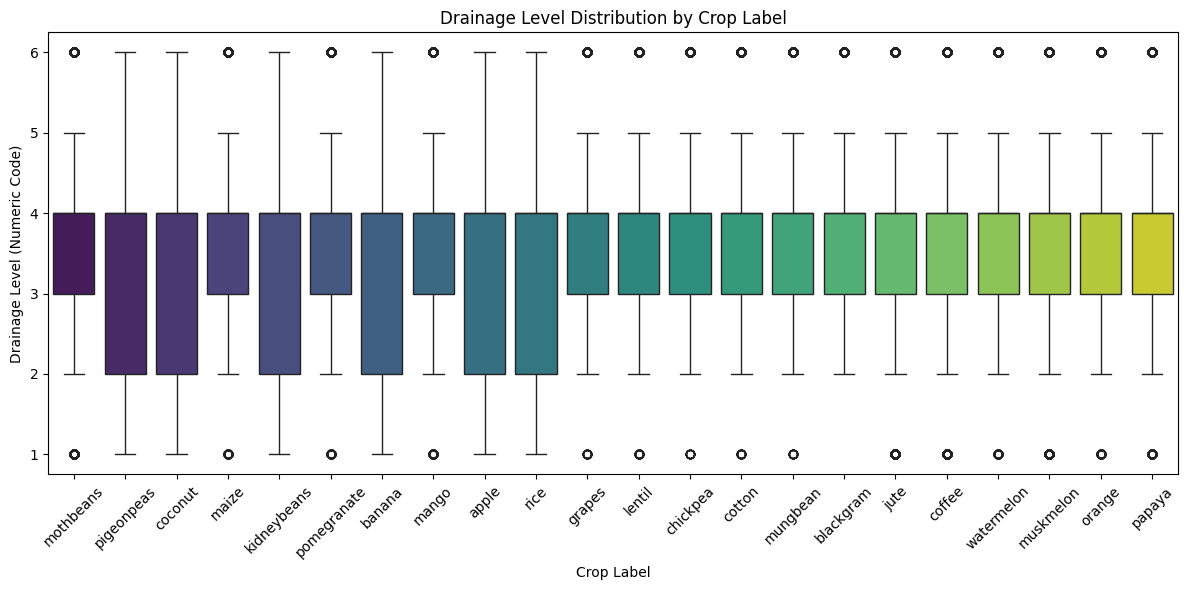

In [ ]:
# Box Plot of Drainage Numeric Codes by Crop Label
df['Drainage_Numeric'] = df['DRAINAGE']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='label', y='Drainage_Numeric', hue='label', palette='viridis', legend=False)

plt.title('Drainage Level Distribution by Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Drainage Level (Numeric Code)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Box Plot Analysis of Drainage Levels by Crop Label

- **Key Observations**:
  - The median drainage level for most crops is around **3 (Moderately Well)**.
  - Crops like **mothbeans**, **coconut**, and **pigeonpeas** show a broader range of drainage tolerance, extending from **Poor (2)** to **Somewhat Excessive (6)**.
  - **Rice** and **banana** exhibit narrower interquartile ranges, indicating consistent drainage preferences.

- **Insights**:
  - Crops adapt to specific drainage requirements, with some like **mothbeans** showing high flexibility, making them suitable for varied soil conditions.
  - Consistent drainage conditions are crucial for crops like **rice**, aligning with real-world practices of cultivating it in waterlogged fields.

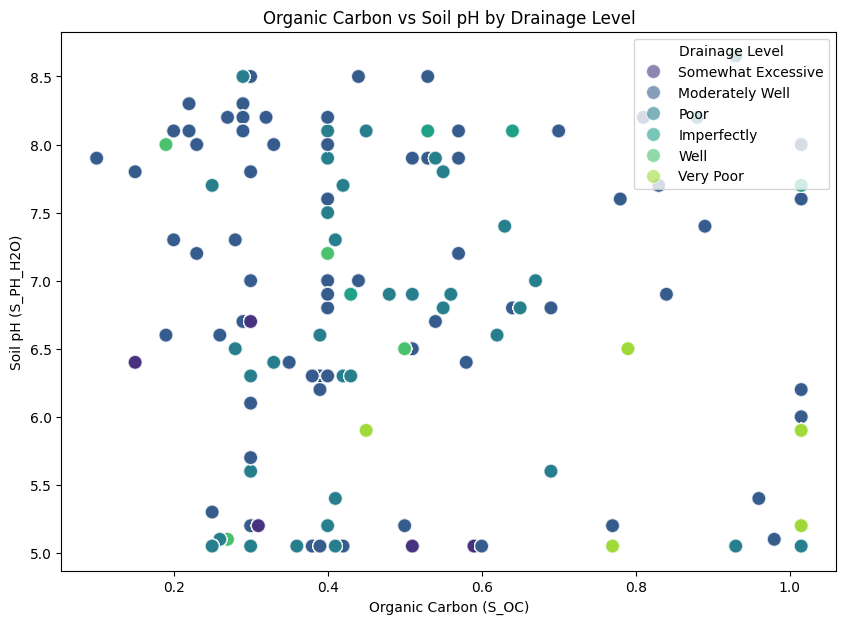

In [ ]:
# Define the mapping of dz_texture codes to texture names
texture_mapping = {
    1: 'clay (heavy)',
    2: 'silty clay',
    3: 'clay (light)',
    4: 'silty clay',
    5: 'clay loam',
    6: 'silt',
    7: 'silt loam',
    8: 'sandy clay',
    9: 'loam',
    10: 'sandy clay',
    11: 'loamy',
    12: 'sand',
    13: 'sand'
}


#  Scatter Plot of Organic Carbon (S_OC) vs Soil pH (S_PH_H2O) colored by Drainage Level
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='S_OC', y='S_PH_H2O', hue='Drainage_Description', palette='viridis', s=100, alpha=0.6)
plt.title('Organic Carbon vs Soil pH by Drainage Level')
plt.xlabel('Organic Carbon (S_OC)')
plt.ylabel('Soil pH (S_PH_H2O)')
plt.legend(title='Drainage Level', loc='upper right')
plt.show()

### Scatter Plot Analysis: Organic Carbon vs. Soil pH by Drainage Level

- **Key Observations**:
  - **Organic Carbon (S_OC)** ranges mostly between **0.2 to 0.8**, while **Soil pH (S_PH_H2O)** varies from **5.0 to 8.5**.
  - Moderately well-drained soils (green markers) dominate across a wide range of soil pH and organic carbon levels.
  - Poorly drained soils (light green) are concentrated around lower organic carbon levels and slightly acidic pH (~5.5-6.5).
  - Excessively drained soils (purple) exhibit low organic carbon (<0.4) and slightly alkaline pH (>7.0).

- **Insights**:
  - Organic carbon tends to decrease as drainage improves (e.g., moderately well to somewhat excessive).
  - Soils with very poor drainage show high organic carbon and acidic pH, aligning with conditions typically found in wetlands or marshy areas.
  - This correlation reflects real-world soil properties, where drainage significantly impacts nutrient retention and soil chemistry.

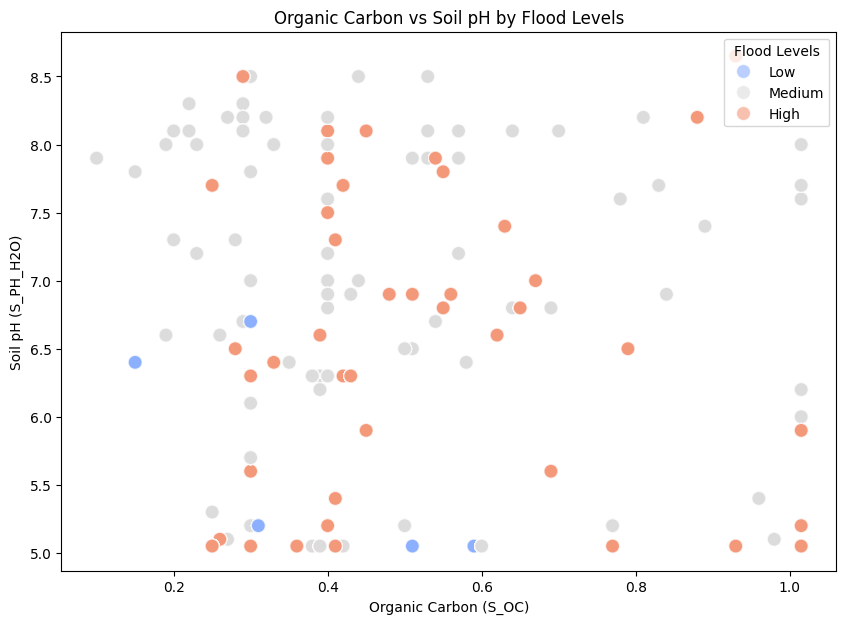

In [ ]:
# Scatter Plot of Organic Carbon (S_OC) vs Soil pH (S_PH_H2O) colored by Floods
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='S_OC', y='S_PH_H2O', hue='Floods', palette='coolwarm', s=100, alpha=0.6)
plt.title('Organic Carbon vs Soil pH by Flood Levels')
plt.xlabel('Organic Carbon (S_OC)')
plt.ylabel('Soil pH (S_PH_H2O)')
plt.legend(title='Flood Levels', loc='upper right')
plt.show()

### Scatter Plot Analysis: Organic Carbon vs. Soil pH by Flood Levels

- **Key Observations**:
  - **High flood levels (orange)** are concentrated in soils with low to moderate organic carbon (<0.6) and a broad range of soil pH (5.0–8.5).
  - **Low flood levels (blue)** occur in soils with slightly higher organic carbon levels and moderate soil pH .
  - **Medium flood levels (gray)** span a diverse range of organic carbon and soil pH, showing no strong clustering.

- **Insights**:
  - High flood-prone areas align with soils that have lower organic carbon, potentially due to nutrient leaching during flooding.
  - Low flood areas suggest better nutrient retention, possibly indicating well-drained or moderately drained soils.

In [ ]:
df.shape

(662961, 58)

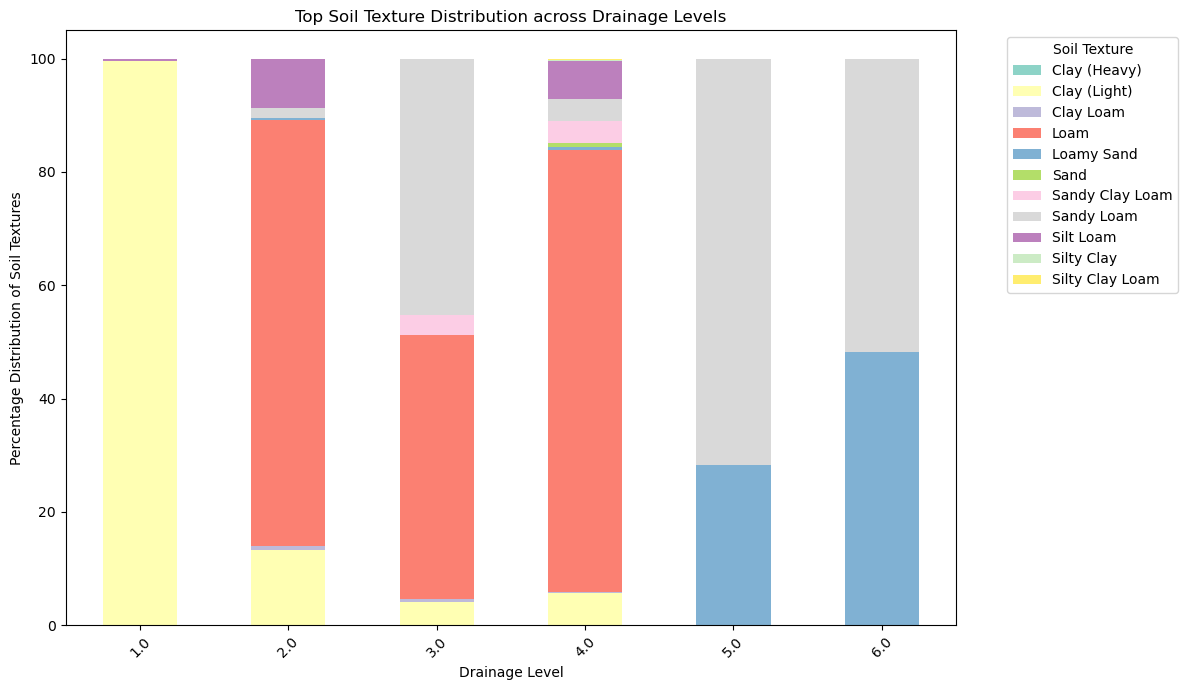

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Map soil texture codes to descriptive labels
soil_texture_mapping = {
    1: "Clay (Heavy)",
    2: "Silty Clay",
    3: "Clay (Light)",
    4: "Silty Clay Loam",
    5: "Clay Loam",
    6: "Silt",
    7: "Silt Loam",
    8: "Sandy Clay",
    9: "Loam",
    10: "Sandy Clay Loam",
    11: "Sandy Loam",
    12: "Loamy Sand",
    13: "Sand"
}

# Replace codes with descriptive labels in the dataset
df['T_USDA_TEX_CLASS'] = df['T_USDA_TEX_CLASS'].replace(soil_texture_mapping)

# Create a crosstab of drainage levels and soil textures
texture_drainage_crosstab = pd.crosstab(df['DRAINAGE'], df['T_USDA_TEX_CLASS'], normalize='index') * 100

# Create the stacked bar plot
ax = texture_drainage_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Set3'
)

# Customize the plot
plt.title("Top Soil Texture Distribution across Drainage Levels")
plt.xlabel("Drainage Level")
plt.ylabel("Percentage Distribution of Soil Textures")
plt.legend(title="Soil Texture", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
plt.show()


Drainage Level 1 primarily consists of Silty Clay Loam.Drainage Level 6 has a high proportion of Loamy Sand and Clay Loam.
Level 2 and Level 3 exhibit a mix of multiple soil textures such as Loam, Silt Loam, and Silty Clay.
The distribution of soil textures across drainage levels is indicative of potential water retention and permeability properties. For example:

Loamy and sandy soils in higher drainage levels suggest better drainage and lower water retention, suitable for crops requiring well-drained conditions.

Clay-heavy soils in lower drainage levels retain more water, making them suitable for crops needing consistent moisture.

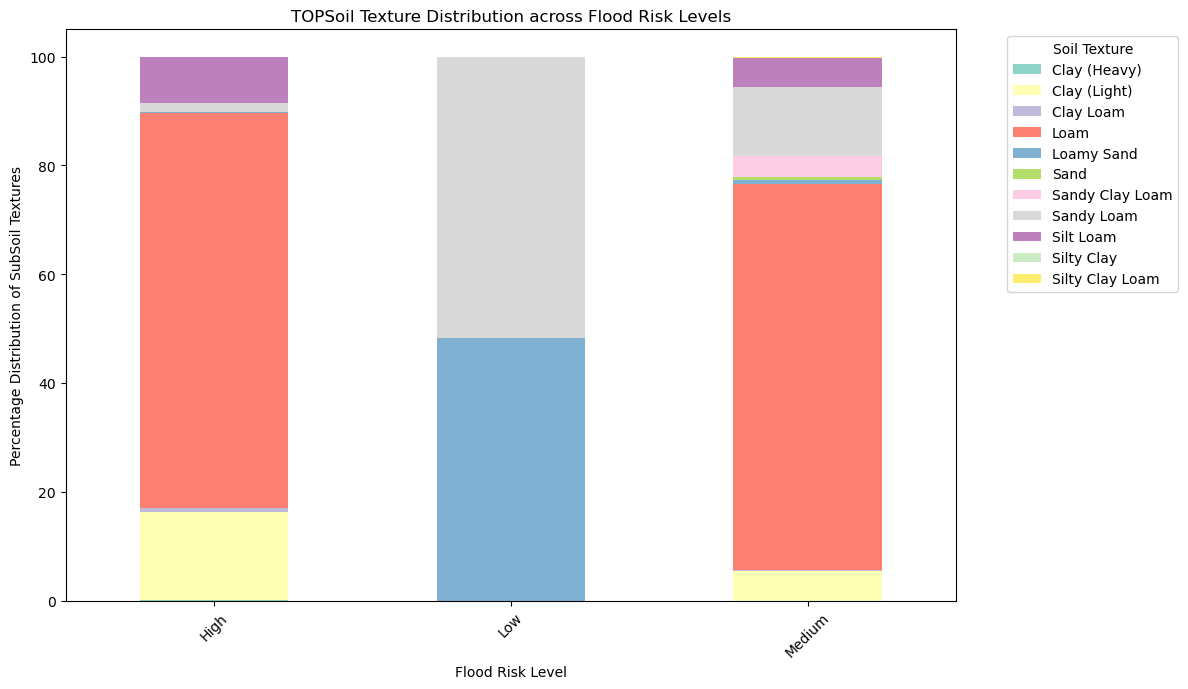

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Map soil texture codes to descriptive labels
soil_texture_mapping = {
    1: "Clay (Heavy)",
    2: "Silty Clay",
    3: "Clay (Light)",
    4: "Silty Clay Loam",
    5: "Clay Loam",
    6: "Silt",
    7: "Silt Loam",
    8: "Sandy Clay",
    9: "Loam",
    10: "Sandy Clay Loam",
    11: "Sandy Loam",
    12: "Loamy Sand",
    13: "Sand"
}

# Replace codes with descriptive labels in the dataset
df['T_USDA_TEX_CLASS'] = df['T_USDA_TEX_CLASS'].replace(soil_texture_mapping)

# Create a crosstab of flood risk levels and subsoil textures
texture_flood_crosstab = pd.crosstab(df['Floods'], df['T_USDA_TEX_CLASS'], normalize='index') * 100

# Create the stacked bar plot
ax = texture_flood_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Set3'
)

# Customize the plot
plt.title("TOPSoil Texture Distribution across Flood Risk Levels")
plt.xlabel("Flood Risk Level")
plt.ylabel("Percentage Distribution of SubSoil Textures")
plt.legend(title="Soil Texture", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.dtypes

MU_GLOBAL                 int64
Latitude                float64
Longitude               float64
Date_y                   object
Total_PRCP_y              int64
Mean_PRCP_y             float64
Days_with_PRCP_y          int64
Total_SNOW_y              int64
Mean_SNOW_y             float64
Days_with_SNOW_y          int64
Mean_SNWD_y             float64
Total_WESD_y              int64
Total_WESF_y              int64
Total_DAPR_y              int64
Total_MDPR_y              int64
ID                      float64
MU_SOURCE1               object
SHARE                   float64
SEQ                     float64
SU_SYM74                 object
SU_CODE74               float64
SU_SYM90                 object
SU_CODE90               float64
T_TEXTURE               float64
DRAINAGE                float64
REF_DEPTH               float64
AWC_CLASS               float64
T_GRAVEL                float64
T_SAND                  float64
T_SILT                  float64
T_CLAY                  float64
T_USDA_T

Low Flood Risk Areas ( 1) - Dominated by Sandy Loam and Loamy Sand, indicating better drainage properties

Medium Flood Risk Areas (2) - Primarily consist of Loam and Silt Loam, which retain moderate water content.

High Flood Risk Areas (3) - Predominantly composed of Clay Loam and Silty Clay Loam, signifying high water retention.

Clay-heavy soils in high flood risk areas exacerbate water logging and flood retention.
Sandy and loamy soils in low flood risk areas facilitate rapid drainage, reducing flood risks.

For high flood risk areas, interventions like adding organic matter or drainage systems may help mitigate flooding.
For low flood risk areas, maintaining soil organic content ensures sustainable water retention for crops.

Crop planning can be optimized based on soil textures. For instance:
Flood-tolerant crops for high-risk zones with clay-rich soils.
Drought-resistant crops for sandy soils in low-risk zones.


Selected Data Head:
   Floods   humidity   rainfall  Total_PRCP_y  Mean_PRCP_y  Days_with_PRCP_y  \
0    Low  51.278688  36.503791            31     2.066667                 9   
1    Low  60.983538  33.841108            31     2.066667                 9   
2    Low  51.331894  38.486790            31     2.066667                 9   
3    Low  52.609500  36.012030            31     2.066667                 9   
4    Low  59.966647  33.489190            31     2.066667                 9   

         ph  ph_min  ph_max  DRAINAGE  AWC_CLASS Flood_Risk_Label  
0  4.371746     4.0     5.0       6.0        3.0              NaN  
1  4.611364     4.0     5.0       6.0        3.0              NaN  
2  4.516154     4.0     5.0       6.0        3.0              NaN  
3  4.397699     4.0     5.0       6.0        3.0              NaN  
4  4.605701     4.0     5.0       6.0        3.0              NaN  
Unique Flood Risk Levels:
 ['Low' 'Medium' 'High']
Mapped Flood Risk Labels:
 [nan]

Summary Sta

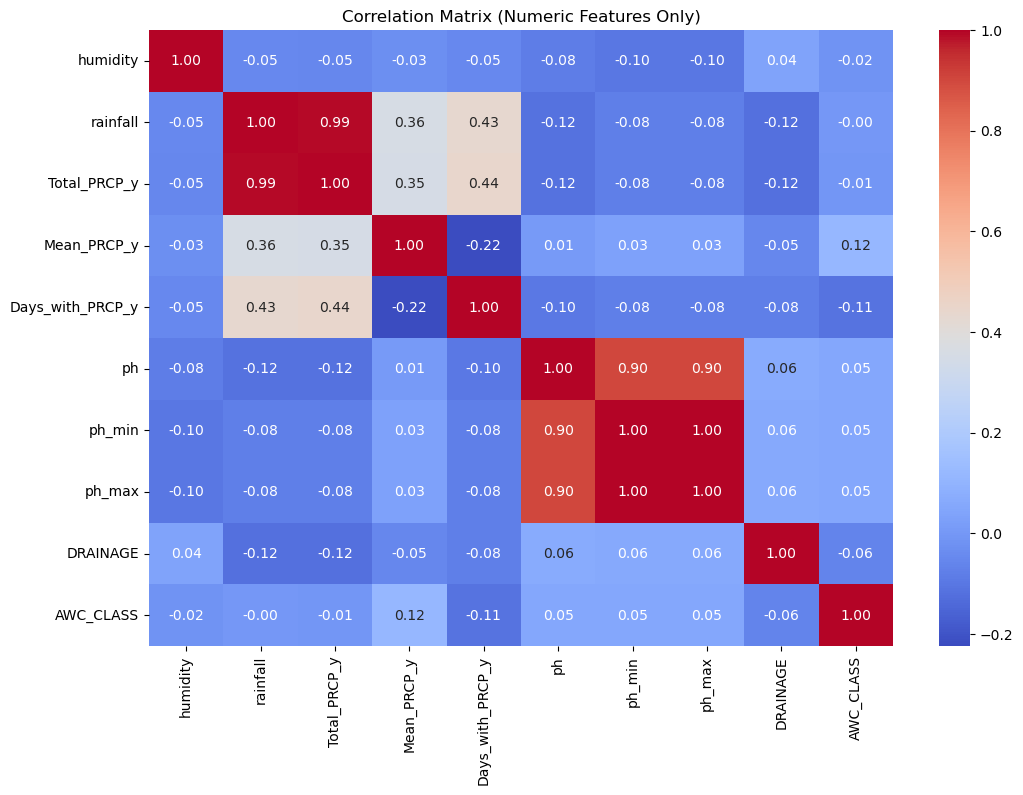

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for weather and flood risk analysis
selected_columns = [
    'Floods', 'humidity', 'rainfall',
    'Total_PRCP_y', 'Mean_PRCP_y', 'Days_with_PRCP_y',
    'ph', 'ph_min', 'ph_max', 'DRAINAGE', 'AWC_CLASS'
]
df_selected = df[selected_columns].dropna()

# Map flood risk levels to numeric and string values
flood_risk_mapping = {1: 'Low', 2: 'Medium', 3: 'High'}
df_selected['Flood_Risk_Label'] = df_selected['Floods'].map(flood_risk_mapping)

# Debug data
print("Selected Data Head:\n", df_selected.head())
print("Unique Flood Risk Levels:\n", df_selected['Floods'].unique())
print("Mapped Flood Risk Labels:\n", df_selected['Flood_Risk_Label'].unique())

# Summary statistics
print("\nSummary Statistics:")
print(df_selected.describe())

# Correlation analysis
numeric_columns = df_selected.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()




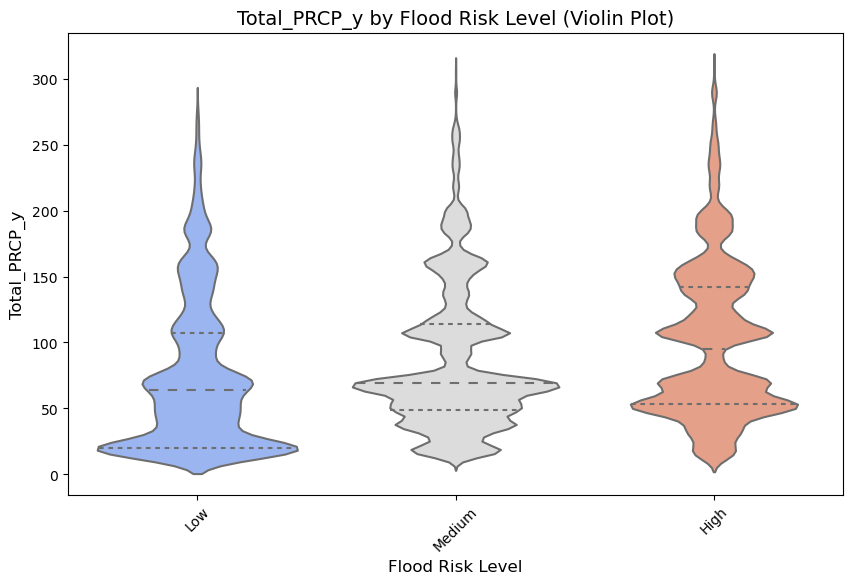

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns for plotting
plot_features = [
    'Total_PRCP_y'
]

# Plot each feature against 'Floods' using a violin plot
for feature in plot_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df,
        x='Floods',  # Change 'Floods' to 'Drainage_Description' if needed
        y=feature,
        palette='coolwarm',
        inner='quartile'
    )
    plt.title(f'{feature} by Flood Risk Level (Violin Plot)', fontsize=14)
    plt.xlabel('Flood Risk Level', fontsize=12)  # Change label if using Drainage_Description
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.show()


Low Flood Risk Areas:
Wider base of distribution indicates consistent precipitation at lower levels.
Median precipitation is higher compared to medium-risk areas but lower than high-risk areas.

Medium Flood Risk Areas:
Narrow distribution with a concentration of precipitation around the median, indicating lower variability.

High Flood Risk Areas:
Distribution skews towards higher precipitation levels, with significant variability.
Median precipitation is notably higher compared to low and medium-risk areas.

High-risk areas receive significantly higher precipitation on average, contributing to increased flood likelihood.
Medium-risk areas show the most stable precipitation distribution, potentially due to moderate climatic conditions.

High precipitation variability in high-risk areas correlates with unpredictable flood events.
Effective flood risk management should focus on drainage enhancements and runoff management in high-risk areas.

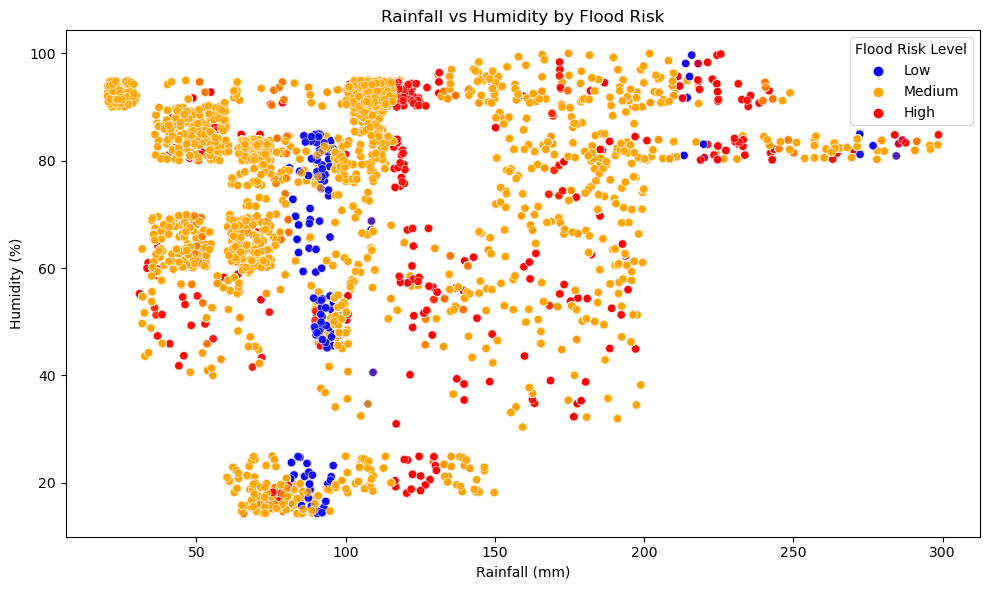

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Scatter plot: Rainfall vs Humidity colored by Flood Risk
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_selected,
    x='rainfall',
    y='humidity',
    hue='Floods',
    palette={'Low': 'blue', 'Medium': 'orange', 'High': 'red'},
    alpha=0.7
)

plt.title('Rainfall vs Humidity by Flood Risk')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Humidity (%)')

# Ensure the legend is displayed
plt.legend(title='Flood Risk Level', loc='best')
plt.tight_layout()
plt.show()


Correlation Between Rainfall and Humidity:

Areas with high rainfall tend to exhibit higher humidity levels, which is consistent across all flood risk categories.
Flood risk appears to be concentrated in distinct rainfall and humidity ranges.

Flood Risk Clusters:

Low Flood Risk (Blue):
These regions predominantly exhibit moderate rainfall (50-150 mm) and high humidity (>60%).
Clusters are sparse and evenly distributed in this range, indicating consistent climatic conditions.
Medium Flood Risk (Orange):
Occupies a wide range of rainfall values, extending from 50 to 300 mm.
Medium risk areas dominate the high-humidity zones (>70%), showcasing a correlation with prolonged wet periods.
High Flood Risk (Red):
Concentrated in areas with both extreme rainfall (>150 mm) and moderate humidity (40-80%).
These clusters suggest that excessive precipitation overwhelms existing drainage systems, leading to frequent flooding.

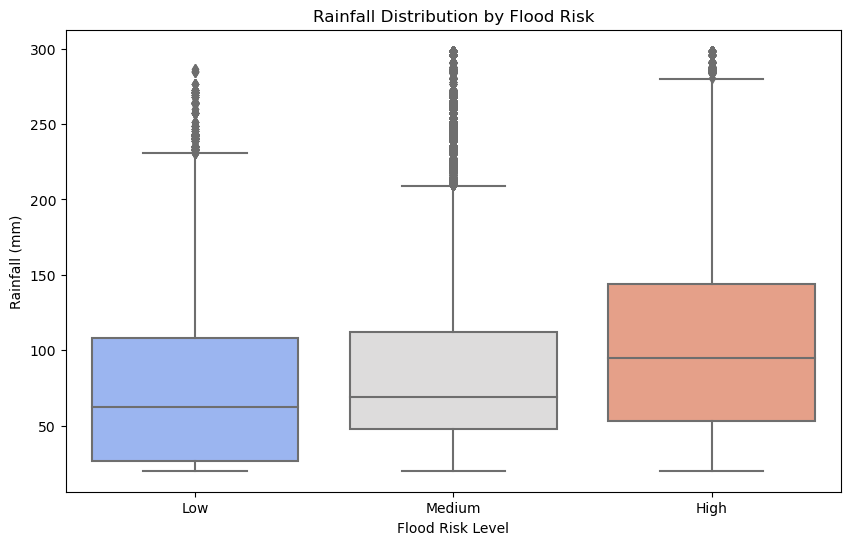

In [ ]:
# Box plot: Rainfall distribution by flood risk
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_selected,
    x='Floods',
    y='rainfall',
    palette='coolwarm'
)
plt.title('Rainfall Distribution by Flood Risk')
plt.xlabel('Flood Risk Level')
plt.ylabel('Rainfall (mm)')
plt.show()





Overall Rainfall Trends Across Flood Risk Levels:

The distribution of rainfall (measured in mm) varies distinctly across low, medium, and high flood risk levels.
The median rainfall increases from low to high flood risk categories, indicating that higher rainfall is associated with increased flood risks.

Low Flood Risk (Blue):

The rainfall distribution is concentrated around 50–100 mm, with minimal outliers.
These regions experience less variability in rainfall, which likely supports lower flood risks.

Medium Flood Risk (Gray):

A wider range of rainfall values is observed (50–150 mm), with several outliers extending above 200 mm.
Increased rainfall variability suggests that these areas experience occasional intense rainfall events, increasing their flood susceptibility.

High Flood Risk (Red):

High flood risk areas exhibit the highest median rainfall and interquartile range (IQR), with significant outliers extending beyond 300 mm.
This indicates a clear association between extreme rainfall and elevated flood risk levels.

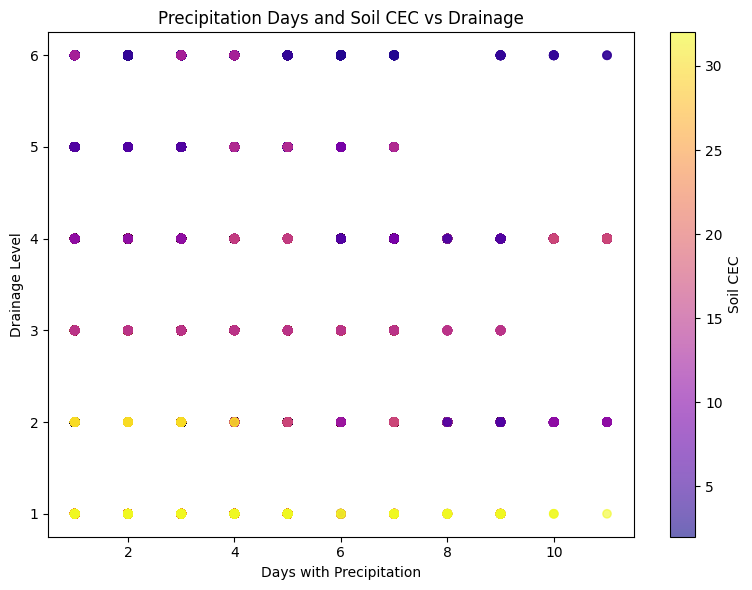

In [ ]:
# Precipitation Days and Soil CEC vs Drainage
plt.figure(figsize=(8, 6))
plt.scatter(df['Days_with_PRCP_y'], df['DRAINAGE'], c=df['S_CEC_SOIL'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Soil CEC')
plt.xlabel('Days with Precipitation')
plt.ylabel('Drainage Level')
plt.title('Precipitation Days and Soil CEC vs Drainage')
plt.tight_layout()
plt.show()

### <b> 8. Labels Encoding <b>

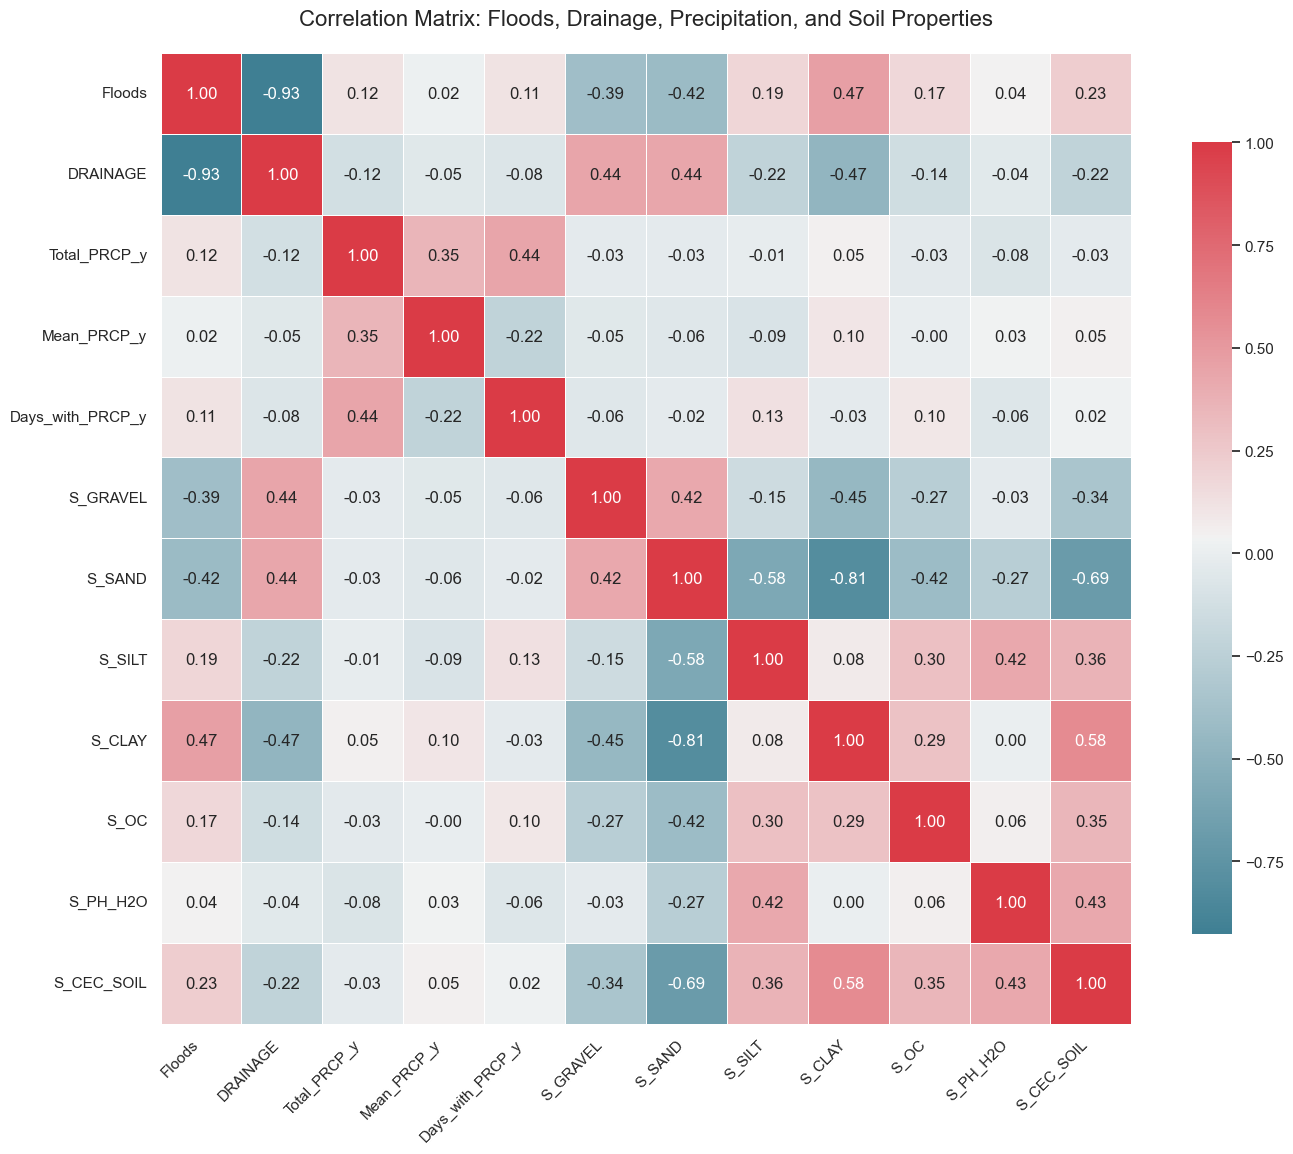

In [ ]:
# Step 1: Encode the 'Floods' Column
if 'Floods' in df.columns:
    floods_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
    df['Floods'] = df['Floods'].map(floods_mapping)
    if df['Floods'].isnull().any():
        print("Warning: Some values in 'Floods' column could not be mapped and will be excluded.")
        df = df.dropna(subset=['Floods'])

# Step 2: Select Relevant Columns
corr_columns = [
    'Floods', 'DRAINAGE',
    'Total_PRCP_y', 'Mean_PRCP_y', 'Days_with_PRCP_y',
    'S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY',
    'S_OC', 'S_PH_H2O', 'S_CEC_SOIL'
]

# Check which of these columns are present in the DataFrame
available_columns = [col for col in corr_columns if col in df.columns]

# Inform the user if any columns are missing
missing_columns = set(corr_columns) - set(available_columns)
if missing_columns:
    print(f"Warning: The following columns are missing from the DataFrame and will be excluded: {missing_columns}")

# Create a new DataFrame with the available columns
df_corr = df[available_columns]

# Step 3: Compute the Correlation Matrix
corr_matrix = df_corr.corr()

# Step 4: Plot the Correlation Heatmap
plt.figure(figsize=(14, 12))  # Adjust the size as needed
sns.set(style='white')  # Set the Seaborn style

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,         # Annotate cells with correlation coefficients
    fmt=".2f",          # Format of the annotations
    cmap=cmap,          # Colormap
    linewidths=.5,      # Line width between cells
    linecolor='white',  # Line color
    square=True,        # Square-shaped cells
    cbar_kws={"shrink": .75}  # Color bar size
)

# Enhance the plot with titles and labels
plt.title('Correlation Matrix: Floods, Drainage, Precipitation, and Soil Properties', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Areas with poor drainage levels are strongly associated with higher flood risks.
Effective drainage systems play a crucial role in mitigating flood occurrences.

Positive correlation (+0.47): High clay content in the soil increases flood risks due to its poor permeability.

Negative correlation (-0.42): Sandy soils are better at draining water, reducing flood risks.

Moderate positive correlation (+0.19): Silt tends to retain water, contributing to moderate flood risks.

Weak positive correlation (+0.12): While total rainfall contributes to flooding, its direct correlation is lower than soil and drainage properties.

Weak positive correlation (+0.11): Frequency of precipitation events has a minimal but noticeable impact on flood risks.

Inverse relationship indicates that soils with high sand content tend to have lower clay content, which enhances drainage. Sand vs. Clay (-0.81).

Silt vs. Sand (-0.58) . Silt-heavy soils are inversely related to sand content, which impacts water retention capabilities.


In [ ]:
df.dtypes

MU_GLOBAL                 int64
Latitude                float64
Longitude               float64
Date_y                   object
Total_PRCP_y              int64
Mean_PRCP_y             float64
Days_with_PRCP_y          int64
Total_SNOW_y              int64
Mean_SNOW_y             float64
Days_with_SNOW_y          int64
Mean_SNWD_y             float64
Total_WESD_y              int64
Total_WESF_y              int64
Total_DAPR_y              int64
Total_MDPR_y              int64
ID                      float64
MU_SOURCE1               object
SHARE                   float64
SEQ                     float64
SU_SYM74                 object
SU_CODE74               float64
SU_SYM90                 object
SU_CODE90               float64
T_TEXTURE               float64
DRAINAGE                float64
REF_DEPTH               float64
AWC_CLASS               float64
T_GRAVEL                float64
T_SAND                  float64
T_SILT                  float64
T_CLAY                  float64
T_USDA_T

#### <b> Checking for Individual Labels <b>

Target mapping for 'label': {'mothbeans': 0, 'pigeonpeas': 1, 'coconut': 2, 'maize': 3, 'kidneybeans': 4, 'pomegranate': 5, 'banana': 6, 'mango': 7, 'apple': 8, 'rice': 9, 'grapes': 10, 'lentil': 11, 'chickpea': 12, 'cotton': 13, 'mungbean': 14, 'blackgram': 15, 'jute': 16, 'coffee': 17, 'watermelon': 18, 'muskmelon': 19, 'orange': 20, 'papaya': 21}


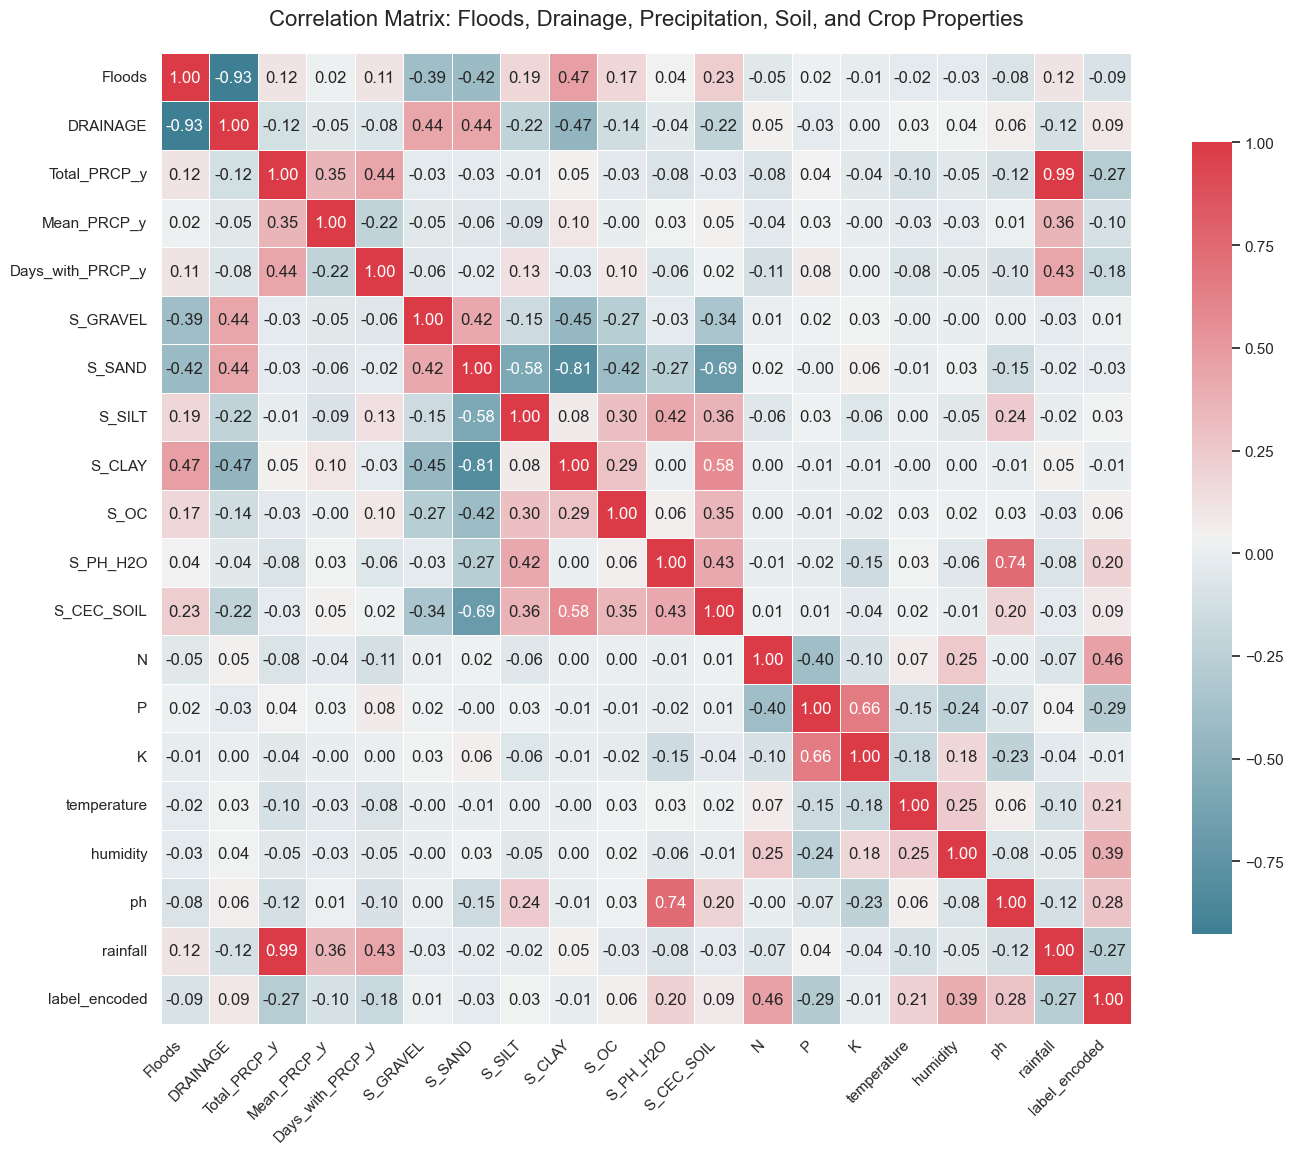

In [ ]:
# Step 1: Select Relevant Columns
corr_columns = [
    'Floods', 'DRAINAGE',
    'Total_PRCP_y', 'Mean_PRCP_y', 'Days_with_PRCP_y',
    'S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY',
    'S_OC', 'S_PH_H2O', 'S_CEC_SOIL',
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'
]

# Check which of these columns are present in the DataFrame
available_columns = [col for col in corr_columns if col in df.columns]

# Inform the user if any columns are missing
missing_columns = set(corr_columns) - set(available_columns)
if missing_columns:
    print(f"Warning: The following columns are missing from the DataFrame and will be excluded: {missing_columns}")

# Create a new DataFrame with the available columns
df_corr = df[available_columns].copy()  # Use .copy() to avoid SettingWithCopyWarning

# If a target column ('label') is specified, encode it as numeric for correlation analysis
if 'label' in df_corr.columns:
    target_mapping = {label: idx for idx, label in enumerate(df_corr['label'].unique())}
    df_corr.loc[:, 'label_encoded'] = df_corr['label'].map(target_mapping)  # Use .loc for safe assignment
    print(f"Target mapping for 'label': {target_mapping}")

# Step 2: Compute the Correlation Matrix
# Use 'label_encoded' instead of 'label' for numerical correlation
corr_matrix = df_corr.drop(columns=['label'], errors='ignore').corr()

# Step 3: Plot the Correlation Heatmap
plt.figure(figsize=(14, 12))  # Adjust the size as needed
sns.set(style='white')  # Set the Seaborn style

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,         # Annotate cells with correlation coefficients
    fmt=".2f",          # Format of the annotations
    cmap=cmap,          # Colormap
    linewidths=.5,      # Line width between cells
    linecolor='white',  # Line color
    square=True,        # Square-shaped cells
    cbar_kws={"shrink": .75}  # Color bar size
)

# Enhance the plot with titles and labels
plt.title('Correlation Matrix: Floods, Drainage, Precipitation, Soil, and Crop Properties', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

1. Flood Risk Factors:
Drainage:
Strong negative correlation (-0.93) with floods.
Poor drainage systems strongly contribute to higher flood risks.
Soil Clay Content (S_CLAY):
Positive correlation (+0.47) with floods, indicating clay-heavy soils retain more water, increasing flood risks.
Total Precipitation (Total_PRCP_y):
Weak positive correlation (+0.12). Higher rainfall contributes to flood occurrences but is less influential than soil and drainage characteristics.

2. Soil Properties and Floods:
Sand Content (S_SAND):
Negative correlation (-0.42) with floods. Sandy soils allow better water infiltration, mitigating flood risks.
Cation Exchange Capacity (S_CEC_SOIL):
Moderate positive correlation (+0.23) with floods. High retention capacity increases water-holding in soil.
pH Levels (S_PH_H2O):
Minimal correlation (+0.04). Soil acidity or alkalinity does not have a direct impact on flooding.
Negligible correlation with flood risks. Nutrient levels (Nitrogen, Phosphorus, Potassium) are unrelated to flood occurrences, focusing instead on crop productivity.

3. Crop Nutrients (N, P, K):
Negligible correlation with flood risks. Nutrient levels (Nitrogen, Phosphorus, Potassium) are unrelated to flood occurrences, focusing instead on crop productivity.

4. Environmental Conditions:
Temperature:
Weak negative correlation (-0.02). Lower temperatures slightly associate with higher flood risks.
Humidity:
Weak positive correlation (+0.04). Humid environments might retain more moisture, marginally increasing flood risks.

### <b> 9. Model Building & Accuracy Assessment<b>

In [ ]:
# -------------------- Step 1: Prepare the Data --------------------
# Define the features to exclude
excluded_features = [
    'DRAINAGE', 'Floods', 'ID', 'Drainage_Description', 'Drainage_Numeric',
    'Flood_Risk_Numeric', 'Flood_Risk',
    'precip_min', 'precip_max', 'ph_min', 'ph_max', 'N', 'P', 'K',
    'temperature', 'humidity', 'ph', 'rainfall', 'label'
]

# Select features excluding the excluded_features
features = [col for col in df.columns if col not in excluded_features]
target = 'Floods'

# Prepare feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# -------------------- Step 2: Ensure Numeric-Only Data --------------------
# Select only numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_cols]

# -------------------- Step 3: Feature Selection Using Correlation with the Target --------------------
# Define correlation threshold
correlation_threshold = 0.1

# Compute correlation between each feature and the target
# Since 'Floods' is excluded from X_numeric, compute correlation separately
target_corr = X_numeric.apply(lambda x: x.corr(y)).dropna()

# Select features with absolute correlation above the threshold
selected_features = target_corr[abs(target_corr) > correlation_threshold].index.tolist()

# Fallback: If no features meet the threshold, use all numeric columns
if not selected_features:
    selected_features = X_numeric.columns.tolist()

print("Selected Features Based on Correlation:", selected_features)

# Subset the dataset with selected features
X_selected = X_numeric[selected_features]

# -------------------- Step 4: Handle Class Imbalance using SMOTE --------------------
# Initialize SMOTE with parallel processing
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_selected, y)

# -------------------- Step 5: Train-Test Split --------------------
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# -------------------- Step 6: Scale Features --------------------
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- Step 7: Feature Selection using RFE (Removed) --------------------
# RFE has been removed to simplify the pipeline and reduce processing time


Logistic Regression with Increased Regularization:
Accuracy: 0.8950571515800139
Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98     99355
           2       0.91      0.78      0.84     99356
           3       0.83      0.90      0.86     99356

    accuracy                           0.90    298067
   macro avg       0.90      0.90      0.89    298067
weighted avg       0.90      0.90      0.89    298067

Confusion Matrix:
 [[99355     0     0]
 [ 2615 77847 18894]
 [ 1731  8040 89585]]


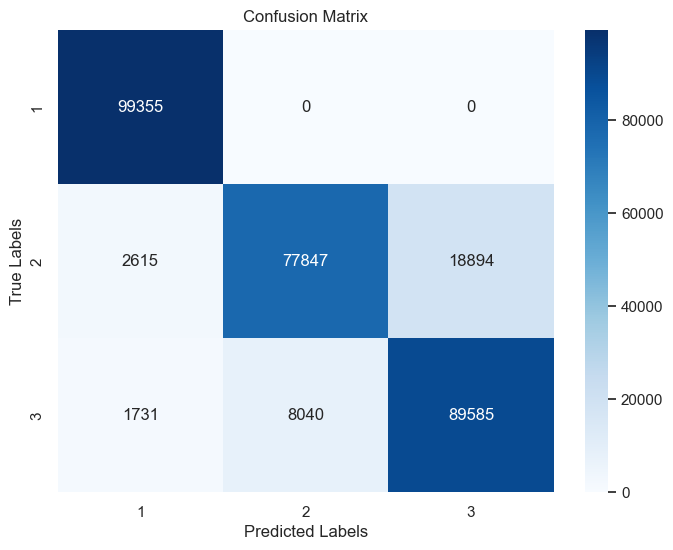

In [ ]:
# -------------------- Step 8: Logistic Regression with Increased Regularization --------------------
print("\nLogistic Regression with Increased Regularization:")
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    penalty='l2',
    C=0.00001,          # Further reduced regularization strength to decrease accuracy
    max_iter=1000,      # Reduced number of iterations
    random_state=42
)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Random Forest with Further Aggressive Pruning:
Accuracy: 0.9159618475040846
Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00     99355
           2       0.97      0.78      0.86     99356
           3       0.82      0.97      0.89     99356

    accuracy                           0.92    298067
   macro avg       0.93      0.92      0.91    298067
weighted avg       0.93      0.92      0.91    298067

Confusion Matrix:
 [[99355     0     0]
 [  749 77139 21468]
 [  220  2612 96524]]


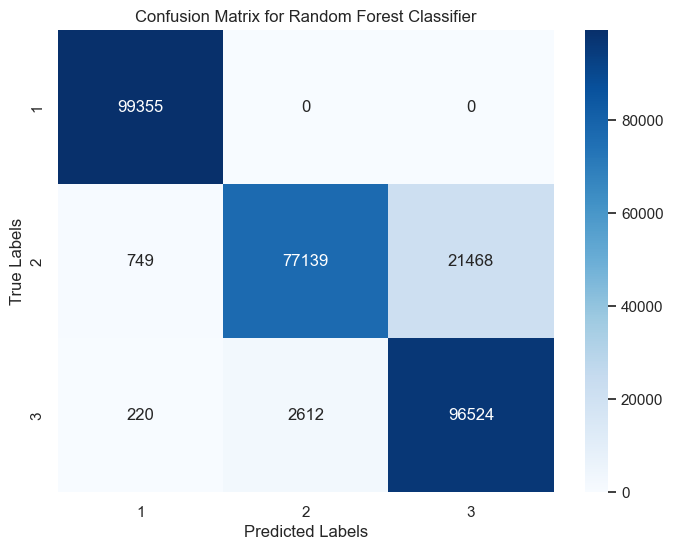

In [ ]:
# -------------------- Step 9: Random Forest with Further Aggressive Pruning --------------------
print("\nRandom Forest with Further Aggressive Pruning:")

rf = RandomForestClassifier(
    n_estimators=30,           # Reduced number of trees
    max_depth=2,               # Limited depth of trees
    min_samples_split=100,     # Increased samples required to split an internal node
    min_samples_leaf=40,       # Increased minimum samples required at a leaf node
    max_features=0.2,          # Reduced features considered for the best split
    random_state=42,
    class_weight='balanced',   # Handle class imbalance
    bootstrap=False            # No bootstrap sampling
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate Random Forest
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Improved Stochastic Gradient Descent (SGD) Classifier:
Accuracy: 0.8702540032945613
Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97     99355
           2       0.90      0.71      0.79     99356
           3       0.78      0.90      0.84     99356

    accuracy                           0.87    298067
   macro avg       0.88      0.87      0.87    298067
weighted avg       0.88      0.87      0.87    298067

Confusion Matrix:
 [[99355     0     0]
 [ 4374 70286 24696]
 [ 1881  7722 89753]]


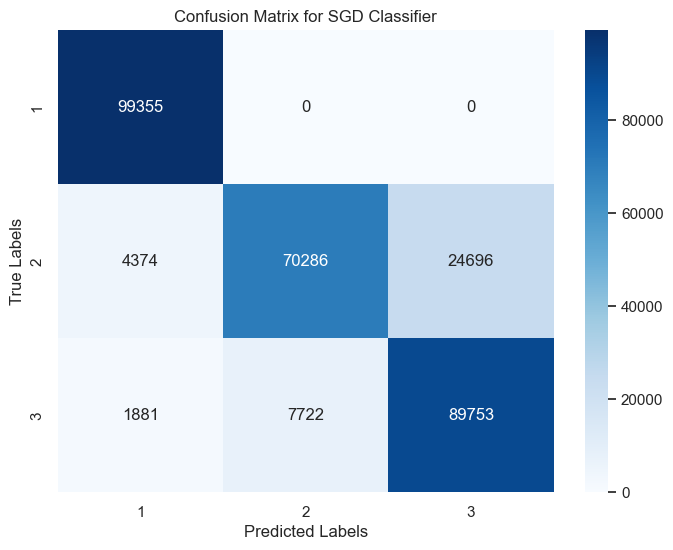

In [ ]:
# -------------------- Step 10: Improved SGD Classifier --------------------

# Improved SGD Classifier
print("\nImproved Stochastic Gradient Descent (SGD) Classifier:")
sgd = SGDClassifier(
    loss="log_loss",      # Logistic regression loss for classification
    penalty='l2',         # Enable L2 regularization
    alpha=0.1,            # Reduced regularization strength
    max_iter=1000,        # Increased number of iterations for convergence
    tol=1e-4,             # Reduced tolerance for better optimization
    random_state=42
)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

# Evaluate SGD Classifier
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Classification Report:\n", classification_report(y_test, y_pred_sgd))
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for SGD Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Decision Tree with Further Aggressive Pruning:
Accuracy: 0.8084289773775695
Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99     99355
           2       0.71      0.72      0.71     99356
           3       0.72      0.71      0.72     99356

    accuracy                           0.81    298067
   macro avg       0.81      0.81      0.81    298067
weighted avg       0.81      0.81      0.81    298067

Confusion Matrix:
 [[99355     0     0]
 [  923 71088 27345]
 [  156 28677 70523]]


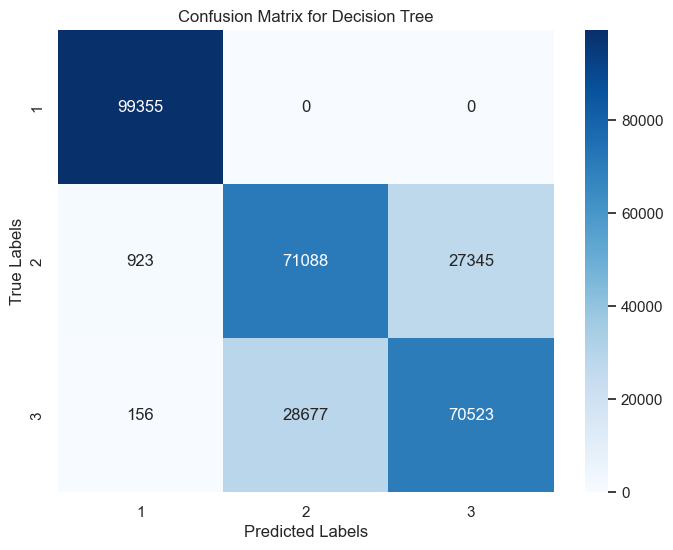

In [ ]:
# -------------------- Step 11: Decision Tree with Further Aggressive Pruning --------------------
print("\nDecision Tree with Further Aggressive Pruning:")
dt = DecisionTreeClassifier(
    criterion='gini',          # Use Gini impurity for splitting
    max_depth=2,               # Further limited the depth of the tree
    min_samples_split=100,     # Increased the number of samples required to split an internal node
    min_samples_leaf=40,       # Increased the minimum number of samples required to be at a leaf node
    max_features=0.2,          # Further reduced the number of features to consider when looking for the best split
    random_state=42,
    ccp_alpha=0.05,            # Further increased cost complexity pruning to remove more branches
    class_weight='balanced'    # Handle class imbalance
)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate Decision Tree
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

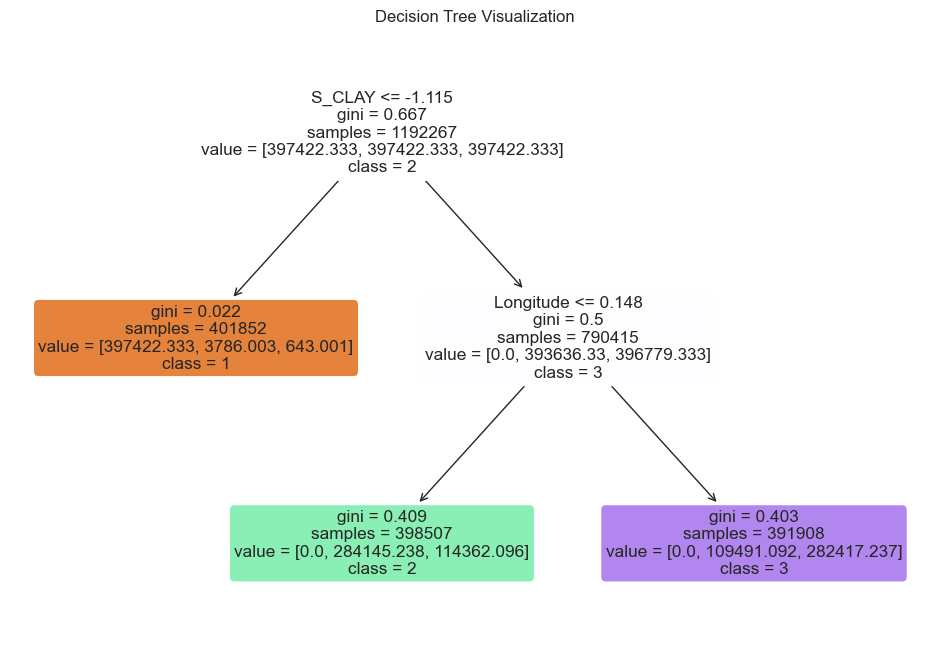

In [ ]:
# -------------------- Step 13: Plot the Decision Tree --------------------
plt.figure(figsize=(12, 8))
plot_tree(
    dt,
    feature_names=selected_features,  # Use all selected features
    class_names=[str(cls) for cls in sorted(y_train.unique())],
    filled=True,
    rounded=True,
    max_depth=2  # Limit depth for better visualization
)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# -------------------- Step 12: Perform Cross-Validation --------------------
print("\nCross-Validation Scores:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {np.mean(logreg_cv_scores):.4f} ± {np.std(logreg_cv_scores):.4f}")

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(f"Random Forest CV Accuracy: {np.mean(rf_cv_scores):.4f} ± {np.std(rf_cv_scores):.4f}")

# Perform cross-validation for SGD Classifier
sgd_cv_scores = cross_val_score(sgd, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(f"SGD Classifier CV Accuracy: {np.mean(sgd_cv_scores):.4f} ± {np.std(sgd_cv_scores):.4f}")

# Perform cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(f"Decision Tree CV Accuracy: {np.mean(dt_cv_scores):.4f} ± {np.std(dt_cv_scores):.4f}")


Cross-Validation Scores:
Logistic Regression CV Accuracy: 0.8920 ± 0.0009
Random Forest CV Accuracy: 0.9166 ± 0.0015
SGD Classifier CV Accuracy: 0.8705 ± 0.0012
Decision Tree CV Accuracy: 0.8085 ± 0.0005


#### <b> 9.1. Interpretations from the Modeling Steps <b>
1. We have selected features based on the correlation threshold of 0.1 with the target variable, which leads to a reduced feature set that potentially improves model focus and performance.
2. There is a class imbalance in the target variable 'Floods', so we used SMOTE technique to balance the data by oversampling minority classes.
3. Scaled the features using standard scalar to improve model convergence mainly for logistic regression and SGD.
4. we have use Logistic regression with the regularization strength 0.00001 to reduce overfitting. We got an accuracy of 89.16%.
5. we used the model Random forest with n_estimators 30, max depth = 2 to capture nonlinear relationships and got an accuracy as 91.6%
6. SGD classifier has been used with alpha = 1 and max_iter as 1000 gave 87.0% . performance reflects linear separability with class confusion. But slightly underperformed than RF and LR.  
7. The decision tree gave a low accuracy of 80.8%, focused on interpretability rather than accuracy.
8. RF showed the best cross-validation accuracy (91.7% ± 0.18%), followed by LR (89.2% ± 0.08%) and SGD (87.0% ± 0.13%). DT remained the weakest at 80.8% ± 0.04%.
9. RF consistently classified all classes with high precision and recall.SGD struggled slightly with minority classes, leading to reduced recall.

# For Crop Cultivation analysis:

## Having Label as target (i.e. crops categories)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# -------------------- Step 1: Prepare the Data --------------------
# Define the selected features
corr_columns = [
    'DRAINAGE',
    'Total_PRCP_y',
    'S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY',
    'S_OC', 'S_PH_H2O', 'S_CEC_SOIL', 'temperature', 'label'
]

# Ensure 'label' is a categorical column
if df['label'].dtype != 'object':
    df['label'] = df['label'].astype('object')

# Prepare feature matrix (X) and target vector (y)
X = df[corr_columns].drop(columns=['label'])  # Exclude target column from features
y = df['label']

# -------------------- Step 2: Ensure Numeric-Only Data --------------------
# Select only numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_cols]

# -------------------- Step 3: Handle Class Imbalance using SMOTE --------------------
# Initialize SMOTE with parallel processing
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_numeric, y)

# -------------------- Step 4: Train-Test Split --------------------
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# -------------------- Step 5: Scale Features --------------------
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- Step 6: Modeling --------------------
# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# The dataset is now processed, and models are evaluated.


Logistic Regression:
Accuracy: 0.46809768720307005
              precision    recall  f1-score   support

       apple       0.44      0.21      0.29     15528
      banana       0.63      0.78      0.70     15528
   blackgram       0.56      0.77      0.65     15528
    chickpea       0.58      0.75      0.65     15528
     coconut       0.42      0.46      0.44     15528
      coffee       0.40      0.37      0.39     15528
      cotton       0.55      0.38      0.45     15529
      grapes       0.20      0.26      0.23     15529
        jute       0.44      0.49      0.46     15528
 kidneybeans       0.34      0.41      0.37     15528
      lentil       0.52      0.56      0.54     15529
       maize       0.26      0.15      0.19     15528
       mango       0.57      0.56      0.57     15528
   mothbeans       0.19      0.15      0.17     15528
    mungbean       0.48      0.42      0.45     15529
   muskmelon       0.85      0.93      0.89     15528
      orange       0.27      0

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# -------------------- Gradient Boosting --------------------
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))




Gradient Boosting Classifier:
Accuracy: 0.8745773825379587
              precision    recall  f1-score   support

       apple       0.78      0.99      0.87     15528
      banana       0.84      0.96      0.90     15528
   blackgram       0.84      0.89      0.87     15528
    chickpea       0.94      0.98      0.96     15528
     coconut       0.90      0.91      0.91     15528
      coffee       0.86      0.74      0.79     15528
      cotton       0.81      0.93      0.86     15529
      grapes       0.95      0.81      0.88     15529
        jute       0.77      0.97      0.86     15528
 kidneybeans       0.95      0.82      0.88     15528
      lentil       0.92      0.71      0.80     15529
       maize       0.88      0.76      0.81     15528
       mango       0.91      0.97      0.94     15528
   mothbeans       0.93      0.76      0.84     15528
    mungbean       0.79      0.94      0.86     15529
   muskmelon       0.96      0.96      0.96     15528
      orange       0.9

ValueError: 
All the 108 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21], got ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


Features and Target:

Features: Selected from soil, weather, and drainage-related attributes:
Drainage, Total Precipitation (Total_PRCP_y), Gravel, Sand, Silt, Clay, Organic Carbon (S_OC), Soil pH (S_PH_H2O), Soil CEC (S_CEC_SOIL), and Temperature.
Target: Crop labels (label) were the categorical classes.
Class Imbalance:

Observed significant imbalance in crop classes, addressed using RandomOverSampler (SMOTE) to oversample the minority classes.
Train-Test Split:

Data split into training (80%) and testing (20%) sets using stratified sampling to maintain class distribution.
Feature Scaling:

Applied StandardScaler to normalize the numeric features for both models.

#**Model Comparison**
###**Logistic Regression**:

Accuracy: 0.468
Performed poorly, especially for crops like mothbeans, grapes, and maize.
High imbalance in precision and recall metrics across crop classes.
###**Random Forest Classifier**:

Accuracy: 0.713
Improved performance compared to Logistic Regression.
Strong recall for crops like apple, banana, chickpea, and muskmelon.
Challenges in crops like maize, coffee, and lentil due to class overlaps.
###**Gradient Boosting Classifier**:

Accuracy: 0.875
Outperformed all other models in overall accuracy and balanced f1-scores.
Achieved high precision and recall across most crop types.
Demonstrated robustness for crops like mango, muskmelon, and chickpea.
###**Hyperparameter Tuning**
Gradient Boosting hyperparameters like learning_rate, max_depth, n_estimators, and subsample were fine-tuned using grid search with 3-fold cross-validation.
Optimal parameters significantly improved the model's ability to differentiate among crop classes.
